# Time Series Analysis and Modeling Python Codebase

## (Continuation of Statistical Analysis and Exploratory Data Analysis (EDA) Work from R)

## Part 1: Data Collection and Preprocessing

In [ ]:
# Import Required Packages

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from statsmodels.api import OLS, add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot, plot_partregress_grid

In [ ]:
# Read data
data = pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Air-Quality-Data-Analysis-Project/refs/heads/main/Data/processedInput.csv") # 9326 rows × 16 columns

In [ ]:
# adiditonal data preprocessing: dropping unnamed column
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# Verify data preprocessing result
print(data.head())

   Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0     0  18:00:00     2.6       1360.0     150.0      11.9         1046.0   
1     0  19:00:00     2.0       1292.0     112.0       9.4          955.0   
2     0  20:00:00     2.2       1402.0      88.0       9.0          939.0   
3     0  21:00:00     2.2       1376.0      80.0       9.2          948.0   
4     0  22:00:00     1.6       1272.0      51.0       6.5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   

       AH  
0  0.7578  
1  0.7255  
2  0.7502  
3  0.7867  
4  0.7888  


In [ ]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9325 entries, 0 to 9324
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9325 non-null   int64  
 1   Time           9325 non-null   object 
 2   CO(GT)         9325 non-null   float64
 3   PT08.S1(CO)    9325 non-null   float64
 4   NMHC(GT)       9325 non-null   float64
 5   C6H6(GT)       9325 non-null   float64
 6   PT08.S2(NMHC)  9325 non-null   float64
 7   NOx(GT)        9325 non-null   float64
 8   PT08.S3(NOx)   9325 non-null   float64
 9   NO2(GT)        9325 non-null   float64
 10  PT08.S4(NO2)   9325 non-null   float64
 11  PT08.S5(O3)    9325 non-null   float64
 12  T              9325 non-null   float64
 13  RH             9325 non-null   float64
 14  AH             9325 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 1.1+ MB
None


In [ ]:
# Check time series index
data['Date'].describe()

count    9325.000000
mean      195.383056
std       112.649753
min         0.000000
25%        98.000000
50%       196.000000
75%       293.000000
max       390.000000
Name: Date, dtype: float64

In [ ]:
# Need to extract original data to revert some preprocessing changes
old_data = pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/Air-Quality-Data-Analysis-Project/refs/heads/main/Data/Input.csv") # 9326 rows × 16 columns


In [ ]:
txt=old_data['Date'][0]
txt2=txt.replace("/", "-")

In [ ]:
txt2

'2004-3-10'

In [ ]:
# Start date from my unprocessed data
start_date = pd.to_datetime(txt2)
start_date

Timestamp('2004-03-10 00:00:00')

In [ ]:
# Change number of days back to date
# By adding the number of days to the start date
data['Datetime'] = start_date + pd.to_timedelta(data['Date'], unit='D')

In [ ]:
# reverted!
data['Datetime']

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9320   2005-04-04
9321   2005-04-04
9322   2005-04-04
9323   2005-04-04
9324   2005-04-04
Name: Datetime, Length: 9325, dtype: datetime64[ns]

In [ ]:
# Convert 'hours' to datetime format (to get the time component)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time
# Convert 'hours' to a timedelta (hours, minutes, and seconds)
data['Time'] = pd.to_timedelta(data['Time'].astype(str))

In [ ]:
data['Time']

0      0 days 18:00:00
1      0 days 19:00:00
2      0 days 20:00:00
3      0 days 21:00:00
4      0 days 22:00:00
             ...      
9320   0 days 10:00:00
9321   0 days 11:00:00
9322   0 days 12:00:00
9323   0 days 13:00:00
9324   0 days 14:00:00
Name: Time, Length: 9325, dtype: timedelta64[ns]

In [ ]:
# Add 'time' to the 'Datetime' column to complete revert process
data['Temporal'] = data['Datetime'] + data['Time']

In [ ]:
data['Temporal']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9320   2005-04-04 10:00:00
9321   2005-04-04 11:00:00
9322   2005-04-04 12:00:00
9323   2005-04-04 13:00:00
9324   2005-04-04 14:00:00
Name: Temporal, Length: 9325, dtype: datetime64[ns]

In [ ]:
# reindex data based on reprocessed time feature (temporal)
testing_data=data.set_index('Temporal')

In [ ]:
testing_data.head()

Date            Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  \
Temporal                                                                   
2004-03-10 18:00:00     0 0 days 18:00:00     2.6       1360.0     150.0   
2004-03-10 19:00:00     0 0 days 19:00:00     2.0       1292.0     112.0   
2004-03-10 20:00:00     0 0 days 20:00:00     2.2       1402.0      88.0   
2004-03-10 21:00:00     0 0 days 21:00:00     2.2       1376.0      80.0   
2004-03-10 22:00:00     0 0 days 22:00:00     1.6       1272.0      51.0   

                     C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
Temporal                                                                       
2004-03-10 18:00:00      11.9         1046.0    166.0        1056.0    113.0   
2004-03-10 19:00:00       9.4          955.0    103.0        1174.0     92.0   
2004-03-10 20:00:00       9.0          939.0    131.0        1140.0    114.0   
2004-03-10 21:00:00       9.2          948.0    172.0        1092.0    122.0   
2004-03-10 22:00:00       6.5          836.0    131.0        1205.0    116.0   

                     PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH   Datetime  
Temporal                                                                       
2004-03-10 18:00:00        1692.0       1268.0  13.6  48.9  0.7578 2004-03-10  
2004-03-10 19:00:00        1559.0        972.0  13.3  47.7  0.7255 2004-03-10  
2004-03-10 20:00:00        1555.0       1074.0  11.9  54.0  0.7502 2004-03-10  
2004-03-10 21:00:00        1584.0       1203.0  11.0  60.0  0.7867 2004-03-10  
2004-03-10 22:00:00        1490.0       1110.0  11.2  59.6  0.7888 2004-03-10

In [ ]:
# once added processed temporal feature, drop the other ones (no more uses)
testing_data.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)

In [ ]:
testing_data.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Temporal                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Temporal                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0        1205.0    116.0        1490.0   

                     PT08.S5(O3)     T    RH      AH  
Temporal                                              
2004-03-10 18:00:00       1268.0  13.6  48.9  0.7578  
2004-03-10 19:00:00        972.0  13.3  47.7  0.7255  
2004-03-10 20:00:00       1074.0  11.9  54.0  0.7502  
2004-03-10 21:00:00       1203.0  11.0  60.0  0.7867  
2004-03-10 22:00:00       1110.0  11.2  59.6  0.7888

## Part 2: Time Series Decomposition & Statistical Testing

'\nThis will give you a visual breakdown of:\n\nTrend: The long-term movement of the time series.\nSeasonality: Regular fluctuations within a period (e.g., daily, weekly, monthly).\nResiduals: What remains after removing trend and seasonality, typically random noise\n'

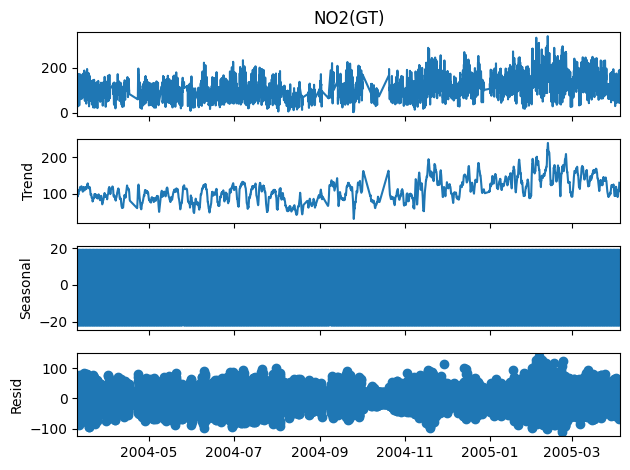

In [ ]:
# Decompose time series into components to understand the underlying patterns (trend, seasonality, residuals) using statsmodels

# Use seasonal_decompose from statsmodels to break down the time series into three components: trend, seasonality, and residual.

from statsmodels.tsa.seasonal import seasonal_decompose

# target is NO2(GT)
target_column = 'NO2(GT)'

# Decompose the time series, period is 24 (hourly data)
decomposition = seasonal_decompose(testing_data[target_column], model='additive', period=24)

# Plot the decomposed components to see trend, seasonality, and residuals
decomposition.plot()


In [ ]:
# Stationarity Check and Differencing
# Check for stationarity and apply differencing if necessary for using time series model (i.e. ARIMA and more)

# Check Stationarity using ADF and KPSS tests:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]} | p-value: {result[1]}')

def kpss_test(series):
    result = kpss(series, regression='c')
    print(f'KPSS Statistic: {result[0]} | p-value: {result[1]}')

# Perform both tests
adf_test(testing_data[target_column])
kpss_test(testing_data[target_column])

# Both test rejects their hypothesis (P-values <0.05), Data is stationary (no differencing is needed)

ADF Statistic: -8.156639977207098 | p-value: 9.381359076105521e-13
KPSS Statistic: 7.6438810509960335 | p-value: 0.01


<ipython-input-32-a683f0101dbb>:24: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


'\nIf the p-value is less than 0.05, the series is stationary.\nIf the p-value is greater than 0.05, the series is non-stationary, and you may need to apply differencing.\n\n\nSince both ADF and KPSS tests return P-value less than 0.01, therefore the data is non-stationary.\n\nAs a result, the series has stable statistical properties over time, so standard time series models that assume stationarity can be applied without needing to transform the data (i.e. differencing).\n\n\n--------------------------------------------\nApply Differencing (if non-stationary):\nIf your time series is not stationary, you can difference the series:\n'

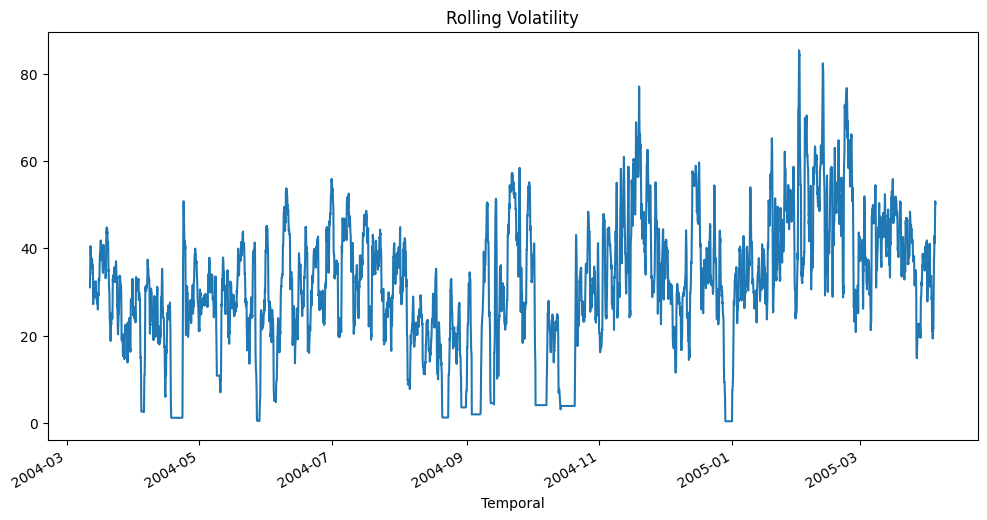

In [ ]:
# Volatility Check: Check if the variance is changing over time, through plotting rolling standard deviations (rolling volatility)

# window is 24 (hourly data)
testing_data['rolling_volatility'] = testing_data[target_column].rolling(window=24).std()

# Plot the rolling volatility
testing_data['rolling_volatility'].plot(figsize=(12, 6))
plt.title('Rolling Volatility')
plt.show()

# Based on rolling voltility plot below, the variance of the target (NO2) reamins constant



In [ ]:
!pip install arch

Iteration:      1,   Func. Count:      6,   Neg. LLF: 48700.39132247551
Iteration:      2,   Func. Count:     12,   Neg. LLF: 49288.985066033725
Iteration:      3,   Func. Count:     18,   Neg. LLF: 46959.85143026933
Iteration:      4,   Func. Count:     24,   Neg. LLF: 47436.286553144775
Iteration:      5,   Func. Count:     30,   Neg. LLF: 46534.06944810689
Iteration:      6,   Func. Count:     35,   Neg. LLF: 46396.380740770735
Iteration:      7,   Func. Count:     40,   Neg. LLF: 46326.06626407546
Iteration:      8,   Func. Count:     45,   Neg. LLF: 46494.581904491904
Iteration:      9,   Func. Count:     51,   Neg. LLF: 86266.92679748381
Iteration:     10,   Func. Count:     59,   Neg. LLF: 46280.145297985546
Iteration:     11,   Func. Count:     64,   Neg. LLF: 46279.311535633904
Iteration:     12,   Func. Count:     69,   Neg. LLF: 46279.19051181816
Iteration:     13,   Func. Count:     74,   Neg. LLF: 46279.18413637605
Iteration:     14,   Func. Count:     79,   Neg. LLF: 4627

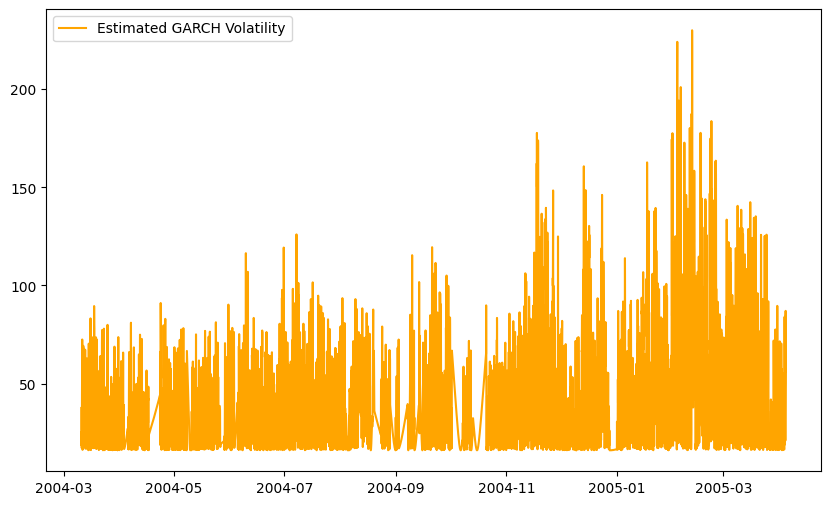

'\nBased on rolling volatiility plot and GARCH model, the volatility check is not seriously violated as it is low most of the time until the end of the timeframe.\n'

In [ ]:
# Volatility check continued

from arch import arch_model

# Fit a GARCH model (ARCH works too)
model = arch_model(testing_data[target_column], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Check the estimated volatility/ conditional standard deviation
garch_volatility = garch_fit.conditional_volatility

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(garch_volatility, label='Estimated GARCH Volatility', color='orange')
plt.legend()
plt.show()

# Based on rolling volatiility plot and GARCH model, the volatility check is not seriously violated as it is low most of the time until the end of the timeframe.

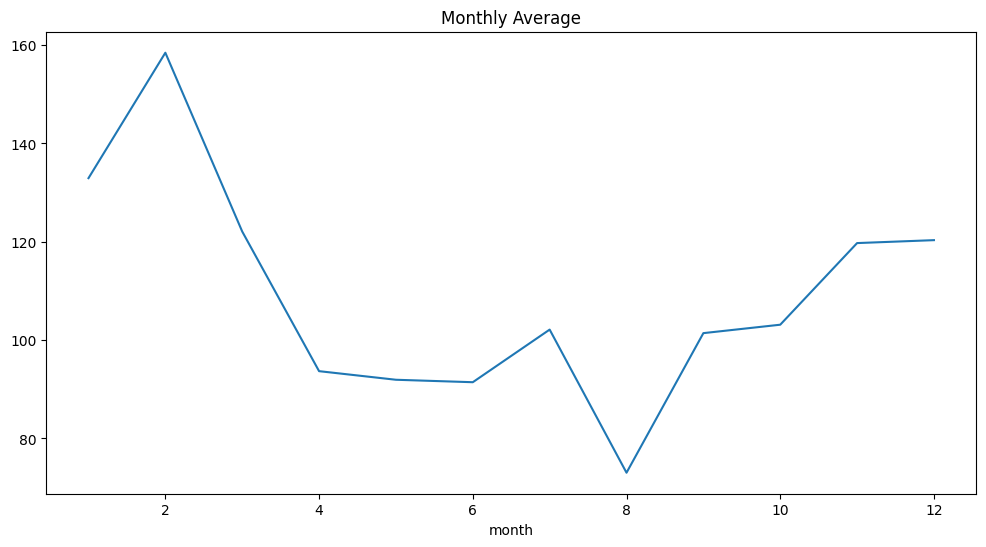

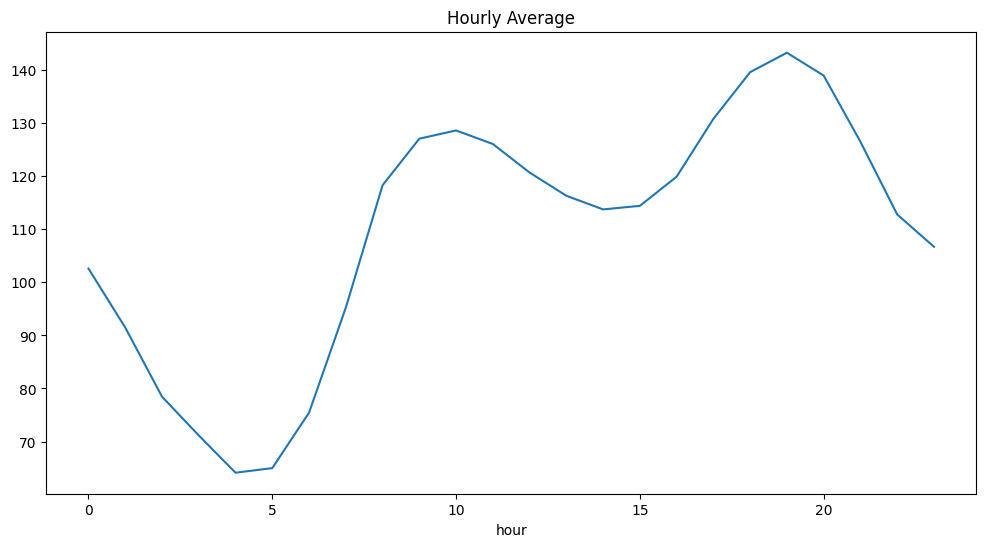

'\nAfter the stationarity test, you can apply seasonal decomposition or volatility analysis to further understand the nature of your data and its components (trend, seasonality, and residuals).\n\nResult:\nThere could some seasonality month-wise, as the NO2 concentration peaked in Q1 and lowered in other quarters\n\nDay-wise, the NO2 Concentration is low in the morning, then increases in the afternoon and peaks in early everning, then ultimately drop back to low as the evening progresses.\n'

In [ ]:
# Seasonality Check: By decomposing the series using seasonal_decompose to detect any repeating patterns from seasonal component, or by plotting the monthly or hourly averages of the data.

# Plot monthly average to detect seasonal patterns
testing_data['month'] = testing_data.index.month
monthly_avg = testing_data.groupby('month')[target_column].mean()
monthly_avg.plot(figsize=(12, 6))
plt.title('Monthly Average')
plt.show()

# Plot Hourly average to detect hourly seasonality
testing_data['hour'] = testing_data.index.hour
hourly_avg = testing_data.groupby('hour')[target_column].mean()
hourly_avg.plot(figsize=(12, 6))
plt.title('Hourly Average')
plt.show()

# There is some seasonality month-wise, as the NO2 concentration peaked in Q1 and lowered in other quarters

# Day-wise, the NO2 Concentration is low in the morning, then increases in the afternoon and peaks in early everning, then ultimately drop back to low as the evening progresses.

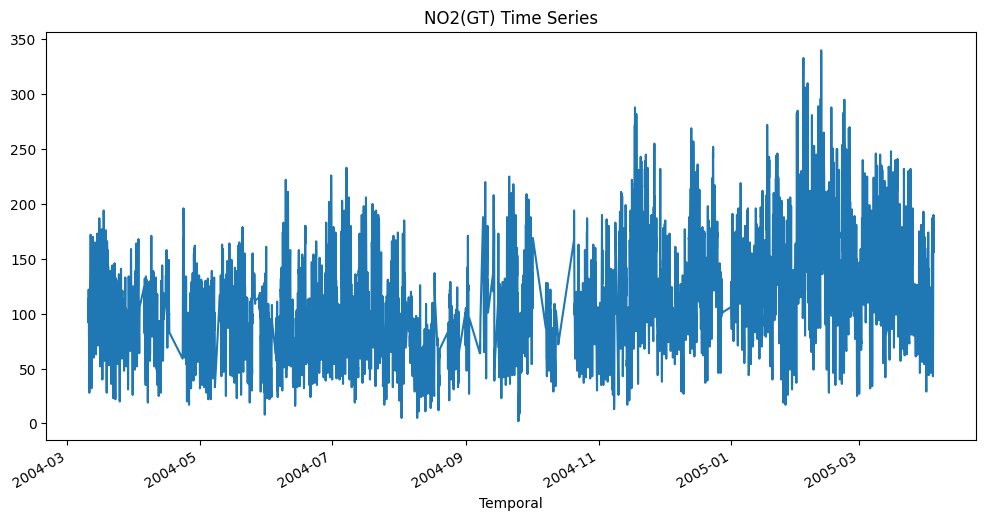

In [ ]:
# Overall Visualizing the time series data to understand the temporal patterns

testing_data[target_column].plot(figsize=(12,6))
plt.title(f'{target_column} Time Series')
plt.show()

## Part 3: Feature Engineering with Lag Features

In [ ]:
# Create lag features to use previous time steps as inputs to predict future values for time series forecasting models.

# 3 lags featyres
lags = [1, 2, 3]

for lag in lags:
    testing_data[f'lag_{lag}'] = testing_data[target_column].shift(lag)

# Drop missing values caused by shifting
testing_data.dropna(inplace=True)

# verify results
print(testing_data.head())


                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Temporal                                                                      
2004-03-11 17:00:00     2.9       1383.0     150.0      11.2         1020.0   
2004-03-11 18:00:00     4.8       1581.0     307.0      20.8         1319.0   
2004-03-11 19:00:00     6.9       1776.0     461.0      27.4         1488.0   
2004-03-11 20:00:00     6.1       1640.0     401.0      24.0         1404.0   
2004-03-11 21:00:00     3.9       1313.0     197.0      12.8         1076.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Temporal                                                            
2004-03-11 17:00:00    243.0        1008.0    135.0        1719.0   
2004-03-11 18:00:00    281.0         799.0    151.0        2083.0   
2004-03-11 19:00:00    383.0         702.0    172.0        2333.0   
2004-03-11 20:00:00    351.0         743.0    165.0        2191.0   
2004-03-11 21:00:00    240.0    

In [ ]:
## Create Rolling Statistics (rolling mean and rolling standard deviation features)
testing_data['rolling_mean'] = testing_data[target_column].rolling(window=3).mean()
testing_data['rolling_std'] = testing_data[target_column].rolling(window=3).std()

# Drop missing values from rolling features
testing_data.dropna(inplace=True)

# Part 4: Parameter Estimation for Time Series Models

<Figure size 1000x600 with 0 Axes>

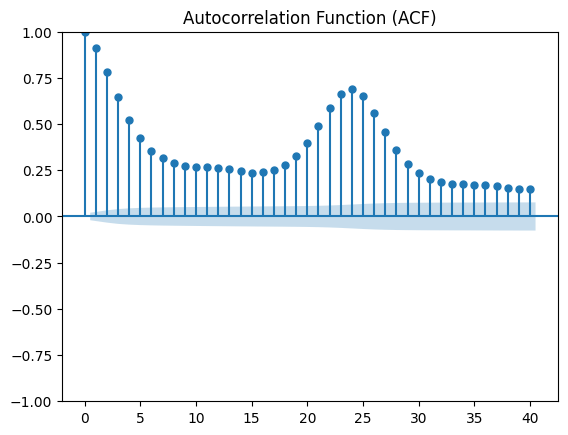

<Figure size 1000x600 with 0 Axes>

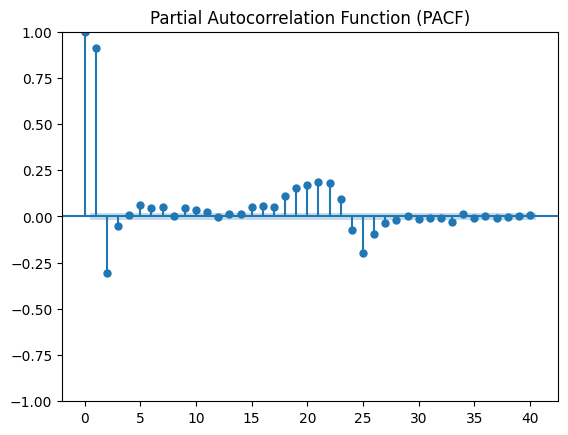

In [ ]:
# ACF & PACF Plots on regular data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF for q (MA)
plt.figure(figsize=(10, 6))
plot_acf(testing_data[target_column], lags=40)  # You can change the number of lags to show
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF for P (AR)
plt.figure(figsize=(10, 6))
plot_pacf(testing_data[target_column], lags=40)  # You can change the number of lags to show
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



<Figure size 1000x600 with 0 Axes>

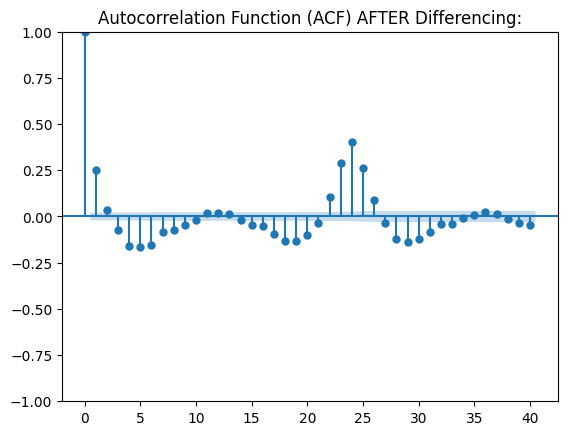

<Figure size 1000x600 with 0 Axes>

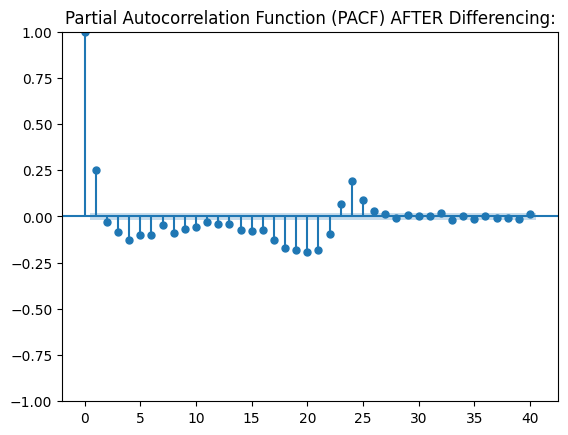

In [ ]:
# ACF & PACF Plots on first order-differenced data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF for q (MA)
plt.figure(figsize=(10, 6))
plot_acf(testing_data[target_column].diff().dropna(), lags=40)  # You can change the number of lags to show
plt.title('Autocorrelation Function (ACF) AFTER Differencing:')
plt.show()

# Plot PACF for P (AR)
plt.figure(figsize=(10, 6))
plot_pacf(testing_data[target_column].diff().dropna(), lags=40)  # You can change the number of lags to show
plt.title('Partial Autocorrelation Function (PACF) AFTER Differencing:')
plt.show()


In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

# Parameter estimation with auto_arima to collect optimal parameters (p, d, q)
model = pm.auto_arima(testing_data[target_column],
                      start_p=0, max_p=24,
                      start_q=0, max_q=24,
                      d=None,
                      seasonal=False,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

# Print the summary of the best model
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=81540.307, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80930.455, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=80952.015, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=81538.307, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=80925.268, Time=1.00 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=80862.712, Time=3.02 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=80712.790, Time=3.24 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=80617.447, Time=3.07 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=80524.246, Time=3.79 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=80507.326, Time=5.18 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=80438.288, Time=5.72 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=80394.853, Time=6.26 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=80366.664, Time=7.79 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=80361.513, Time=11.15 sec
 ARIMA(12,1,0)(0

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Parameter estimation continue becuase too computationally expesnive
results = []

# ONLY try to find q value, assume p=24, and d=1
for q in range(25):  # Testing Q from 0 to 24
    try:
        model = ARIMA(testing_data[target_column], order=(24, 1, q))
        model_fit = model.fit()

        # Store and print the results: (Q value, AIC)
        results.append((q, model_fit.aic))
        print(f"Fitted ARIMA(24,1,{q}) with AIC: {model_fit.aic}")

    except Exception as e:
        print(f"ARIMA(24,1,{q}) failed to fit: {e}")

# Find the Q with the lowest AIC
best_q, best_aic = min(results, key=lambda x: x[1])
print(f"\nBest model is ARIMA(24,1,{best_q}) with AIC: {best_aic}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Fitted ARIMA(24,1,0) with AIC: 78302.58287661299


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Fitted ARIMA(24,1,1) with AIC: 78220.69725258889


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Fitted ARIMA(24,1,2) with AIC: 78221.91756382183


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,3) with AIC: 78224.03071031389


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,4) with AIC: 78226.69574734809


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,5) with AIC: 78227.83453207859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,6) with AIC: 78229.07131191297


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,7) with AIC: 78230.66762984202


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,8) with AIC: 78235.4046164487


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,9) with AIC: 78225.84962215791


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,10) with AIC: 78228.44403062973


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,11) with AIC: 78227.53924917175


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,12) with AIC: 78222.62701263583


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,13) with AIC: 78219.72051954494


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,14) with AIC: 78225.72472263883


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,15) with AIC: 78213.3315419218


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,16) with AIC: 78169.63219791184


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,17) with AIC: 78120.09684925732


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,18) with AIC: 78043.21549049851


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,19) with AIC: 78049.79135723249


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,20) with AIC: 78067.9454749065


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,21) with AIC: 77959.47705504633


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,22) with AIC: 77876.121424184


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Fitted ARIMA(24,1,23) with AIC: 77852.689093319


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Fitted ARIMA(24,1,24) with AIC: 77688.96818768713

Best model is ARIMA(24,1,24) with AIC: 77688.96818768713


Best model is ARIMA(24,1,24) with AIC: 77688.96818768713

## Part 5: Time Series Modeling

In [ ]:
# Train-Test (80-20) Split in temporal order

train_size = int(len(data) * 0.8)  # 80% for training

train_data = data[:train_size]
test_data = data[train_size:]

# Check the shapes
print(train_data.shape, test_data.shape)



### 5.1 Autoregressive Integrated Moving Average (ARIMA) Model

predicted=97.991296, expected=89.500000
predicted=87.268165, expected=79.000000
predicted=76.776054, expected=79.000000
predicted=79.084368, expected=90.000000
predicted=92.415276, expected=95.000000
predicted=96.007345, expected=169.000000
predicted=185.241498, expected=199.000000
predicted=205.008562, expected=186.000000
predicted=182.902235, expected=208.000000
predicted=212.959954, expected=178.000000
predicted=171.225513, expected=176.000000
predicted=175.810705, expected=177.000000
predicted=177.226605, expected=182.000000
predicted=183.089743, expected=182.000000
predicted=181.959713, expected=193.000000
predicted=195.417270, expected=272.000000
predicted=289.291147, expected=225.000000
predicted=214.138566, expected=181.000000
predicted=171.833445, expected=172.000000
predicted=170.410490, expected=153.000000
predicted=148.910154, expected=143.000000
predicted=140.977572, expected=142.000000
predicted=141.862669, expected=131.000000
predicted=128.600002, expected=105.000000
pre

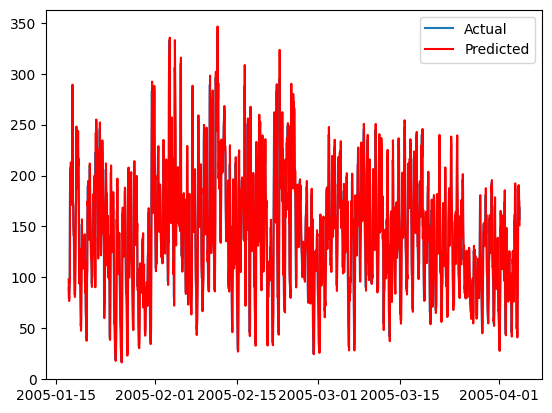

In [ ]:
# Implement ARIMA with rolling window approach

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming `testing_data` is a DataFrame and `target_column` is the name of the target series
X = testing_data[target_column]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

# Rolling window approach
for t in range(len(test)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Create a time series for the predictions
prediction_index = test.index  # Use the same index as the test set for alignment
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.plot(test, label='Actual')
plt.plot(predictions_series, color='red', label='Predicted')
plt.legend()
plt.show()


In [ ]:
# Calculating R-squared values
ss_total = sum((test - test.mean()) ** 2)  # Total sum of squares
ss_residual = sum((test - predictions) ** 2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # R² calculation
print(f'R²: {r2:.3f}')

R²: 0.784


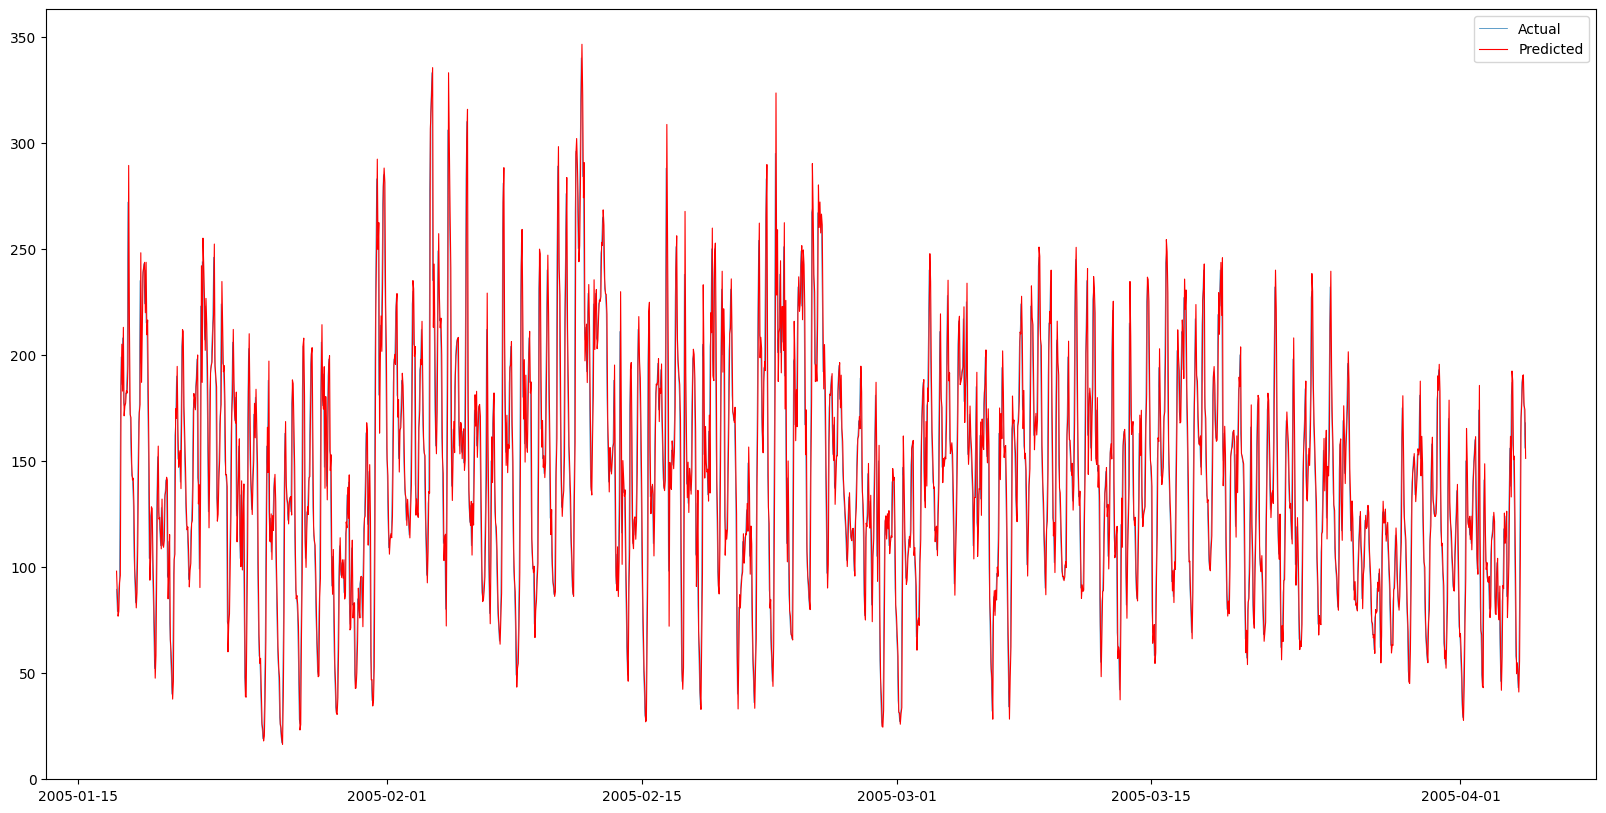

In [ ]:
# Plot forecasts against actual outcomes (ARIMA)
plt.figure(figsize=(20,10))

plt.plot(test, label='Actual', linewidth=0.5)  # Thinner line for actual data
plt.plot(predictions_series, color='red', label='Predicted', linewidth=0.8)  # Thinner line for predictions
plt.legend()
plt.show()

In [ ]:
# # ARIMA (Backup Code)

# # Imports
# from matplotlib import pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# import pandas as pd

# # Assuming `testing_data` is a DataFrame and `target_column` is the name of the target series
# X = testing_data[target_column]
# size = int(len(X) * 0.8)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = []

# # Walk-forward validation
# for t in range(len(test)):
#     model = ARIMA(history, order=(1, 1, 1))
#     model_fit = model.fit()
#     print(output)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test.iloc[t]  # Use .iloc for proper indexing
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))

# # Evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)

# # Create a time series for the predictions
# prediction_index = test.index  # Use the same index as the test set for alignment
# predictions_series = pd.Series(predictions, index=prediction_index)

# # Plot forecasts against actual outcomes
# plt.plot(test, label='Actual')
# plt.plot(predictions_series, color='red', label='Predicted')
# plt.legend()
# plt.show()


### 5.2 Autoregressive Integrated Moving Average with eXogenous Inputs Model (ARIMAX)

Predicted=167.436, Expected=167.000
Predicted=151.350, Expected=157.000
Predicted=145.579, Expected=130.000
Predicted=135.612, Expected=145.000
Predicted=138.089, Expected=133.000
Predicted=124.008, Expected=110.000
Predicted=105.849, Expected=100.000
Predicted=95.804, Expected=89.500
Predicted=85.234, Expected=79.000
Predicted=77.862, Expected=79.000
Predicted=83.606, Expected=90.000
Predicted=92.638, Expected=95.000
Predicted=164.454, Expected=169.000
Predicted=179.883, Expected=199.000
Predicted=188.196, Expected=186.000
Predicted=217.015, Expected=208.000
Predicted=166.063, Expected=178.000
Predicted=186.416, Expected=176.000
Predicted=172.741, Expected=177.000
Predicted=178.316, Expected=182.000
Predicted=186.019, Expected=182.000
Predicted=205.483, Expected=193.000
Predicted=279.592, Expected=272.000
Predicted=273.114, Expected=225.000
Predicted=111.249, Expected=181.000
Predicted=171.677, Expected=172.000
Predicted=152.529, Expected=153.000
Predicted=146.228, Expected=143.000
Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.261, Expected=106.000
Predicted=109.597, Expected=121.000
Predicted=110.391, Expected=87.000
Predicted=76.943, Expected=62.000
Predicted=61.484, Expected=70.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.664, Expected=66.000
Predicted=75.462, Expected=88.000
Predicted=96.989, Expected=93.000
Predicted=129.069, Expected=116.000
Predicted=140.304, Expected=151.000
Predicted=152.096, Expected=169.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.104, Expected=166.000
Predicted=152.418, Expected=160.000
Predicted=145.212, Expected=145.000
Predicted=142.667, Expected=131.000
Predicted=124.450, Expected=130.000
Predicted=127.145, Expected=122.000
Predicted=117.843, Expected=113.000
Predicted=153.715, Expected=156.000
Predicted=182.589, Expected=198.000
Predicted=187.267, Expected=175.000
Predicted=142.575, Expected=141.000
Predicted=113.238, Expected=101.000
Predicted=93.148, Expected=102.000
Predicted=108.004, Expected=119.000
Predicted=115.321, Expected=110.000
Predicted=102.139, Expected=87.000
Predicted=78.886, Expected=66.000
Predicted=64.377, Expected=65.000
Predicted=63.962, Expected=63.000
Predicted=71.344, Expected=71.000
Predicted=97.334, Expected=103.000
Predicted=168.137, Expected=144.000
Predicted=130.393, Expected=158.000
Predicted=160.996, Expected=169.000
Predicted=166.458, Expected=184.000
Predicted=147.577, Expected=143.000
Predicted=130.895, Expected=133.000
Predicted=142.038, Expected=141.000
Pre

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.682, Expected=200.000
Predicted=230.961, Expected=232.000
Predicted=205.232, Expected=201.000
Predicted=182.835, Expected=175.000
Predicted=149.369, Expected=159.000
Predicted=137.574, Expected=135.000
Predicted=121.200, Expected=128.000
Predicted=116.301, Expected=109.000
Predicted=105.539, Expected=101.000
Predicted=98.936, Expected=96.000
Predicted=92.441, Expected=87.000
Predicted=87.184, Expected=81.000
Predicted=96.656, Expected=100.000
Predicted=161.490, Expected=146.000
Predicted=140.735, Expected=158.000
Predicted=127.129, Expected=136.000
Predicted=118.460, Expected=117.000
Predicted=135.912, Expected=140.000
Predicted=165.223, Expected=169.000
Predicted=162.315, Expected=163.000
Predicted=147.003, Expected=144.000
Predicted=155.104, Expected=153.000
Predicted=159.254, Expected=164.000
Predicted=172.901, Expected=174.000
Predicted=194.727, Expected=196.000
Predicted=188.415, Expected=189.000
Predicted=168.677, Expected=155.000
Predicted=138.278, Expected=137.000

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.939, Expected=79.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.331, Expected=93.000
Predicted=97.325, Expected=102.000
Predicted=97.315, Expected=86.000
Predicted=82.409, Expected=77.000
Predicted=79.843, Expected=88.000
Predicted=82.955, Expected=64.000
Predicted=56.895, Expected=46.000
Predicted=46.978, Expected=55.000
Predicted=65.369, Expected=84.000
Predicted=88.160, Expected=89.000
Predicted=99.031, Expected=118.000
Predicted=116.570, Expected=113.000
Predicted=113.145, Expected=115.000
Predicted=116.372, Expected=124.000
Predicted=115.182, Expected=86.000
Predicted=81.574, Expected=87.000
Predicted=91.736, Expected=100.000
Predicted=110.800, Expected=132.000
Predicted=143.154, Expected=156.000
Predicted=148.920, Expected=138.000
Predicted=166.784, Expected=181.000
Predicted=181.305, Expected=187.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.028, Expected=158.000
Predicted=156.157, Expected=153.000
Predicted=141.653, Expected=128.000
Predicted=116.636, Expected=93.000
Predicted=81.140, Expected=58.000
Predicted=54.247, Expected=55.000
Predicted=54.075, Expected=51.000
Predicted=48.756, Expected=43.000
Predicted=46.420, Expected=53.000
Predicted=72.295, Expected=93.000
Predicted=167.679, Expected=155.000
Predicted=151.410, Expected=174.000
Predicted=166.849, Expected=187.000
Predicted=181.265, Expected=190.000
Predicted=170.678, Expected=179.000
Predicted=169.909, Expected=175.000
Predicted=165.731, Expected=156.000
Predicted=159.577, Expected=168.000
Test RMSE: 15.503
R²: 0.917


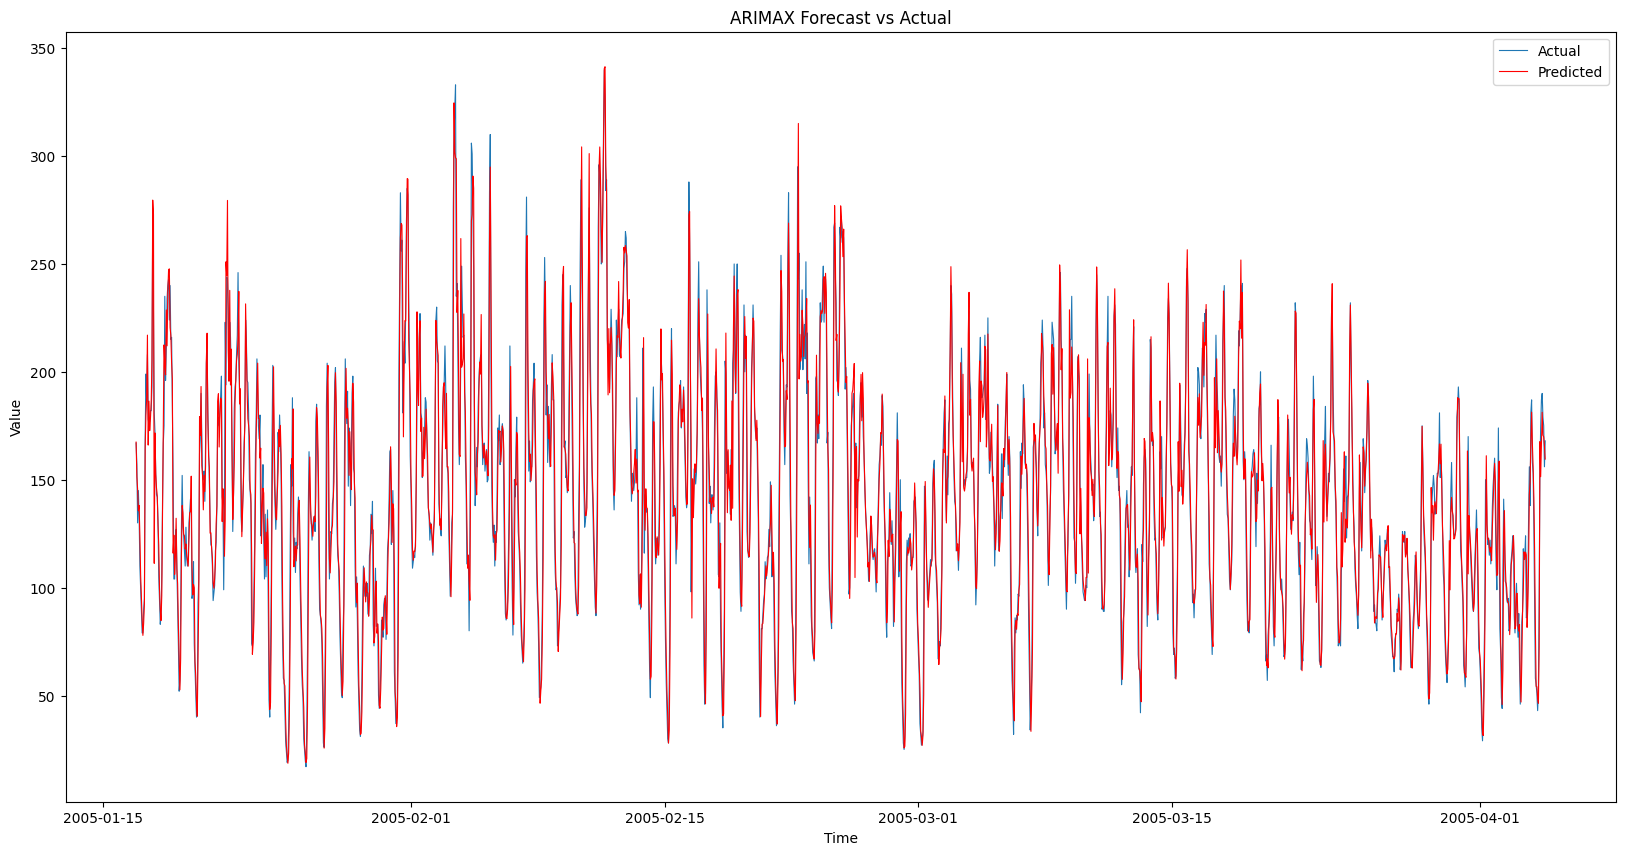

In [ ]:
# ARIMAX (<2 hr!!!)
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd

X = testing_data[target_column]

# Define exogenous features
# exogenous_data = testing_data[['CO(GT)', 'NOx(GT)', 'PT08.S5(O3)', 'RH']]  # All features wanted to add
exogenous_data = testing_data[['NOx(GT)']]  # Realistic Expectations (to limit computational costs)

# Ensure the indices of X and exogenous_data have index of datetime and aligned to hourly frequency
X.index = pd.to_datetime(X.index)
X = X.asfreq('h')
exogenous_data.index = pd.to_datetime(exogenous_data.index)  # Convert to datetime if not already
exogenous_data = exogenous_data.asfreq('h')  # Set frequency to hourly

# Forward fill to handle missing values in exogenous_data
exogenous_data.ffill(inplace=True)

# Parameters for rolling window
train_size = int(len(X) * 0.8)  # 80% for training
test_size = len(X) - train_size  # Remaining for testing
window_size = train_size  # Size of the rolling window

# Prepare for rolling window validation
history = [x for x in X[:train_size]]  # Initialize history with training set
predictions = []

# Rolling window validation
for t in range(test_size):
    # Define the current training and testing data for each step
    train = X[:train_size + t]
    test = X[train_size + t:train_size + t + 1]
    exog_train = exogenous_data[:train_size + t]
    exog_test = exogenous_data[train_size + t:train_size + t + 1]

    # Fit data to ARIMAX model
    model = ARIMA(train, exog=exog_train, order=(1, 1, 1))  # p=1, d=1, q=1 for ARIMA
    model_fit = model.fit()

    # Forecast using the next time step's exogenous values
    output = model_fit.forecast(exog=exog_test)
    yhat = output.iloc[0]
    predictions.append(yhat)

    # Append the actual observation to history for the next iteration
    obs = test.iloc[0]
    history.append(obs)

    # Print the current prediction vs expected value
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Evaluate forecasts
rmse = sqrt(mean_squared_error(X[train_size:], predictions))
print('Test RMSE: %.3f' % rmse)

# Compute R-squared values
ss_total = sum((X[train_size:] - X[train_size:].mean()) ** 2)  # Total sum of squares
ss_residual = sum((X[train_size:] - predictions) ** 2)  # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)  # R² calculation
print(f'R²: {r2:.3f}')

# Create a time series for the predictions
prediction_index = X[train_size:].index  # Use the same index as the test set for alignment
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(X[train_size:], label='Actual', linewidth=0.8)  # Thinner line for actual data
plt.plot(predictions_series, color='red', label='Predicted', linewidth=0.8)  # Thinner line for predictions
plt.legend()
plt.title('ARIMAX Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
# use correlation matrix to determine the variables that can impact the NO2 (target) the most, then include them as exogenuous features
testing_data.iloc[:,:13].corr()

CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.794523  0.267368  0.821762       0.809370   
PT08.S1(CO)    0.794523     1.000000  0.240724  0.887319       0.896049   
NMHC(GT)       0.267368     0.240724  1.000000  0.234125       0.233372   
C6H6(GT)       0.821762     0.887319  0.234125  1.000000       0.982538   
PT08.S2(NMHC)  0.809370     0.896049  0.233372  0.982538       1.000000   
NOx(GT)        0.792270     0.669371  0.138508  0.660877       0.650323   
PT08.S3(NOx)  -0.649921    -0.785101 -0.248267 -0.741487      -0.801056   
NO2(GT)        0.675218     0.617581  0.185516  0.570369       0.600726   
PT08.S4(NO2)   0.556323     0.667601  0.174319  0.760554       0.770398   
PT08.S5(O3)    0.774598     0.903129  0.201654  0.860577       0.875511   
T              0.016840     0.031064  0.074075  0.187764       0.227857   
RH             0.066008     0.118116 -0.051146 -0.053990      -0.081867   
AH             0.061241     0.115287  0.056820  0.158715       0.175688   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
CO(GT)         0.792270     -0.649921  0.675218      0.556323     0.774598   
PT08.S1(CO)    0.669371     -0.785101  0.617581      0.667601     0.903129   
NMHC(GT)       0.138508     -0.248267  0.185516      0.174319     0.201654   
C6H6(GT)       0.660877     -0.741487  0.570369      0.760554     0.860577   
PT08.S2(NMHC)  0.650323     -0.801056  0.600726      0.770398     0.875511   
NOx(GT)        1.000000     -0.627497  0.763098      0.215070     0.736663   
PT08.S3(NOx)  -0.627497      1.000000 -0.623662     -0.530912    -0.801999   
NO2(GT)        0.763098     -0.623662  1.000000      0.133233     0.678396   
PT08.S4(NO2)   0.215070     -0.530912  0.133233      1.000000     0.570199   
PT08.S5(O3)    0.736663     -0.801999  0.678396      0.570199     1.000000   
T             -0.248948     -0.123564 -0.197835      0.562185    -0.051128   
RH             0.215011     -0.066279 -0.074782     -0.025786     0.133391   
AH            -0.123792     -0.211225 -0.322602      0.631749     0.046339   

                      T        RH        AH  
CO(GT)         0.016840  0.066008  0.061241  
PT08.S1(CO)    0.031064  0.118116  0.115287  
NMHC(GT)       0.074075 -0.051146  0.056820  
C6H6(GT)       0.187764 -0.053990  0.158715  
PT08.S2(NMHC)  0.227857 -0.081867  0.175688  
NOx(GT)       -0.248948  0.215011 -0.123792  
PT08.S3(NOx)  -0.123564 -0.066279 -0.211225  
NO2(GT)       -0.197835 -0.074782 -0.322602  
PT08.S4(NO2)   0.562185 -0.025786  0.631749  
PT08.S5(O3)   -0.051128  0.133391  0.046339  
T              1.000000 -0.572571  0.660802  
RH            -0.572571  1.000000  0.170156  
AH             0.660802  0.170156  1.000000

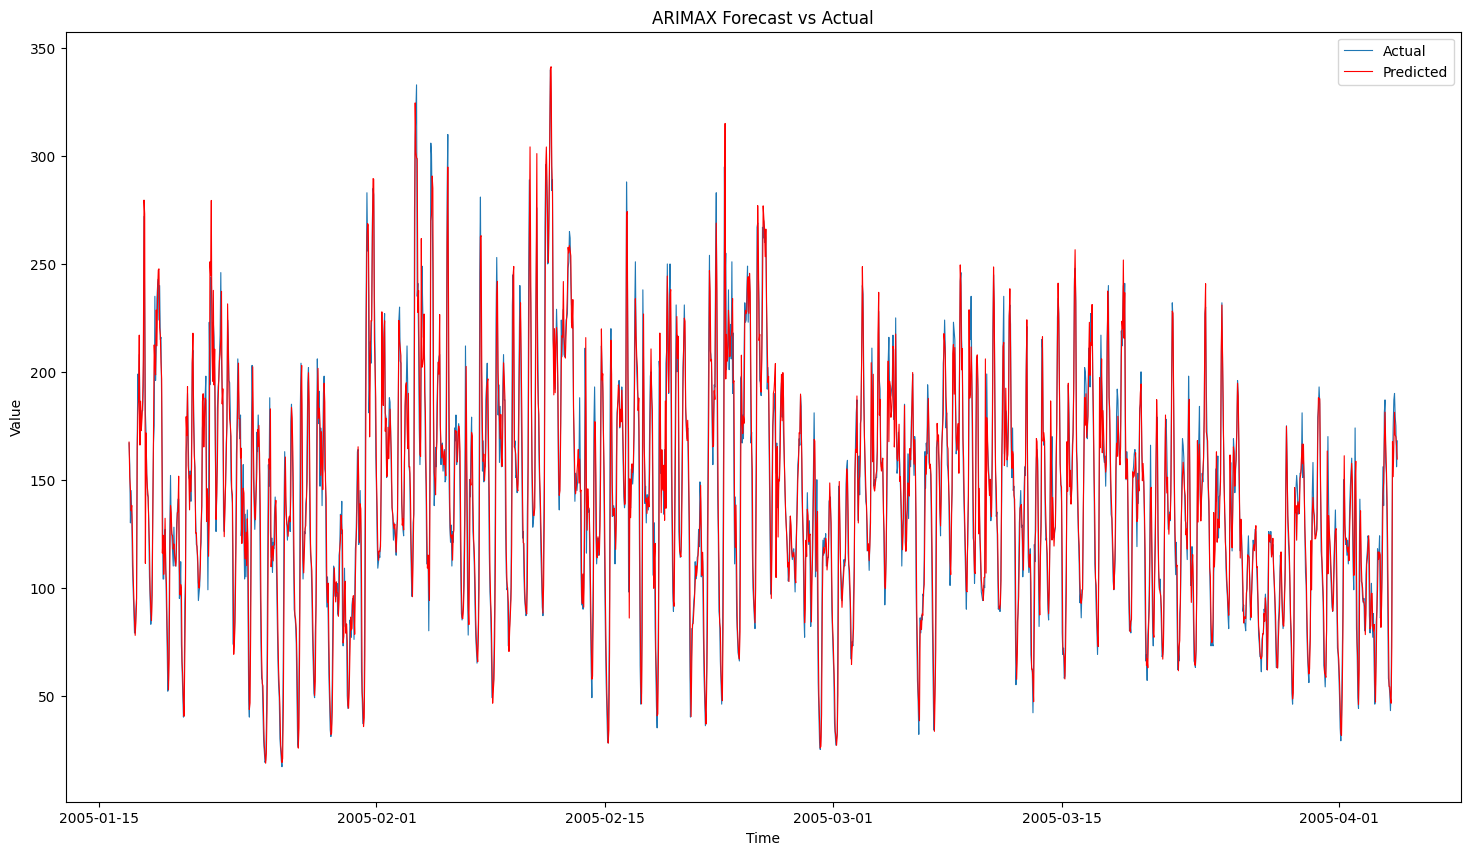

In [ ]:
# Plot forecasts against actual outcomes
plt.figure(figsize=(18,10))
plt.plot(X[train_size:], label='Actual', linewidth=0.8)  # Thinner line for actual data
plt.plot(predictions_series, color='red', label='Predicted', linewidth=0.8)  # Thinner line for predictions
plt.legend()
plt.title('ARIMAX Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### 5.3 Seasonal Autoregressive Integrated Moving Average Model (SARIMA)

In [ ]:
# SARIMA with Rolling Window (3.5 hrs)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = testing_data[target_column]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

# Set rolling window size (last 200 observations)
window_size = 200

# Rolling window validation
for t in range(len(test)):
    # Use only the last `window_size` observations
    history_window = history[-window_size:]

    # Fit the SARIMAX model on the rolling window
    model = SARIMAX(history_window, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
    model_fit = model.fit(convergence_tol=1e-6, approximate=True)

    # Forecast the next step
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    # Append the actual value to the history for the next iteration
    obs = test.iloc[t]
    # Add the actual observed value from the test set
    history.append(obs)

    # Print prediction vs actual value
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')

# Evaluate forecasts

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

Predicted=89.042, Expected=89.500
Predicted=77.789, Expected=79.000
Predicted=81.275, Expected=79.000
Predicted=80.356, Expected=90.000
Predicted=105.397, Expected=95.000
Predicted=130.452, Expected=169.000
Predicted=162.148, Expected=199.000
Predicted=199.949, Expected=186.000
Predicted=199.397, Expected=208.000
Predicted=207.678, Expected=178.000
Predicted=172.645, Expected=176.000
Predicted=171.241, Expected=177.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.096, Expected=182.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.118, Expected=182.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.694, Expected=193.000
Predicted=191.676, Expected=272.000
Predicted=262.761, Expected=225.000
Predicted=211.294, Expected=181.000
Predicted=178.551, Expected=172.000
Predicted=147.506, Expected=153.000
Predicted=147.645, Expected=143.000
Predicted=143.149, Expected=142.000
Predicted=133.366, Expected=131.000
Predicted=117.158, Expected=105.000
Predicted=96.156, Expected=94.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.508, Expected=83.000
Predicted=86.930, Expected=87.000
Predicted=90.786, Expected=106.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.982, Expected=140.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.052, Expected=167.000
Predicted=168.653, Expected=175.000
Predicted=175.422, Expected=235.000
Predicted=233.063, Expected=196.000
Predicted=187.819, Expected=211.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.730, Expected=234.000
Predicted=217.455, Expected=240.000
Predicted=224.519, Expected=243.000
Predicted=233.433, Expected=224.000
Predicted=227.429, Expected=240.000
Predicted=241.861, Expected=215.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.990, Expected=216.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=205.272, Expected=184.000
Predicted=182.861, Expected=152.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.848, Expected=104.000
Predicted=109.823, Expected=104.000
Predicted=112.090, Expected=124.000
Predicted=119.862, Expected=127.000
Predicted=114.525, Expected=109.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.881, Expected=91.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.889, Expected=73.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.006, Expected=52.000
Predicted=61.936, Expected=57.000
Predicted=78.495, Expected=89.000
Predicted=135.512, Expected=128.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.638, Expected=152.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.522, Expected=128.000
Predicted=145.510, Expected=124.000
Predicted=128.533, Expected=117.000
Predicted=122.039, Expected=110.000
Predicted=115.509, Expected=128.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.381, Expected=114.000
Predicted=125.144, Expected=110.000
Predicted=133.682, Expected=112.000
Predicted=140.804, Expected=130.000
Predicted=133.531, Expected=135.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.211, Expected=141.000
Predicted=141.655, Expected=141.000
Predicted=117.939, Expected=95.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.738, Expected=97.000
Predicted=103.258, Expected=112.000
Predicted=107.198, Expected=74.000
Predicted=64.509, Expected=62.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.946, Expected=51.000
Predicted=46.600, Expected=40.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=47.097, Expected=45.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=54.123, Expected=93.000
Predicted=108.952, Expected=104.000
Predicted=146.315, Expected=162.000
Predicted=165.202, Expected=169.000
Predicted=181.165, Expected=190.000
Predicted=187.134, Expected=170.000
Predicted=168.611, Expected=151.000
Predicted=155.093, Expected=150.000
Predicted=153.550, Expected=154.000
Predicted=153.577, Expected=140.000
Predicted=142.215, Expected=167.000
Predicted=183.425, Expected=204.000
Predicted=213.426, Expected=210.000
Predicted=202.494, Expected=182.000
Predicted=162.315, Expected=165.000
Predicted=159.554, Expected=150.000
Predicted=121.202, Expected=132.000
Predicted=126.921, Expected=120.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.259, Expected=119.000
Predicted=115.868, Expected=110.000
Predicted=94.963, Expected=94.000
Predicted=85.516, Expected=97.500
Predicted=87.125, Expected=101.000
Predicted=98.353, Expected=117.000
Predicted=111.592, Expected=121.000
Predicted=133.985, Expected=138.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.565, Expected=174.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.742, Expected=179.000
Predicted=180.798, Expected=175.000
Predicted=175.550, Expected=183.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.016, Expected=189.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.315, Expected=198.000
Predicted=197.170, Expected=142.000
Predicted=138.773, Expected=139.000
Predicted=140.272, Expected=99.000
Predicted=122.497, Expected=135.000
Predicted=153.713, Expected=223.000
Predicted=215.240, Expected=194.000
Predicted=176.814, Expected=244.000
Predicted=227.563, Expected=243.000
Predicted=195.818, Expected=230.000
Predicted=227.622, Expected=207.000
Predicted=219.028, Expected=223.000
Predicted=210.046, Expected=216.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.485, Expected=198.000
Predicted=186.088, Expected=162.000
Predicted=152.271, Expected=126.000
Predicted=126.574, Expected=144.000
Predicted=150.710, Expected=183.000
Predicted=192.887, Expected=193.000
Predicted=235.234, Expected=196.000
Predicted=199.148, Expected=208.000
Predicted=211.349, Expected=217.000
Predicted=205.099, Expected=246.000
Predicted=234.808, Expected=204.000
Predicted=204.576, Expected=192.000
Predicted=195.734, Expected=186.000
Predicted=176.042, Expected=133.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.338, Expected=126.000
Predicted=150.825, Expected=138.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.439, Expected=148.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.452, Expected=167.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.911, Expected=175.000
Predicted=163.620, Expected=224.000
Predicted=189.728, Expected=215.000
Predicted=210.168, Expected=196.000
Predicted=204.168, Expected=195.000
Predicted=179.729, Expected=181.000
Predicted=163.759, Expected=150.000
Predicted=141.215, Expected=144.500
Predicted=135.045, Expected=139.000
Predicted=140.111, Expected=74.000
Predicted=88.945, Expected=73.000
Predicted=91.799, Expected=77.000
Predicted=120.242, Expected=98.000
Predicted=107.653, Expected=121.000
Predicted=125.687, Expected=162.000
Predicted=157.204, Expected=178.000
Predicted=171.819, Expected=206.000
Predicted=211.928, Expected=191.000
Predicted=178.970, Expected=175.000
Predicted=165.540, Expected=169.000
Predicted=162.789, Expected=180.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.222, Expected=124.000
Predicted=155.737, Expected=130.000
Predicted=120.024, Expected=141.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.247, Expected=157.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.204, Expected=123.000
Predicted=96.071, Expected=104.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.618, Expected=134.000
Predicted=142.923, Expected=105.000
Predicted=98.672, Expected=121.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.465, Expected=136.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.494, Expected=92.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.794, Expected=48.000
Predicted=57.779, Expected=40.000
Predicted=63.350, Expected=67.000
Predicted=90.008, Expected=104.000
Predicted=146.501, Expected=169.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.579, Expected=203.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=205.752, Expected=183.000
Predicted=181.035, Expected=151.000
Predicted=142.899, Expected=138.000
Predicted=144.709, Expected=127.000
Predicted=126.535, Expected=137.500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.773, Expected=148.000
Predicted=147.045, Expected=172.000
Predicted=188.206, Expected=163.000
Predicted=191.476, Expected=180.000
Predicted=175.489, Expected=169.000
Predicted=169.328, Expected=152.000
Predicted=153.585, Expected=107.000
Predicted=89.149, Expected=75.000
Predicted=77.457, Expected=58.000
Predicted=71.069, Expected=57.000
Predicted=52.728, Expected=44.000
Predicted=34.316, Expected=29.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=21.990, Expected=24.000
Predicted=15.369, Expected=19.000
Predicted=17.224, Expected=20.000
Predicted=41.912, Expected=35.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=55.972, Expected=60.000
Predicted=100.745, Expected=115.000
Predicted=132.446, Expected=157.000
Predicted=166.051, Expected=147.000
Predicted=146.069, Expected=188.000
Predicted=178.506, Expected=126.000
Predicted=126.213, Expected=114.000
Predicted=111.386, Expected=123.000
Predicted=114.163, Expected=107.000
Predicted=106.317, Expected=121.000
Predicted=126.873, Expected=118.000
Predicted=143.651, Expected=134.000
Predicted=125.903, Expected=142.000
Predicted=137.814, Expected=133.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.416, Expected=106.000
Predicted=82.645, Expected=87.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.871, Expected=67.000
Predicted=72.056, Expected=55.000
Predicted=50.349, Expected=49.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=36.743, Expected=30.000
Predicted=18.373, Expected=25.000
Predicted=11.947, Expected=20.000
Predicted=15.068, Expected=17.000
Predicted=37.071, Expected=35.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.172, Expected=71.000
Predicted=108.361, Expected=136.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.000, Expected=163.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.224, Expected=143.000
Predicted=143.393, Expected=134.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.754, Expected=130.000
Predicted=125.476, Expected=122.000
Predicted=118.169, Expected=129.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.501, Expected=132.000
Predicted=129.697, Expected=133.000
Predicted=134.050, Expected=126.000
Predicted=140.853, Expected=177.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.274, Expected=185.000
Predicted=179.408, Expected=169.000
Predicted=152.191, Expected=151.000
Predicted=123.005, Expected=114.000
Predicted=104.777, Expected=90.000
Predicted=90.368, Expected=87.000
Predicted=78.912, Expected=83.000
Predicted=68.884, Expected=74.000
Predicted=58.829, Expected=51.000
Predicted=37.298, Expected=28.000
Predicted=23.300, Expected=26.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=46.907, Expected=61.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.209, Expected=91.000
Predicted=132.311, Expected=184.000
Predicted=197.679, Expected=204.000
Predicted=194.498, Expected=185.000
Predicted=182.981, Expected=125.000
Predicted=116.185, Expected=104.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.302, Expected=115.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.259, Expected=126.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.268, Expected=125.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.022, Expected=139.000
Predicted=137.006, Expected=142.000
Predicted=168.563, Expected=170.000
Predicted=166.852, Expected=195.000
Predicted=189.202, Expected=202.000
Predicted=183.306, Expected=168.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.851, Expected=128.000
Predicted=115.259, Expected=115.000
Predicted=112.548, Expected=111.000
Predicted=101.701, Expected=97.000
Predicted=84.959, Expected=77.000
Predicted=61.894, Expected=64.000
Predicted=48.109, Expected=51.000
Predicted=46.678, Expected=49.000
Predicted=73.814, Expected=79.000
Predicted=100.057, Expected=92.000
Predicted=147.127, Expected=167.000
Predicted=185.265, Expected=206.000
Predicted=198.051, Expected=184.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.912, Expected=176.000
Predicted=156.598, Expected=191.000
Predicted=180.655, Expected=147.000
Predicted=144.366, Expected=174.000
Predicted=161.120, Expected=167.000
Predicted=170.070, Expected=138.000
Predicted=141.970, Expected=164.000
Predicted=187.791, Expected=190.000
Predicted=198.801, Expected=198.000
Predicted=195.440, Expected=155.000
Predicted=138.043, Expected=153.000
Predicted=125.554, Expected=110.000
Predicted=99.310, Expected=91.000
Predicted=89.030, Expected=105.000
Predicted=97.241, Expected=85.000
Predicted=72.354, Expected=60.000
Predicted=48.565, Expected=47.000
Predicted=35.034, Expected=34.000
Predicted=32.567, Expected=31.000
Predicted=58.285, Expected=37.000
Predicted=64.338, Expected=58.000
Predicted=128.119, Expected=92.000
Predicted=128.938, Expected=110.000
Predicted=109.886, Expected=101.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.071, Expected=96.000
Predicted=98.012, Expected=102.000
Predicted=91.512, Expected=96.000
Predicted=108.831, Expected=102.000
Predicted=99.728, Expected=88.000
Predicted=87.865, Expected=87.000
Predicted=96.976, Expected=115.000
Predicted=145.177, Expected=118.000
Predicted=130.357, Expected=134.000
Predicted=124.577, Expected=125.000
Predicted=113.142, Expected=140.000
Predicted=107.989, Expected=83.000
Predicted=69.652, Expected=73.000
Predicted=75.663, Expected=92.000
Predicted=77.753, Expected=109.000
Predicted=92.476, Expected=82.000
Predicted=64.939, Expected=82.500
Predicted=68.182, Expected=83.000
Predicted=77.232, Expected=50.000
Predicted=67.605, Expected=44.000
Predicted=65.190, Expected=49.000
Predicted=102.274, Expected=62.000
Predicted=84.466, Expected=85.000
Predicted=79.923, Expected=82.000
Predicted=78.428, Expected=77.000
Predicted=67.843, Expected=92.000
Predicted=83.218, Expected=95.000
Predicted=100.752, Expected=95.000
Predicted=82.132, Expected=76.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Predicted=219.775, Expected=228.000
Predicted=240.784, Expected=270.000
Predicted=285.314, Expected=285.000
Predicted=284.021, Expected=282.000
Predicted=279.563, Expected=235.000
Predicted=189.888, Expected=208.000
Predicted=205.332, Expected=161.000
Predicted=170.963, Expected=146.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.125, Expected=123.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.220, Expected=109.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.225, Expected=112.000
Predicted=98.687, Expected=115.000
Predicted=106.311, Expected=114.000
Predicted=126.730, Expected=122.000
Predicted=153.646, Expected=149.000
Predicted=211.176, Expected=187.000
Predicted=218.349, Expected=198.000
Predicted=198.007, Expected=196.000
Predicted=181.187, Expected=218.000
Predicted=213.796, Expected=227.000
Predicted=201.694, Expected=181.000
Predicted=191.339, Expected=179.000
Predicted=178.225, Expected=151.000
Predicted=152.536, Expected=162.000
Predicted=177.260, Expected=165.000
Predicted=189.809, Expected=173.000
Predicted=184.776, Expected=188.000
Predicted=181.269, Expected=186.000
Predicted=163.125, Expected=172.000
Predicted=135.276, Expected=150.000
Predicted=128.427, Expected=137.000
Predicted=136.604, Expected=133.000
Predicted=121.241, Expected=122.000
Predicted=99.027, Expected=130.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.475, Expected=125.500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.324, Expected=121.000
Predicted=116.170, Expected=115.000
Predicted=129.129, Expected=125.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.055, Expected=136.000
Predicted=191.614, Expected=174.000
Predicted=199.939, Expected=224.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=217.806, Expected=230.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=225.610, Expected=205.000
Predicted=201.052, Expected=204.000
Predicted=179.143, Expected=139.000
Predicted=146.289, Expected=133.000
Predicted=122.970, Expected=127.000
Predicted=130.178, Expected=124.000
Predicted=136.845, Expected=158.000
Predicted=178.202, Expected=171.000
Predicted=184.612, Expected=193.000
Predicted=189.451, Expected=195.000
Predicted=179.325, Expected=212.000
Predicted=179.686, Expected=193.000
Predicted=176.598, Expected=167.000
Predicted=166.765, Expected=156.000
Predicted=144.680, Expected=153.000
Predicted=134.945, Expected=128.000
Predicted=119.904, Expected=112.000
Predicted=104.133, Expected=96.000
Predicted=89.178, Expected=105.000
Predicted=119.674, Expected=130.000
Predicted=154.920, Expected=134.000
Predicted=185.091, Expected=275.000
Predicted=310.626, Expected=309.000
Predicted=303.454, Expected=322.000
Predicted=307.759, Expected=333.000
Predicted=335.985, Expected=235.000
Predicted=193.487, Expected=241.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=241.215, Expected=214.000
Predicted=204.443, Expected=174.000
Predicted=175.563, Expected=157.000
Predicted=176.292, Expected=170.000
Predicted=191.099, Expected=212.000
Predicted=227.686, Expected=249.000
Predicted=244.133, Expected=231.000
Predicted=222.911, Expected=216.000
Predicted=181.057, Expected=217.000
Predicted=197.471, Expected=203.000
Predicted=203.213, Expected=161.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.312, Expected=147.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.168, Expected=111.000
Predicted=101.335, Expected=113.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.253, Expected=115.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.997, Expected=80.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.808, Expected=122.000
Predicted=143.060, Expected=186.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=252.126, Expected=306.000
Predicted=338.068, Expected=301.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=300.132, Expected=274.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=263.357, Expected=247.000
Predicted=222.621, Expected=169.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.433, Expected=138.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.299, Expected=149.000
Predicted=137.544, Expected=165.000
Predicted=161.627, Expected=156.000
Predicted=172.455, Expected=184.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.277, Expected=197.000
Predicted=220.638, Expected=204.000
Predicted=197.389, Expected=207.000
Predicted=197.412, Expected=208.000
Predicted=187.094, Expected=174.000
Predicted=156.691, Expected=157.000
Predicted=142.985, Expected=166.000
Predicted=154.852, Expected=167.000
Predicted=140.641, Expected=154.000
Predicted=148.418, Expected=159.000
Predicted=154.334, Expected=164.000
Predicted=150.726, Expected=149.000
Predicted=171.043, Expected=150.000
Predicted=182.022, Expected=205.000
Predicted=291.807, Expected=283.000
Predicted=300.928, Expected=310.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=302.438, Expected=200.000
Predicted=187.308, Expected=147.000
Predicted=104.140, Expected=128.000
Predicted=92.360, Expected=121.000
Predicted=128.883, Expected=129.000
Predicted=122.562, Expected=110.000
Predicted=104.885, Expected=126.000
Predicted=149.652, Expected=121.000
Predicted=138.132, Expected=142.000
Predicted=159.501, Expected=174.000
Predicted=169.772, Expected=168.000
Predicted=164.387, Expected=180.000
Predicted=150.840, Expected=157.000
Predicted=139.422, Expected=162.000
Predicted=160.604, Expected=173.000
Predicted=166.963, Expected=176.000
Predicted=155.331, Expected=172.000
Predicted=171.150, Expected=140.000
Predicted=136.993, Expected=108.000
Predicted=95.780, Expected=88.000
Predicted=99.462, Expected=85.000
Predicted=122.149, Expected=88.000
Predicted=158.511, Expected=94.000
Predicted=113.672, Expected=115.000
Predicted=80.744, Expected=137.000
Predicted=118.943, Expected=212.000
Predicted=204.063, Expected=173.000
Predicted=144.229, Expected=135.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.585, Expected=165.000
Predicted=165.463, Expected=156.000
Predicted=179.540, Expected=172.000
Predicted=187.315, Expected=194.000
Predicted=216.180, Expected=208.000
Predicted=201.498, Expected=187.000
Predicted=176.517, Expected=187.000
Predicted=164.319, Expected=127.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.019, Expected=107.000
Predicted=99.730, Expected=99.000
Predicted=87.909, Expected=100.000
Predicted=86.553, Expected=73.000
Predicted=64.789, Expected=78.000
Predicted=74.516, Expected=83.000
Predicted=75.331, Expected=92.000
Predicted=108.887, Expected=100.000
Predicted=130.385, Expected=149.000
Predicted=228.622, Expected=231.000
Predicted=253.932, Expected=245.000
Predicted=223.151, Expected=203.000
Predicted=191.083, Expected=165.000
Predicted=134.740, Expected=168.000
Predicted=144.605, Expected=151.000
Predicted=144.681, Expected=152.000
Predicted=139.611, Expected=144.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.001, Expected=148.000
Predicted=170.330, Expected=176.000
Predicted=189.946, Expected=209.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.486, Expected=240.000
Predicted=232.292, Expected=223.000
Predicted=216.965, Expected=187.000
Predicted=159.227, Expected=157.000
Predicted=145.798, Expected=123.000
Predicted=113.276, Expected=126.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.284, Expected=106.000
Predicted=90.209, Expected=95.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.962, Expected=91.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.421, Expected=87.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.164, Expected=88.000
Predicted=100.911, Expected=134.000
Predicted=162.819, Expected=156.000
Predicted=233.706, Expected=247.000
Predicted=266.436, Expected=289.000
Predicted=252.986, Expected=250.000
Predicted=226.869, Expected=232.000
Predicted=193.868, Expected=185.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.077, Expected=147.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.149, Expected=128.000
Predicted=118.175, Expected=131.000
Predicted=131.409, Expected=135.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.288, Expected=149.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.961, Expected=209.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=234.043, Expected=243.000
Predicted=231.303, Expected=276.000
Predicted=272.794, Expected=225.000
Predicted=190.659, Expected=194.000
Predicted=182.836, Expected=164.000
Predicted=152.265, Expected=148.000
Predicted=143.544, Expected=136.000
Predicted=113.276, Expected=116.000
Predicted=113.428, Expected=103.500
Predicted=95.228, Expected=91.000
Predicted=89.510, Expected=87.000
Predicted=104.626, Expected=123.000
Predicted=162.297, Expected=152.000
Predicted=238.586, Expected=267.000
Predicted=294.743, Expected=296.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=260.113, Expected=291.000
Predicted=276.873, Expected=276.000
Predicted=237.021, Expected=250.000
Predicted=233.207, Expected=251.000
Predicted=242.938, Expected=275.000
Predicted=268.311, Expected=312.000
Predicted=318.769, Expected=340.000
Predicted=364.907, Expected=326.000
Predicted=347.423, Expected=284.000
Predicted=297.790, Expected=289.000
Predicted=276.787, Expected=215.000
Predicted=191.434, Expected=207.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.773, Expected=213.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=203.988, Expected=192.000
Predicted=185.063, Expected=211.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.100, Expected=229.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.988, Expected=216.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=212.698, Expected=181.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.889, Expected=146.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.195, Expected=136.000
Predicted=153.249, Expected=156.000
Predicted=198.160, Expected=176.000
Predicted=253.066, Expected=224.000
Predicted=242.232, Expected=207.000
Predicted=158.683, Expected=221.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.760, Expected=229.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.408, Expected=208.000
Predicted=187.614, Expected=207.000
Predicted=207.635, Expected=216.000
Predicted=212.901, Expected=224.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=231.345, Expected=225.000
Predicted=245.637, Expected=227.000
Predicted=241.672, Expected=248.000
Predicted=269.799, Expected=251.000
Predicted=241.697, Expected=265.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=250.563, Expected=262.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=231.197, Expected=241.000
Predicted=225.421, Expected=231.000
Predicted=230.070, Expected=229.000
Predicted=221.008, Expected=221.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.776, Expected=180.000
Predicted=168.000, Expected=160.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.459, Expected=140.000
Predicted=136.640, Expected=153.000
Predicted=173.565, Expected=150.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=182.498, Expected=145.000
Predicted=216.877, Expected=149.000
Predicted=157.601, Expected=155.000
Predicted=118.222, Expected=158.000
Predicted=149.237, Expected=188.000
Predicted=177.716, Expected=154.000
Predicted=135.051, Expected=107.000
Predicted=99.462, Expected=92.000
Predicted=87.634, Expected=106.000
Predicted=118.236, Expected=90.000
Predicted=98.713, Expected=100.000
Predicted=113.765, Expected=132.000
Predicted=152.908, Expected=211.000
Predicted=215.872, Expected=179.000
Predicted=157.984, Expected=116.000
Predicted=79.858, Expected=143.000
Predicted=138.584, Expected=142.000
Predicted=141.515, Expected=135.000
Predicted=127.193, Expected=136.000
Predicted=116.172, Expected=109.000
Predicted=93.784, Expected=85.500
Predicted=69.994, Expected=62.000
Predicted=63.007, Expected=49.000
Predicted=60.935, Expected=81.000
Predicted=108.871, Expected=104.000
Predicted=162.926, Expected=176.000
Predicted=197.001, Expected=193.000
Predicted=177.498, Expected=168.000
Predic

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.003, Expected=133.000
Predicted=113.227, Expected=134.000
Predicted=125.058, Expected=138.000
Predicted=141.370, Expected=135.000
Predicted=137.295, Expected=111.000
Predicted=109.314, Expected=124.000
Predicted=140.295, Expected=158.000
Predicted=184.514, Expected=181.000
Predicted=205.840, Expected=185.000
Predicted=164.643, Expected=187.000
Predicted=168.438, Expected=196.000
Predicted=179.160, Expected=174.000
Predicted=151.177, Expected=182.000
Predicted=176.922, Expected=182.000
Predicted=172.855, Expected=193.000
Predicted=173.793, Expected=174.000
Predicted=161.510, Expected=158.000
Predicted=144.945, Expected=142.000
Predicted=142.477, Expected=137.000
Predicted=160.139, Expected=140.000
Predicted=167.690, Expected=201.000
Predicted=283.582, Expected=288.000
Predicted=307.168, Expected=260.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=227.396, Expected=206.000
Predicted=181.452, Expected=98.000
Predicted=69.543, Expected=138.000
Predicted=133.704, Expected=139.000
Predicted=141.792, Expected=137.000
Predicted=132.403, Expected=155.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.924, Expected=155.000
Predicted=170.660, Expected=148.000
Predicted=169.205, Expected=153.000
Predicted=172.674, Expected=171.000
Predicted=159.338, Expected=227.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=222.072, Expected=251.000
Predicted=234.626, Expected=216.000
Predicted=199.046, Expected=200.000
Predicted=195.532, Expected=192.000
Predicted=189.375, Expected=187.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.848, Expected=173.000
Predicted=159.735, Expected=118.500
Predicted=96.277, Expected=64.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.055, Expected=46.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.921, Expected=51.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.184, Expected=115.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.718, Expected=238.000
Predicted=249.493, Expected=202.000
Predicted=160.018, Expected=167.000
Predicted=125.783, Expected=139.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.270, Expected=147.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.431, Expected=130.000
Predicted=127.335, Expected=143.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.867, Expected=143.000
Predicted=143.976, Expected=136.000
Predicted=142.744, Expected=143.000
Predicted=162.169, Expected=177.000
Predicted=203.243, Expected=198.000
Predicted=207.702, Expected=200.000
Predicted=193.978, Expected=191.000
Predicted=170.328, Expected=169.000
Predicted=154.350, Expected=106.000
Predicted=89.152, Expected=105.000
Predicted=105.226, Expected=130.000
Predicted=114.267, Expected=82.000
Predicted=45.246, Expected=63.500
Predicted=39.428, Expected=45.000
Predicted=36.655, Expected=35.000
Predicted=51.874, Expected=60.000
Predicted=100.959, Expected=90.000
Predicted=176.747, Expected=205.000
Predicted=206.972, Expected=199.000
Predicted=167.757, Expected=153.000
Predicted=121.619, Expected=163.000
Predicted=161.918, Expected=152.000
Predicted=134.727, Expected=146.000
Predicted=152.574, Expected=146.000
Predicted=148.447, Expected=134.000
Predicted=133.906, Expected=164.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.024, Expected=141.000
Predicted=157.555, Expected=204.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=237.854, Expected=210.000
Predicted=202.242, Expected=250.000
Predicted=244.129, Expected=202.000
Predicted=179.694, Expected=190.000
Predicted=162.822, Expected=236.000
Predicted=233.510, Expected=250.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=253.881, Expected=219.000
Predicted=185.252, Expected=156.000
Predicted=132.241, Expected=127.000
Predicted=103.962, Expected=98.000
Predicted=89.791, Expected=89.000
Predicted=109.162, Expected=104.000
Predicted=136.858, Expected=148.000
Predicted=245.797, Expected=194.000
Predicted=185.421, Expected=231.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.035, Expected=200.000
Predicted=182.642, Expected=217.000
Predicted=212.883, Expected=210.000
Predicted=199.551, Expected=126.000
Predicted=128.237, Expected=118.000
Predicted=123.055, Expected=114.000
Predicted=134.570, Expected=117.000
Predicted=110.199, Expected=140.000
Predicted=175.659, Expected=168.000
Predicted=186.851, Expected=202.000
Predicted=211.775, Expected=211.000
Predicted=188.267, Expected=231.000
Predicted=213.205, Expected=214.000
Predicted=213.670, Expected=181.000
Predicted=183.378, Expected=173.000
Predicted=167.308, Expected=169.000
Predicted=134.675, Expected=174.000
Predicted=141.649, Expected=152.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.284, Expected=130.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.367, Expected=72.000
Predicted=91.029, Expected=40.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.565, Expected=56.000
Predicted=138.337, Expected=81.000
Predicted=104.555, Expected=81.000
Predicted=68.351, Expected=88.000
Predicted=87.376, Expected=94.000
Predicted=96.645, Expected=97.000
Predicted=72.685, Expected=112.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.335, Expected=104.000
Predicted=104.626, Expected=107.000
Predicted=112.094, Expected=114.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.870, Expected=115.000
Predicted=146.545, Expected=127.000
Predicted=154.696, Expected=119.000
Predicted=136.286, Expected=149.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.471, Expected=140.000
Predicted=127.894, Expected=105.000
Predicted=96.222, Expected=116.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.745, Expected=112.000
Predicted=109.272, Expected=80.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=61.081, Expected=59.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=40.581, Expected=47.500
Predicted=26.889, Expected=36.000
Predicted=18.665, Expected=49.000
Predicted=52.435, Expected=63.000
Predicted=94.091, Expected=123.000
Predicted=190.047, Expected=164.000
Predicted=161.389, Expected=218.000
Predicted=202.433, Expected=254.000
Predicted=238.959, Expected=210.000
Predicted=208.190, Expected=208.000
Predicted=197.839, Expected=204.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.880, Expected=172.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.869, Expected=157.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.518, Expected=181.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.772, Expected=194.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.484, Expected=193.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.976, Expected=252.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=273.580, Expected=283.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=267.085, Expected=208.000
Predicted=186.223, Expected=143.000
Predicted=134.850, Expected=124.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.317, Expected=89.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.079, Expected=85.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.899, Expected=66.000
Predicted=41.364, Expected=56.000
Predicted=38.326, Expected=46.000
Predicted=34.755, Expected=60.000
Predicted=76.043, Expected=117.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.038, Expected=178.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=248.461, Expected=295.000
Predicted=314.747, Expected=243.000
Predicted=218.507, Expected=255.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=233.155, Expected=201.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.437, Expected=208.000
Predicted=192.544, Expected=212.000
Predicted=195.419, Expected=238.000
Predicted=219.523, Expected=201.000
Predicted=204.501, Expected=218.000
Predicted=218.744, Expected=222.000
Predicted=236.879, Expected=206.000
Predicted=229.578, Expected=251.000
Predicted=267.351, Expected=190.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.958, Expected=218.000
Predicted=184.168, Expected=150.000
Predicted=140.865, Expected=111.000
Predicted=104.834, Expected=142.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.192, Expected=119.000
Predicted=98.006, Expected=87.000
Predicted=70.926, Expected=78.500
Predicted=60.857, Expected=70.000
Predicted=64.427, Expected=68.000
Predicted=87.742, Expected=66.000
Predicted=117.628, Expected=117.000
Predicted=206.258, Expected=197.000
Predicted=194.981, Expected=198.000
Predicted=183.411, Expected=167.000
Predicted=139.577, Expected=180.000
Predicted=182.488, Expected=169.000
Predicted=159.366, Expected=210.000
Predicted=203.222, Expected=232.000
Predicted=208.567, Expected=223.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.456, Expected=224.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=220.821, Expected=238.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=242.026, Expected=249.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=264.343, Expected=223.000
Predicted=225.773, Expected=244.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=235.452, Expected=243.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.395, Expected=226.000
Predicted=203.087, Expected=167.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.721, Expected=172.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.432, Expected=120.000
Predicted=96.467, Expected=100.000
Predicted=83.617, Expected=93.000
Predicted=74.864, Expected=86.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.849, Expected=81.000
Predicted=89.816, Expected=131.000
Predicted=172.347, Expected=170.000
Predicted=243.482, Expected=267.000
Predicted=255.541, Expected=269.000
Predicted=249.039, Expected=244.000
Predicted=224.280, Expected=232.000
Predicted=233.295, Expected=196.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=199.623, Expected=195.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=196.225, Expected=189.000
Predicted=180.821, Expected=212.000
Predicted=214.652, Expected=267.000
Predicted=259.734, Expected=262.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=267.552, Expected=270.000
Predicted=276.739, Expected=260.000
Predicted=278.733, Expected=265.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=253.862, Expected=262.000
Predicted=225.622, Expected=227.000
Predicted=199.304, Expected=192.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.786, Expected=202.000
Predicted=180.231, Expected=189.000
Predicted=159.213, Expected=157.000
Predicted=134.649, Expected=127.000
Predicted=106.425, Expected=97.000
Predicted=88.251, Expected=100.000
Predicted=117.663, Expected=146.000
Predicted=186.318, Expected=175.000
Predicted=254.865, Expected=180.000
Predicted=188.512, Expected=185.000
Predicted=177.564, Expected=190.000
Predicted=183.648, Expected=166.000
Predicted=165.696, Expected=153.000
Predicted=155.384, Expected=167.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.817, Expected=137.000
Predicted=142.875, Expected=140.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.612, Expected=150.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.890, Expected=152.000
Predicted=178.392, Expected=177.000
Predicted=199.506, Expected=189.000
Predicted=206.492, Expected=195.000
Predicted=191.586, Expected=179.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.723, Expected=188.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.994, Expected=170.000
Predicted=173.372, Expected=161.000
Predicted=147.631, Expected=145.000
Predicted=118.887, Expected=136.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.340, Expected=129.000
Predicted=109.886, Expected=122.000
Predicted=112.196, Expected=115.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.002, Expected=103.000
Predicted=146.113, Expected=108.000
Predicted=168.391, Expected=124.000
Predicted=131.674, Expected=133.000
Predicted=125.063, Expected=124.000
Predicted=112.546, Expected=116.000
Predicted=106.475, Expected=113.000
Predicted=111.362, Expected=117.000
Predicted=110.189, Expected=118.000
Predicted=112.645, Expected=108.000
Predicted=125.105, Expected=98.000
Predicted=100.528, Expected=117.000
Predicted=135.982, Expected=126.000
Predicted=137.592, Expected=142.000
Predicted=151.360, Expected=157.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.523, Expected=161.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.506, Expected=169.000
Predicted=150.362, Expected=166.000
Predicted=167.460, Expected=189.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.416, Expected=184.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.576, Expected=145.000
Predicted=128.514, Expected=132.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.707, Expected=119.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.620, Expected=87.000
Predicted=102.199, Expected=77.000
Predicted=110.566, Expected=112.000
Predicted=163.056, Expected=118.000
Predicted=122.656, Expected=124.000
Predicted=117.748, Expected=144.000
Predicted=131.072, Expected=128.000
Predicted=121.390, Expected=120.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.992, Expected=131.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.846, Expected=115.000
Predicted=109.383, Expected=82.000
Predicted=92.466, Expected=100.000
Predicted=110.106, Expected=111.000
Predicted=120.934, Expected=132.000
Predicted=147.093, Expected=155.000
Predicted=163.180, Expected=181.000
Predicted=175.592, Expected=155.000
Predicted=133.925, Expected=105.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.434, Expected=119.000
Predicted=121.639, Expected=150.000
Predicted=133.357, Expected=94.000
Predicted=72.758, Expected=56.000
Predicted=42.147, Expected=42.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=28.441, Expected=28.000
Predicted=14.704, Expected=25.000
Predicted=34.528, Expected=31.000
Predicted=67.681, Expected=66.000
Predicted=107.582, Expected=111.000
Predicted=114.414, Expected=122.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.352, Expected=115.000
Predicted=98.796, Expected=123.000
Predicted=113.766, Expected=119.000
Predicted=130.123, Expected=125.000
Predicted=118.235, Expected=110.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.526, Expected=111.000
Predicted=125.102, Expected=114.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.425, Expected=114.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.262, Expected=140.000
Predicted=153.473, Expected=141.000
Predicted=155.356, Expected=142.000
Predicted=128.374, Expected=123.000
Predicted=88.270, Expected=90.000
Predicted=77.769, Expected=79.000
Predicted=89.771, Expected=69.000
Predicted=40.451, Expected=60.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=29.284, Expected=37.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=23.994, Expected=32.000
Predicted=18.352, Expected=27.000
Predicted=23.386, Expected=30.000
Predicted=43.248, Expected=33.000
Predicted=73.416, Expected=84.000
Predicted=131.907, Expected=147.000
Predicted=152.624, Expected=143.000
Predicted=143.817, Expected=122.000
Predicted=111.491, Expected=109.000
Predicted=101.160, Expected=95.000
Predicted=105.063, Expected=94.000
Predicted=88.379, Expected=102.000
Predicted=94.708, Expected=107.000
Predicted=117.560, Expected=113.000
Predicted=119.224, Expected=110.000
Predicted=125.209, Expected=116.000
Predicted=129.417, Expected=148.000
Predicted=150.743, Expected=156.000
Predicted=137.397, Expected=159.000
Predicted=123.920, Expected=116.000
Predicted=99.213, Expected=110.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.536, Expected=102.000
Predicted=85.279, Expected=93.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=66.114, Expected=67.000
Predicted=57.701, Expected=71.000
Predicted=59.053, Expected=75.000
Predicted=73.590, Expected=73.000
Predicted=87.513, Expected=96.000
Predicted=137.487, Expected=110.000
Predicted=173.217, Expected=150.000
Predicted=146.693, Expected=169.000
Predicted=156.051, Expected=181.000
Predicted=167.295, Expected=187.000
Predicted=174.985, Expected=146.000
Predicted=144.735, Expected=131.000
Predicted=127.031, Expected=161.000
Predicted=149.979, Expected=143.000
Predicted=147.627, Expected=176.000
Predicted=172.827, Expected=178.000
Predicted=181.353, Expected=207.000
Predicted=218.250, Expected=240.000
Predicted=234.635, Expected=236.000
Predicted=228.867, Expected=199.000
Predicted=162.647, Expected=170.000
Predicted=151.266, Expected=153.000
Predicted=156.080, Expected=140.000
Predicted=121.233, Expected=138.000
Predicted=109.707, Expected=117.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.955, Expected=118.000
Predicted=113.295, Expected=119.000
Predicted=114.609, Expected=108.000
Predicted=122.389, Expected=121.000
Predicted=149.081, Expected=136.000
Predicted=178.480, Expected=175.000
Predicted=184.810, Expected=211.000
Predicted=211.589, Expected=186.000
Predicted=180.675, Expected=177.000
Predicted=155.294, Expected=147.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.535, Expected=150.000
Predicted=160.944, Expected=148.000
Predicted=137.529, Expected=151.000
Predicted=171.256, Expected=151.000
Predicted=153.317, Expected=165.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.174, Expected=197.000
Predicted=211.507, Expected=228.000
Predicted=235.701, Expected=196.000
Predicted=174.581, Expected=192.000
Predicted=167.687, Expected=161.000
Predicted=144.187, Expected=156.000
Predicted=154.624, Expected=158.000
Predicted=143.866, Expected=154.000
Predicted=129.991, Expected=138.000
Predicted=132.591, Expected=115.000
Predicted=108.026, Expected=92.000
Predicted=83.874, Expected=103.000
Predicted=119.605, Expected=117.000
Predicted=141.648, Expected=139.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.398, Expected=167.000
Predicted=180.945, Expected=205.000
Predicted=196.604, Expected=216.000
Predicted=207.540, Expected=192.000
Predicted=169.326, Expected=188.000
Predicted=192.790, Expected=189.000
Predicted=183.699, Expected=192.000
Predicted=186.205, Expected=194.000
Predicted=202.143, Expected=217.000
Predicted=219.350, Expected=178.000
Predicted=201.382, Expected=183.000
Predicted=205.837, Expected=189.000
Predicted=184.355, Expected=225.000
Predicted=213.584, Expected=175.000
Predicted=152.542, Expected=153.000
Predicted=146.463, Expected=156.000
Predicted=160.095, Expected=172.000
Predicted=158.859, Expected=164.000
Predicted=138.940, Expected=157.000
Predicted=140.931, Expected=146.500
Predicted=130.762, Expected=136.000
Predicted=130.864, Expected=110.000
Predicted=122.349, Expected=128.000
Predicted=152.758, Expected=132.000
Predicted=165.400, Expected=156.000
Predicted=177.863, Expected=185.000
Predicted=187.331, Expected=121.000
Predicted=119.993, Expected=

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=75.621, Expected=57.000
Predicted=53.536, Expected=48.000
Predicted=60.989, Expected=32.000
Predicted=60.959, Expected=72.000
Predicted=109.110, Expected=86.000
Predicted=111.406, Expected=79.000
Predicted=72.436, Expected=87.000
Predicted=84.817, Expected=85.000
Predicted=79.492, Expected=97.000
Predicted=100.182, Expected=96.000
Predicted=103.201, Expected=113.000
Predicted=102.193, Expected=163.000
Predicted=170.460, Expected=146.000
Predicted=143.655, Expected=167.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.127, Expected=162.000
Predicted=180.439, Expected=194.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.314, Expected=185.000
Predicted=170.129, Expected=158.000
Predicted=129.684, Expected=156.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.310, Expected=157.000
Predicted=161.403, Expected=141.000
Predicted=127.918, Expected=116.000
Predicted=89.432, Expected=84.000
Predicted=75.822, Expected=59.000
Predicted=52.696, Expected=34.000
Predicted=30.820, Expected=45.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=52.688, Expected=59.000
Predicted=86.604, Expected=99.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.702, Expected=165.000
Predicted=175.787, Expected=168.000
Predicted=155.819, Expected=169.000
Predicted=157.519, Expected=162.000
Predicted=148.238, Expected=155.000
Predicted=151.535, Expected=136.000
Predicted=141.910, Expected=124.000
Predicted=123.884, Expected=158.000
Predicted=164.982, Expected=167.000
Predicted=165.696, Expected=176.000
Predicted=184.969, Expected=204.000
Predicted=220.686, Expected=209.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.330, Expected=224.000
Predicted=201.153, Expected=211.000
Predicted=176.492, Expected=174.000
Predicted=167.015, Expected=181.000
Predicted=178.983, Expected=157.000
Predicted=141.867, Expected=154.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.328, Expected=147.000
Predicted=129.804, Expected=124.000
Predicted=109.273, Expected=101.000
Predicted=97.575, Expected=114.000
Predicted=120.296, Expected=134.000
Predicted=157.301, Expected=144.000
Predicted=183.157, Expected=182.000
Predicted=196.973, Expected=223.000
Predicted=208.045, Expected=219.000
Predicted=208.362, Expected=215.000
Predicted=201.405, Expected=191.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.104, Expected=162.000
Predicted=170.916, Expected=165.000
Predicted=174.536, Expected=171.000
Predicted=184.441, Expected=164.000
Predicted=169.376, Expected=168.000
Predicted=186.988, Expected=204.000
Predicted=223.836, Expected=242.000
Predicted=242.310, Expected=246.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=226.770, Expected=215.000
Predicted=186.149, Expected=206.000
Predicted=197.697, Expected=167.000
Predicted=165.426, Expected=145.000
Predicted=142.074, Expected=133.000
Predicted=114.812, Expected=117.000
Predicted=107.713, Expected=103.500
Predicted=93.852, Expected=90.000
Predicted=92.381, Expected=112.000
Predicted=122.406, Expected=120.000
Predicted=143.715, Expected=141.000
Predicted=180.300, Expected=190.000
Predicted=208.598, Expected=215.000
Predicted=202.725, Expected=215.000
Predicted=204.116, Expected=235.000
Predicted=214.995, Expected=194.000
Predicted=183.281, Expected=159.000
Predicted=170.403, Expected=123.000
Predicted=139.193, Expected=121.000
Predicted=138.392, Expected=102.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.588, Expected=114.000
Predicted=130.791, Expected=168.000
Predicted=189.579, Expected=207.000
Predicted=208.160, Expected=199.000
Predicted=182.470, Expected=192.000
Predicted=167.004, Expected=148.000
Predicted=137.333, Expected=137.000
Predicted=128.417, Expected=123.000
Predicted=114.198, Expected=109.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.798, Expected=98.000
Predicted=82.866, Expected=96.000
Predicted=80.506, Expected=94.000
Predicted=97.151, Expected=95.000
Predicted=106.693, Expected=101.000
Predicted=122.495, Expected=100.000
Predicted=142.808, Expected=150.000
Predicted=172.062, Expected=168.000
Predicted=162.944, Expected=199.000
Predicted=194.930, Expected=168.000
Predicted=153.050, Expected=161.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.253, Expected=153.000
Predicted=149.224, Expected=145.000
Predicted=149.729, Expected=148.000
Predicted=150.860, Expected=131.000
Predicted=138.625, Expected=137.000
Predicted=165.167, Expected=163.000
Predicted=191.784, Expected=219.000
Predicted=213.608, Expected=245.000
Predicted=224.522, Expected=229.000
Predicted=199.916, Expected=184.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.323, Expected=151.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.397, Expected=133.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.697, Expected=135.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.920, Expected=111.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.819, Expected=90.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=79.204, Expected=91.000
Predicted=91.865, Expected=89.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.367, Expected=89.000
Predicted=106.735, Expected=117.000
Predicted=156.809, Expected=141.000
Predicted=165.870, Expected=189.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.166, Expected=211.000
Predicted=193.703, Expected=235.000
Predicted=218.209, Expected=162.000
Predicted=147.660, Expected=172.000
Predicted=162.116, Expected=182.000
Predicted=183.117, Expected=180.000
Predicted=170.735, Expected=156.000
Predicted=160.523, Expected=168.000
Predicted=191.148, Expected=181.000
Predicted=216.192, Expected=226.000
Predicted=233.918, Expected=231.000
Predicted=214.468, Expected=222.000
Predicted=188.391, Expected=165.000
Predicted=150.675, Expected=151.000
Predicted=140.868, Expected=174.000
Predicted=162.322, Expected=145.000
Predicted=124.350, Expected=147.000
Predicted=127.111, Expected=134.000
Predicted=120.707, Expected=85.000
Predicted=91.288, Expected=55.000
Predicted=70.011, Expected=65.000
Predicted=93.546, Expected=84.000
Predicted=127.031, Expected=88.000
Predicted=131.452, Expected=109.000
Predicted=131.359, Expected=130.000
Predicted=143.124, Expected=137.000
Predicted=112.540, Expected=145.000
Predicted=140.274, Expected=128.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.982, Expected=170.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.103, Expected=141.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.673, Expected=123.000
Predicted=119.617, Expected=124.000
Predicted=114.780, Expected=126.000
Predicted=126.479, Expected=128.000
Predicted=125.726, Expected=158.000
Predicted=166.179, Expected=177.000
Predicted=189.571, Expected=225.000
Predicted=254.018, Expected=234.000
Predicted=241.051, Expected=227.000
Predicted=213.282, Expected=192.000
Predicted=162.034, Expected=158.000
Predicted=143.705, Expected=149.000
Predicted=135.458, Expected=140.000
Predicted=128.704, Expected=79.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.818, Expected=69.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=59.544, Expected=72.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.296, Expected=58.000
Predicted=62.473, Expected=59.000
Predicted=69.432, Expected=88.000
Predicted=105.618, Expected=110.000
Predicted=146.341, Expected=151.000
Predicted=164.383, Expected=158.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.320, Expected=194.000
Predicted=187.168, Expected=181.000
Predicted=159.397, Expected=161.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.706, Expected=143.000
Predicted=129.303, Expected=142.000
Predicted=135.001, Expected=146.000
Predicted=140.063, Expected=166.000
Predicted=170.310, Expected=172.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.692, Expected=196.000
Predicted=222.840, Expected=243.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=243.536, Expected=248.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.835, Expected=233.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.069, Expected=174.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.219, Expected=149.000
Predicted=136.270, Expected=134.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.243, Expected=123.000
Predicted=114.914, Expected=111.000
Predicted=94.696, Expected=93.000
Predicted=78.753, Expected=97.000
Predicted=92.920, Expected=86.000
Predicted=94.496, Expected=99.000
Predicted=115.947, Expected=99.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.015, Expected=129.000
Predicted=151.411, Expected=161.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.650, Expected=202.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.067, Expected=200.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.191, Expected=194.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.026, Expected=173.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.055, Expected=169.000
Predicted=157.736, Expected=188.000
Predicted=178.482, Expected=211.000
Predicted=210.031, Expected=210.000
Predicted=227.664, Expected=193.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=232.512, Expected=227.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=237.160, Expected=223.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.640, Expected=229.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.568, Expected=194.000
Predicted=169.946, Expected=171.000
Predicted=157.035, Expected=147.000
Predicted=131.828, Expected=111.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.468, Expected=104.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.431, Expected=90.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.555, Expected=81.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.000, Expected=69.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.035, Expected=84.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.359, Expected=123.000
Predicted=156.721, Expected=166.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.281, Expected=189.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.512, Expected=217.000
Predicted=210.307, Expected=196.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.568, Expected=189.000
Predicted=174.053, Expected=174.000
Predicted=161.172, Expected=161.000
Predicted=155.988, Expected=158.000
Predicted=161.971, Expected=161.000
Predicted=172.956, Expected=147.000
Predicted=174.751, Expected=165.000
Predicted=209.519, Expected=214.000
Predicted=225.591, Expected=228.000
Predicted=219.131, Expected=240.000
Predicted=193.594, Expected=188.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.456, Expected=173.000
Predicted=158.616, Expected=150.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.172, Expected=134.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.562, Expected=132.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.597, Expected=117.000
Predicted=103.891, Expected=103.000
Predicted=94.292, Expected=99.000
Predicted=105.855, Expected=106.000
Predicted=124.056, Expected=113.000
Predicted=149.872, Expected=141.000
Predicted=161.140, Expected=180.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=205.977, Expected=192.000
Predicted=187.326, Expected=187.000
Predicted=173.317, Expected=169.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.908, Expected=161.000
Predicted=154.943, Expected=160.000
Predicted=156.217, Expected=177.000
Predicted=179.071, Expected=219.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.346, Expected=212.000
Predicted=220.048, Expected=225.000
Predicted=257.248, Expected=240.000
Predicted=249.381, Expected=223.000
Predicted=221.263, Expected=241.000
Predicted=196.282, Expected=159.000
Predicted=149.316, Expected=150.000
Predicted=141.077, Expected=163.000
Predicted=141.943, Expected=155.000
Predicted=144.375, Expected=119.000
Predicted=104.731, Expected=94.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.733, Expected=80.000
Predicted=77.401, Expected=83.000
Predicted=94.149, Expected=79.000
Predicted=105.263, Expected=96.000
Predicted=134.550, Expected=141.000
Predicted=162.958, Expected=153.000
Predicted=183.474, Expected=156.000
Predicted=162.869, Expected=162.000
Predicted=152.071, Expected=164.000
Predicted=156.168, Expected=160.000
Predicted=153.441, Expected=140.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.445, Expected=119.000
Predicted=143.530, Expected=153.000
Predicted=163.069, Expected=139.000
Predicted=162.503, Expected=156.000
Predicted=196.517, Expected=183.000
Predicted=182.985, Expected=185.000
Predicted=184.605, Expected=200.000
Predicted=148.304, Expected=163.000
Predicted=148.144, Expected=154.000
Predicted=145.186, Expected=151.000
Predicted=131.023, Expected=149.000
Predicted=141.577, Expected=131.000
Predicted=109.893, Expected=94.000
Predicted=79.145, Expected=66.000
Predicted=57.956, Expected=69.000
Predicted=78.591, Expected=57.000
Predicted=72.088, Expected=78.000
Predicted=116.843, Expected=84.000
Predicted=94.058, Expected=97.000
Predicted=121.950, Expected=123.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.303, Expected=166.000
Predicted=165.719, Expected=130.000
Predicted=114.926, Expected=109.000
Predicted=99.855, Expected=82.000
Predicted=74.029, Expected=73.000
Predicted=99.876, Expected=91.000
Predicted=86.347, Expected=109.000
Predicted=121.461, Expected=128.000
Predicted=157.942, Expected=155.000
Predicted=158.151, Expected=176.000
Predicted=177.894, Expected=179.000
Predicted=133.481, Expected=124.000
Predicted=107.925, Expected=105.000
Predicted=93.724, Expected=99.000
Predicted=84.024, Expected=104.000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.640, Expected=95.000
Predicted=68.627, Expected=81.000
Predicted=67.373, Expected=68.000
Predicted=66.570, Expected=69.000
Predicted=68.161, Expected=73.000
Predicted=92.488, Expected=113.000
Predicted=139.793, Expected=141.000
Predicted=157.805, Expected=174.000
Predicted=194.923, Expected=178.000
Predicted=192.379, Expected=163.000
Predicted=144.207, Expected=143.000
Predicted=130.778, Expected=127.000
Predicted=108.259, Expected=131.000
Predicted=126.358, Expected=135.000
Predicted=161.274, Expected=131.000
Predicted=128.477, Expected=153.000
Predicted=172.124, Expected=198.000
Predicted=227.570, Expected=232.000
Predicted=238.975, Expected=224.000
Predicted=230.282, Expected=183.000
Predicted=128.377, Expected=144.000
Predicted=131.352, Expected=117.000
Predicted=107.708, Expected=106.000
Predicted=98.779, Expected=121.000
Predicted=108.565, Expected=87.000
Predicted=66.012, Expected=62.000
Predicted=47.927, Expected=70.000
Predicted=70.819, Expected=66.000
Predicted=7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.195, Expected=169.000
Predicted=166.599, Expected=184.000
Predicted=173.921, Expected=143.000
Predicted=125.013, Expected=133.000
Predicted=124.205, Expected=141.000
Predicted=141.715, Expected=153.000
Predicted=163.655, Expected=149.000
Predicted=146.063, Expected=159.000
Predicted=188.446, Expected=181.000
Predicted=216.005, Expected=227.000
Predicted=222.414, Expected=230.000
Predicted=218.867, Expected=194.000
Predicted=145.308, Expected=172.000
Predicted=163.502, Expected=158.000
Predicted=157.239, Expected=144.000
Predicted=139.497, Expected=133.000
Predicted=111.385, Expected=109.000
Predicted=87.289, Expected=94.000
Predicted=89.137, Expected=73.000
Predicted=69.693, Expected=76.000
Predicted=85.059, Expected=74.000
Predicted=96.325, Expected=73.000
Predicted=104.150, Expected=107.000
Predicted=130.170, Expected=115.000
Predicted=127.789, Expected=132.000
Predicted=139.732, Expected=155.000
Predicted=130.649, Expected=140.000
Predicted=127.621, Expected=147.000
Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.772, Expected=61.000
Predicted=73.507, Expected=76.000
Predicted=102.075, Expected=78.000
Predicted=97.529, Expected=79.000
Predicted=92.828, Expected=90.000
Predicted=102.501, Expected=89.000
Predicted=82.588, Expected=97.000
Predicted=93.585, Expected=91.000
Predicted=82.991, Expected=62.000
Predicted=62.620, Expected=66.000
Predicted=77.289, Expected=104.000
Predicted=109.847, Expected=126.000
Predicted=141.306, Expected=122.000
Predicted=142.643, Expected=121.000
Predicted=125.545, Expected=126.000
Predicted=119.838, Expected=115.000
Predicted=97.235, Expected=116.000
Predicted=100.447, Expected=120.000
Predicted=114.800, Expected=111.000
Predicted=103.108, Expected=101.000
Predicted=81.067, Expected=92.000
Predicted=81.186, Expected=78.000
Predicted=69.749, Expected=63.000
Predicted=59.753, Expected=63.000
Predicted=58.699, Expected=63.000
Predicted=75.454, Expected=84.000
Predicted=97.188, Expected=89.000
Predicted=97.437, Expected=101.000
Predicted=108.868, Expected

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.841, Expected=80.000
Predicted=100.365, Expected=133.000
Predicted=143.745, Expected=170.000
Predicted=177.282, Expected=139.000
Predicted=147.712, Expected=124.000
Predicted=121.923, Expected=118.000
Predicted=112.597, Expected=108.000
Predicted=109.623, Expected=100.000
Predicted=101.284, Expected=91.000
Predicted=97.459, Expected=89.000
Predicted=104.971, Expected=102.000
Predicted=129.126, Expected=114.000
Predicted=132.631, Expected=124.000
Predicted=142.288, Expected=136.000
Predicted=139.595, Expected=118.000
Predicted=100.927, Expected=93.000
Predicted=79.977, Expected=72.000
Predicted=68.333, Expected=69.000
Predicted=63.897, Expected=61.000
Predicted=52.808, Expected=50.000
Predicted=34.257, Expected=35.000
Predicted=28.592, Expected=29.000
Predicted=24.111, Expected=41.000
Predicted=47.862, Expected=66.000
Predicted=74.165, Expected=89.000
Predicted=122.971, Expected=150.000
Predicted=175.681, Expected=150.000
Predicted=144.561, Expected=127.000
Predicted=126.49

Test RMSE: 20.803
R-squared: 0.852
Mean Absolute Error (MAE): 15.501
Mean Absolute Percentage Error (MAPE): 11.923%
Akaike Information Criterion (AIC): 1482.179


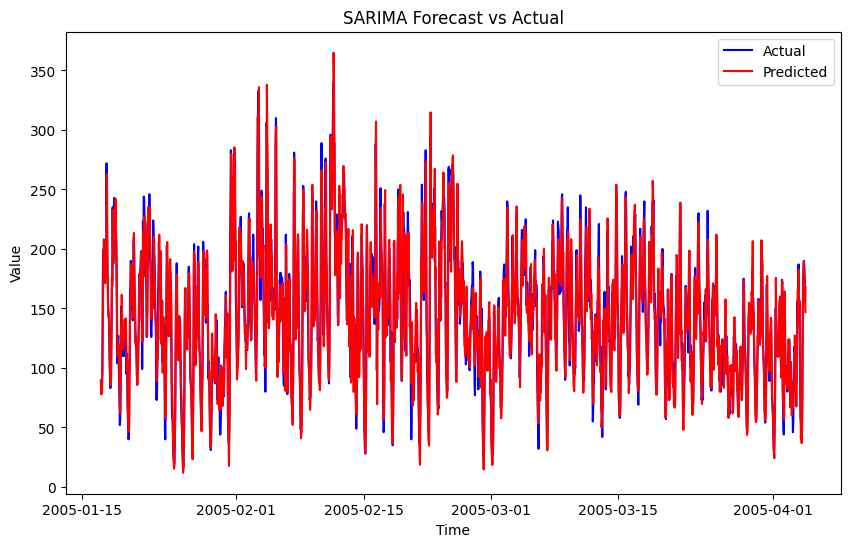

In [ ]:
# Evaluate metrics (SARIMA)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# R-squared
ss_total = np.sum((test - test.mean()) ** 2)
ss_residual = np.sum((test - predictions) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(f'R-squared: {r2:.3f}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# AIC (Akaike Information Criterion)
aic = model_fit.aic
print(f'Akaike Information Criterion (AIC): {aic:.3f}')

# Create a time series for the predictions, using the same index as the test set
prediction_index = test.index
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10,6))
plt.plot(test, label='Actual', color='blue', linewidth=1.5)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### 5.4 Seasonal Autoregressive Integrated Moving Average with eXogenous Inputs Model (SARIMAX)

0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.568, Expected=89.500
1


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.460, Expected=79.000
2


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.989, Expected=79.000
3


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=56.585, Expected=90.000
4


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.624, Expected=95.000
5


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted=133.210, Expected=169.000
6


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.700, Expected=199.000
7


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=197.976, Expected=186.000
8


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.016, Expected=208.000
9


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=220.956, Expected=178.000
10
Predicted=183.217, Expected=176.000
11
Predicted=181.090, Expected=177.000
12
Predicted=154.546, Expected=182.000
13


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.394, Expected=182.000
14
Predicted=191.574, Expected=193.000
15
Predicted=200.663, Expected=272.000
16


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=291.343, Expected=225.000
17


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=227.589, Expected=181.000
18


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.447, Expected=172.000
19


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.200, Expected=153.000
20


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.868, Expected=143.000
21


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.032, Expected=142.000
22


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.271, Expected=131.000
23


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.852, Expected=105.000
24


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=96.780, Expected=94.000
25


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.700, Expected=83.000
26
Predicted=85.434, Expected=87.000
27
Predicted=85.316, Expected=106.000
28
Predicted=112.563, Expected=140.000
29
Predicted=195.155, Expected=167.000
30


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.767, Expected=175.000
31


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.221, Expected=235.000
32


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=252.298, Expected=196.000
33


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.948, Expected=211.000
34
Predicted=209.591, Expected=234.000
35
Predicted=222.624, Expected=240.000
36
Predicted=235.333, Expected=243.000
37
Predicted=255.934, Expected=224.000
38
Predicted=239.157, Expected=240.000
39


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=284.605, Expected=215.000
40


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.899, Expected=216.000
41
Predicted=207.551, Expected=184.000
42
Predicted=176.853, Expected=152.000
43
Predicted=130.596, Expected=104.000
44
Predicted=112.511, Expected=104.000
45


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.623, Expected=124.000
46


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.565, Expected=127.000
47
Predicted=108.718, Expected=109.000
48
Predicted=98.368, Expected=91.000
49
Predicted=80.874, Expected=73.000
50
Predicted=74.467, Expected=52.000
51
Predicted=67.681, Expected=57.000
52
Predicted=73.520, Expected=89.000
53


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.091, Expected=128.000
54
Predicted=146.619, Expected=152.000
55
Predicted=162.828, Expected=128.000
56


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.825, Expected=124.000
57


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.030, Expected=117.000
58


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.206, Expected=110.000
59


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.684, Expected=128.000
60
Predicted=132.576, Expected=114.000
61


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.775, Expected=110.000
62
Predicted=122.272, Expected=112.000
63


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.096, Expected=130.000
64
Predicted=113.661, Expected=135.000
65


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.206, Expected=141.000
66


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.055, Expected=141.000
67


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.562, Expected=95.000
68


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.172, Expected=97.000
69


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.567, Expected=112.000
70
Predicted=103.555, Expected=74.000
71


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=53.532, Expected=62.000
72
Predicted=49.454, Expected=51.000
73
Predicted=38.184, Expected=40.000
74
Predicted=35.492, Expected=45.000
75


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.051, Expected=93.000
76


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.591, Expected=104.000
77


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.094, Expected=162.000
78


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.847, Expected=169.000
79


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.623, Expected=190.000
80


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.419, Expected=170.000
81
Predicted=170.094, Expected=151.000
82


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.439, Expected=150.000
83
Predicted=165.206, Expected=154.000
84


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.302, Expected=140.000
85


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.362, Expected=167.000
86


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.050, Expected=204.000
87


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.204, Expected=210.000
88


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.082, Expected=182.000
89
Predicted=170.698, Expected=165.000
90


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.184, Expected=150.000
91
Predicted=102.409, Expected=132.000
92


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.860, Expected=120.000
93


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.269, Expected=119.000
94


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.467, Expected=110.000
95
Predicted=93.509, Expected=94.000
96
Predicted=79.325, Expected=97.500
97


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=79.571, Expected=101.000
98
Predicted=90.288, Expected=117.000
99


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.127, Expected=121.000
100


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.517, Expected=138.000
101


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=182.435, Expected=174.000
102


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.588, Expected=179.000
103


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.613, Expected=175.000
104
Predicted=162.608, Expected=183.000
105


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.284, Expected=189.000
106
Predicted=185.460, Expected=198.000
107
Predicted=210.685, Expected=142.000
108
Predicted=127.181, Expected=139.000
109


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.866, Expected=99.000
110


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.725, Expected=135.000
111


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.508, Expected=223.000
112


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.787, Expected=194.000
113


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.743, Expected=244.000
114


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=226.656, Expected=243.000
115
Predicted=212.890, Expected=230.000
116


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=222.027, Expected=207.000
117


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=217.250, Expected=223.000
118


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.937, Expected=216.000
119
Predicted=200.923, Expected=198.000
120
Predicted=196.065, Expected=162.000
121


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.762, Expected=126.000
122


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.489, Expected=144.000
123


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.145, Expected=183.000
124
Predicted=195.772, Expected=193.000
125
Predicted=240.493, Expected=196.000
126


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=205.200, Expected=208.000
127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=217.594, Expected=217.000
128


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.240, Expected=246.000
129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=239.329, Expected=204.000
130


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=216.255, Expected=192.000
131


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.036, Expected=186.000
132


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.960, Expected=133.000
133


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.715, Expected=126.000
134


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.571, Expected=138.000
135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.515, Expected=148.000
136
Predicted=119.463, Expected=167.000
137


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.042, Expected=175.000
138
Predicted=164.161, Expected=224.000
139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=202.544, Expected=215.000
140
Predicted=205.301, Expected=196.000
141
Predicted=195.365, Expected=195.000
142
Predicted=191.095, Expected=181.000
143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.515, Expected=150.000
144


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.641, Expected=144.500
145
Predicted=130.874, Expected=139.000
146
Predicted=159.849, Expected=74.000
147


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.032, Expected=73.000
148


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.996, Expected=77.000
149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.308, Expected=98.000
150


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.946, Expected=121.000
151


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.512, Expected=162.000
152
Predicted=180.254, Expected=178.000
153
Predicted=170.137, Expected=206.000
154


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.543, Expected=191.000
155


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.066, Expected=175.000
156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.425, Expected=169.000
157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.202, Expected=180.000
158


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.155, Expected=124.000
159


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.937, Expected=130.000
160


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.861, Expected=141.000
161


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.579, Expected=157.000
162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=193.924, Expected=123.000
163


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.832, Expected=104.000
164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.093, Expected=134.000
165


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.761, Expected=105.000
166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.952, Expected=121.000
167


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.584, Expected=136.000
168


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.993, Expected=92.000
169


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.609, Expected=48.000
170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=28.165, Expected=40.000
171


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=58.428, Expected=67.000
172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=73.301, Expected=104.000
173


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.326, Expected=169.000
174


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.327, Expected=203.000
175


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.988, Expected=183.000
176


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.343, Expected=151.000
177


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.906, Expected=138.000
178


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.145, Expected=127.000
179


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.050, Expected=137.500
180
Predicted=120.588, Expected=148.000
181


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.254, Expected=172.000
182


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.947, Expected=163.000
183


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.276, Expected=180.000
184


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.172, Expected=169.000
185


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.204, Expected=152.000
186


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.271, Expected=107.000
187


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.483, Expected=75.000
188
Predicted=80.262, Expected=58.000
189
Predicted=38.086, Expected=57.000
190


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.590, Expected=44.000
191


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=26.572, Expected=29.000
192


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=7.290, Expected=24.000
193


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=2.046, Expected=19.000
194
Predicted=-16.112, Expected=20.000
195


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=39.893, Expected=35.000
196


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=55.904, Expected=60.000
197


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.727, Expected=115.000
198


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.831, Expected=157.000
199


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.029, Expected=147.000
200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.377, Expected=188.000
201


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.500, Expected=126.000
202


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.458, Expected=114.000
203


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.419, Expected=123.000
204
Predicted=126.443, Expected=107.000
205


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.964, Expected=121.000
206


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.284, Expected=118.000
207


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.842, Expected=134.000
208


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.994, Expected=142.000
209


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.807, Expected=133.000
210


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.758, Expected=106.000
211


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.214, Expected=87.000
212
Predicted=89.804, Expected=67.000
213
Predicted=53.359, Expected=55.000
214


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=52.089, Expected=49.000
215
Predicted=42.266, Expected=30.000
216


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=14.941, Expected=25.000
217
Predicted=17.026, Expected=20.000
218
Predicted=19.999, Expected=17.000
219
Predicted=33.401, Expected=35.000
220
Predicted=62.392, Expected=71.000
221
Predicted=128.506, Expected=136.000
222
Predicted=178.203, Expected=163.000
223
Predicted=148.977, Expected=143.000
224
Predicted=183.559, Expected=134.000
225


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.389, Expected=130.000
226


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.403, Expected=122.000
227


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.186, Expected=129.000
228


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.999, Expected=132.000
229


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.440, Expected=133.000
230


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.103, Expected=126.000
231
Predicted=146.334, Expected=177.000
232


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.525, Expected=185.000
233


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.228, Expected=169.000
234


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.404, Expected=151.000
235


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.878, Expected=114.000
236


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.864, Expected=90.000
237


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.106, Expected=87.000
238


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.545, Expected=83.000
239


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=70.543, Expected=74.000
240


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.040, Expected=51.000
241


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=46.251, Expected=28.000
242


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=28.856, Expected=26.000
243


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=42.422, Expected=61.000
244


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.291, Expected=91.000
245


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.424, Expected=184.000
246


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.285, Expected=204.000
247


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.668, Expected=185.000
248


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.366, Expected=125.000
249


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.772, Expected=104.000
250
Predicted=108.154, Expected=115.000
251


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.073, Expected=126.000
252
Predicted=136.882, Expected=125.000
253


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.582, Expected=139.000
254


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.879, Expected=142.000
255
Predicted=199.521, Expected=170.000
256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.645, Expected=195.000
257
Predicted=179.265, Expected=202.000
258


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.884, Expected=168.000
259


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.998, Expected=128.000
260


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.576, Expected=115.000
261


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.350, Expected=111.000
262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.500, Expected=97.000
263
Predicted=88.768, Expected=77.000
264


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.206, Expected=64.000
265


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=39.703, Expected=51.000
266


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=46.160, Expected=49.000
267
Predicted=82.002, Expected=79.000
268


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.837, Expected=92.000
269


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.578, Expected=167.000
270


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.663, Expected=206.000
271


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=190.101, Expected=184.000
272


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.806, Expected=176.000
273


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.090, Expected=191.000
274


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.458, Expected=147.000
275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.734, Expected=174.000
276


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.171, Expected=167.000
277


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.859, Expected=138.000
278


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.923, Expected=164.000
279


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.755, Expected=190.000
280


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.378, Expected=198.000
281


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.316, Expected=155.000
282


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.842, Expected=153.000
283


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.461, Expected=110.000
284
Predicted=90.484, Expected=91.000
285
Predicted=87.646, Expected=105.000
286


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.313, Expected=85.000
287


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.837, Expected=60.000
288


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=45.360, Expected=47.000
289


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=27.978, Expected=34.000
290


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=31.942, Expected=31.000
291
Predicted=62.330, Expected=37.000
292


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.703, Expected=58.000
293


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.636, Expected=92.000
294


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.341, Expected=110.000
295


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.999, Expected=101.000
296


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.677, Expected=96.000
297


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.735, Expected=102.000
298
Predicted=73.969, Expected=96.000
299


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.482, Expected=102.000
300
Predicted=97.976, Expected=88.000
301


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.347, Expected=87.000
302


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.854, Expected=115.000
303


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.619, Expected=118.000
304


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.745, Expected=134.000
305


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.329, Expected=125.000
306


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.821, Expected=140.000
307


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.449, Expected=83.000
308


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.453, Expected=73.000
309


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=78.047, Expected=92.000
310


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=70.179, Expected=109.000
311


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.595, Expected=82.000
312


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.295, Expected=82.500
313


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.056, Expected=83.000
314


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.642, Expected=50.000
315


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.373, Expected=44.000
316


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.676, Expected=49.000
317


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.260, Expected=62.000
318


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.086, Expected=85.000
319


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.783, Expected=82.000
320
Predicted=74.773, Expected=77.000
321
Predicted=86.313, Expected=92.000
322


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.680, Expected=95.000
323
Predicted=101.749, Expected=95.000
324
Predicted=87.300, Expected=76.000
325
Predicted=75.590, Expected=95.000
326
Predicted=124.085, Expected=118.000
327


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.272, Expected=123.000
328
Predicted=139.096, Expected=140.000
329
Predicted=146.140, Expected=163.000
330
Predicted=184.004, Expected=164.000
331
Predicted=104.069, Expected=120.000
332


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.233, Expected=130.000
333
Predicted=148.883, Expected=145.000
334
Predicted=182.691, Expected=126.000
335


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=96.453, Expected=61.000
336


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.186, Expected=49.000
337
Predicted=50.771, Expected=37.000
338


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=-1.273, Expected=37.000
339


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=36.973, Expected=50.000
340
Predicted=54.614, Expected=109.000
341


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.110, Expected=198.000
342
Predicted=230.432, Expected=240.500
343
Predicted=236.686, Expected=283.000
344


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=298.342, Expected=256.000
345


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=265.739, Expected=261.000
346


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=258.066, Expected=181.000
347


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.789, Expected=194.000
348


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.460, Expected=214.000
349
Predicted=237.959, Expected=204.000
350


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.201, Expected=228.000
351
Predicted=231.645, Expected=270.000
352


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=297.840, Expected=285.000
353
Predicted=296.578, Expected=282.000
354


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=285.886, Expected=235.000
355


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.600, Expected=208.000
356
Predicted=214.951, Expected=161.000
357


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.684, Expected=146.000
358


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.087, Expected=123.000
359


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=63.709, Expected=109.000
360


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.947, Expected=112.000
361


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.328, Expected=115.000
362
Predicted=107.406, Expected=114.000
363
Predicted=123.616, Expected=122.000
364
Predicted=165.288, Expected=149.000
365


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.890, Expected=187.000
366


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=216.328, Expected=198.000
367
Predicted=213.812, Expected=196.000
368
Predicted=174.584, Expected=218.000
369


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=235.893, Expected=227.000
370
Predicted=203.194, Expected=181.000
371


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.645, Expected=179.000
372
Predicted=172.473, Expected=151.000
373
Predicted=156.476, Expected=162.000
374
Predicted=186.065, Expected=165.000
375
Predicted=178.267, Expected=173.000
376
Predicted=187.405, Expected=188.000
377
Predicted=199.505, Expected=186.000
378
Predicted=173.597, Expected=172.000
379


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.602, Expected=150.000
380
Predicted=152.179, Expected=137.000
381
Predicted=141.549, Expected=133.000
382
Predicted=111.760, Expected=122.000
383
Predicted=67.673, Expected=130.000
384
Predicted=134.748, Expected=125.500
385
Predicted=118.841, Expected=121.000
386
Predicted=122.447, Expected=115.000
387
Predicted=123.914, Expected=125.000
388


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.798, Expected=136.000
389
Predicted=0.000, Expected=174.000
390


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=199.206, Expected=224.000
391


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=253.208, Expected=230.000
392
Predicted=220.446, Expected=205.000
393
Predicted=207.018, Expected=204.000
394


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.539, Expected=139.000
395
Predicted=146.708, Expected=133.000
396
Predicted=129.159, Expected=127.000
397
Predicted=125.554, Expected=124.000
398


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.544, Expected=158.000
399
Predicted=187.621, Expected=171.000
400


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=182.952, Expected=193.000
401


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.388, Expected=195.000
402
Predicted=165.616, Expected=212.000
403


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=200.495, Expected=193.000
404


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.984, Expected=167.000
405
Predicted=159.536, Expected=156.000
406


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.826, Expected=153.000
407


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.439, Expected=128.000
408


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.133, Expected=112.000
409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.457, Expected=96.000
410


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.804, Expected=105.000
411


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.783, Expected=130.000
412


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.353, Expected=134.000
413
Predicted=171.500, Expected=275.000
414
Predicted=300.060, Expected=309.000
415


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=313.352, Expected=322.000
416


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=300.154, Expected=333.000
417
Predicted=334.778, Expected=235.000
418


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=184.498, Expected=241.000
419


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.856, Expected=214.000
420


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.372, Expected=174.000
421


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.970, Expected=157.000
422
Predicted=192.159, Expected=170.000
423
Predicted=186.676, Expected=212.000
424
Predicted=225.494, Expected=249.000
425


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=246.314, Expected=231.000
426


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=248.591, Expected=216.000
427


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.607, Expected=217.000
428
Predicted=188.490, Expected=203.000
429
Predicted=189.575, Expected=161.000
430


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.323, Expected=147.000
431
Predicted=130.685, Expected=111.000
432
Predicted=100.967, Expected=113.000
433
Predicted=94.419, Expected=115.000
434
Predicted=116.610, Expected=80.000
435
Predicted=113.941, Expected=122.000
436
Predicted=123.625, Expected=186.000
437


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=280.118, Expected=306.000
438
Predicted=340.453, Expected=301.000
439


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=313.251, Expected=274.000
440


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=288.339, Expected=247.000
441


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.739, Expected=169.000
442


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.787, Expected=138.000
443


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.217, Expected=149.000
444


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.891, Expected=165.000
445


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.732, Expected=156.000
446


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.249, Expected=184.000
447


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.614, Expected=197.000
448


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=233.152, Expected=204.000
449


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.734, Expected=207.000
450


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.038, Expected=208.000
451


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=199.174, Expected=174.000
452
Predicted=160.163, Expected=157.000
453


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.801, Expected=166.000
454


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.999, Expected=167.000
455


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.028, Expected=154.000
456


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.807, Expected=159.000
457


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.129, Expected=164.000
458
Predicted=148.973, Expected=149.000
459


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.766, Expected=150.000
460


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.138, Expected=205.000
461


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=339.517, Expected=283.000
462
Predicted=304.597, Expected=310.000
463


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=310.263, Expected=200.000
464
Predicted=208.996, Expected=147.000
465


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.862, Expected=128.000
466


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.923, Expected=121.000
467


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.745, Expected=129.000
468


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.052, Expected=110.000
469


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.905, Expected=126.000
470


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.929, Expected=121.000
471
Predicted=147.881, Expected=142.000
472
Predicted=161.213, Expected=174.000
473


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.566, Expected=168.000
474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.743, Expected=180.000
475
Predicted=151.111, Expected=157.000
476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.568, Expected=162.000
477
Predicted=165.993, Expected=173.000
478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.177, Expected=176.000
479
Predicted=157.153, Expected=172.000
480


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.343, Expected=140.000
481


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.658, Expected=108.000
482
Predicted=103.427, Expected=88.000
483


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.006, Expected=85.000
484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.178, Expected=88.000
485


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.234, Expected=94.000
486
Predicted=122.656, Expected=115.000
487


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=2.313, Expected=137.000
488


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.482, Expected=212.000
489


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.430, Expected=173.000
490


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.318, Expected=135.000
491


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.895, Expected=100.000
492
Predicted=82.424, Expected=78.000
493


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.043, Expected=100.000
494
Predicted=112.403, Expected=150.000
495


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.005, Expected=142.000
496
Predicted=151.001, Expected=165.000
497


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.153, Expected=179.000
498
Predicted=187.443, Expected=149.000
499
Predicted=106.753, Expected=126.000
500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.986, Expected=120.000
501


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.558, Expected=110.000
502
Predicted=109.064, Expected=92.000
503


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=79.271, Expected=78.000
504
Predicted=60.980, Expected=71.500
505
Predicted=63.746, Expected=65.000
506


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=49.309, Expected=73.000
507


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.745, Expected=85.000
508
Predicted=125.111, Expected=133.000
509


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.968, Expected=246.000
510


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=296.581, Expected=281.000
511


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=197.852, Expected=222.000
512


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=203.398, Expected=182.000
513


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.289, Expected=154.000
514


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.308, Expected=168.000
515


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.639, Expected=149.000
516


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.394, Expected=156.000
517


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.063, Expected=156.000
518
Predicted=145.772, Expected=187.000
519


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.366, Expected=194.000
520


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.892, Expected=204.000
521


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=212.325, Expected=174.000
522


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.903, Expected=154.000
523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.335, Expected=117.000
524
Predicted=115.990, Expected=98.000
525
Predicted=98.892, Expected=90.000
526
Predicted=86.269, Expected=74.000
527
Predicted=62.976, Expected=49.000
528
Predicted=14.213, Expected=51.500
529
Predicted=34.863, Expected=54.000
530
Predicted=48.182, Expected=69.000
531


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=79.639, Expected=92.000
532
Predicted=112.600, Expected=146.000
533


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.081, Expected=224.000
534


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=278.541, Expected=253.000
535
Predicted=257.663, Expected=225.000
536
Predicted=240.504, Expected=180.000
537


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.746, Expected=194.000
538


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.210, Expected=158.000
539


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.762, Expected=184.000
540


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.993, Expected=165.000
541


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.662, Expected=156.000
542
Predicted=190.349, Expected=172.000
543
Predicted=170.292, Expected=194.000
544
Predicted=212.741, Expected=208.000
545
Predicted=187.228, Expected=187.000
546
Predicted=164.870, Expected=187.000
547
Predicted=158.092, Expected=127.000
548


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.920, Expected=107.000
549
Predicted=99.591, Expected=99.000
550
Predicted=82.532, Expected=100.000
551
Predicted=80.925, Expected=73.000
552
Predicted=71.936, Expected=78.000
553
Predicted=81.680, Expected=83.000
554


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.602, Expected=92.000
555
Predicted=110.508, Expected=100.000
556
Predicted=149.257, Expected=149.000
557
Predicted=232.696, Expected=231.000
558
Predicted=257.194, Expected=245.000
559


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=218.822, Expected=203.000
560
Predicted=159.160, Expected=165.000
561


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.418, Expected=168.000
562


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.454, Expected=151.000
563


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.838, Expected=152.000
564


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.996, Expected=144.000
565


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.573, Expected=148.000
566


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.056, Expected=176.000
567
Predicted=190.574, Expected=209.000
568


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.114, Expected=240.000
569


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.573, Expected=223.000
570


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.963, Expected=187.000
571


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.591, Expected=157.000
572


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.534, Expected=123.000
573


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.492, Expected=126.000
574


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.980, Expected=106.000
575


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.075, Expected=95.000
576


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.438, Expected=91.000
577


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.623, Expected=87.000
578


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.825, Expected=88.000
579


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.464, Expected=134.000
580


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.528, Expected=156.000
581


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=253.998, Expected=247.000
582


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=255.280, Expected=289.000
583
Predicted=244.437, Expected=250.000
584


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=216.954, Expected=232.000
585


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=224.681, Expected=185.000
586
Predicted=191.672, Expected=147.000
587


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.051, Expected=128.000
588


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.503, Expected=131.000
589


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.800, Expected=135.000
590


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.484, Expected=149.000
591


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.796, Expected=209.000
592


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=225.479, Expected=243.000
593


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=226.747, Expected=276.000
594


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=231.098, Expected=225.000
595
Predicted=203.734, Expected=194.000
596
Predicted=156.753, Expected=164.000
597
Predicted=167.081, Expected=148.000
598
Predicted=132.999, Expected=136.000
599
Predicted=121.179, Expected=116.000
600
Predicted=115.541, Expected=103.500
601
Predicted=100.746, Expected=91.000
602
Predicted=93.782, Expected=87.000
603
Predicted=136.471, Expected=123.000
604
Predicted=147.022, Expected=152.000
605
Predicted=240.550, Expected=267.000
606
Predicted=306.101, Expected=296.000
607


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=262.312, Expected=291.000
608


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=263.137, Expected=276.000
609


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=227.303, Expected=250.000
610
Predicted=206.054, Expected=251.000
611


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=230.757, Expected=275.000
612


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=271.077, Expected=312.000
613


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=313.558, Expected=340.000
614


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=367.908, Expected=326.000
615


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=384.447, Expected=284.000
616


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=321.218, Expected=289.000
617


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=294.340, Expected=215.000
618


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.126, Expected=207.000
619
Predicted=177.749, Expected=213.000
620


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.341, Expected=192.000
621


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.914, Expected=211.000
622
Predicted=201.572, Expected=229.000
623


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.770, Expected=216.000
624
Predicted=208.991, Expected=181.000
625
Predicted=166.390, Expected=146.000
626


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.602, Expected=136.000
627
Predicted=172.355, Expected=156.000
628


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.576, Expected=176.000
629
Predicted=278.086, Expected=224.000
630


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=240.997, Expected=207.000
631


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.885, Expected=221.000
632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=216.566, Expected=229.000
633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=202.486, Expected=208.000
634
Predicted=197.525, Expected=207.000
635


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=220.412, Expected=216.000
636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=239.886, Expected=224.000
637


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=234.233, Expected=225.000
638
Predicted=217.080, Expected=227.000
639
Predicted=239.425, Expected=248.000
640
Predicted=270.136, Expected=251.000
641


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=236.796, Expected=265.000
642
Predicted=234.113, Expected=262.000
643
Predicted=255.722, Expected=241.000
644
Predicted=214.000, Expected=231.000
645
Predicted=235.085, Expected=229.000
646
Predicted=227.262, Expected=221.000
647
Predicted=198.973, Expected=180.000
648
Predicted=150.614, Expected=160.000
649
Predicted=139.072, Expected=140.000
650
Predicted=131.843, Expected=153.000
651
Predicted=189.891, Expected=150.000
652


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.475, Expected=145.000
653


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=224.561, Expected=149.000
654


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.409, Expected=155.000
655
Predicted=154.211, Expected=158.000
656
Predicted=153.959, Expected=188.000
657


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.542, Expected=154.000
658
Predicted=154.892, Expected=107.000
659


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.731, Expected=92.000
660


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.822, Expected=106.000
661


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.082, Expected=90.000
662


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.272, Expected=100.000
663


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.376, Expected=132.000
664


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.314, Expected=211.000
665


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=241.253, Expected=179.000
666


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.642, Expected=116.000
667
Predicted=87.321, Expected=143.000
668


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.635, Expected=142.000
669
Predicted=141.636, Expected=135.000
670
Predicted=131.378, Expected=136.000
671
Predicted=100.656, Expected=109.000
672
Predicted=87.676, Expected=85.500
673
Predicted=62.205, Expected=62.000
674
Predicted=71.484, Expected=49.000
675


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=47.168, Expected=81.000
676


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.530, Expected=104.000
677
Predicted=126.553, Expected=176.000
678
Predicted=180.241, Expected=193.000
679
Predicted=202.708, Expected=168.000
680


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.693, Expected=123.000
681


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.282, Expected=111.000
682


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.635, Expected=120.000
683


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.164, Expected=123.000
684
Predicted=135.672, Expected=115.000
685


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.741, Expected=120.000
686


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.793, Expected=140.000
687


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.029, Expected=185.000
688


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=196.981, Expected=212.000
689


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=213.538, Expected=200.000
690


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.891, Expected=191.000
691


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.924, Expected=169.000
692


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.202, Expected=139.000
693


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.647, Expected=102.000
694


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.185, Expected=76.000
695
Predicted=36.725, Expected=56.000
696


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=42.344, Expected=43.000
697


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=29.256, Expected=30.000
698
Predicted=41.379, Expected=28.000
699


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=37.729, Expected=56.000
700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.246, Expected=94.000
701


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.958, Expected=196.000
702
Predicted=223.714, Expected=220.000
703
Predicted=206.098, Expected=168.000
704


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.103, Expected=133.000
705
Predicted=102.079, Expected=134.000
706


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.497, Expected=138.000
707
Predicted=134.744, Expected=135.000
708
Predicted=135.857, Expected=111.000
709


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.605, Expected=124.000
710


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.508, Expected=158.000
711
Predicted=195.580, Expected=181.000
712


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=220.101, Expected=185.000
713


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.018, Expected=187.000
714
Predicted=184.285, Expected=196.000
715
Predicted=162.959, Expected=174.000
716
Predicted=139.746, Expected=182.000
717
Predicted=149.115, Expected=182.000
718
Predicted=158.603, Expected=193.000
719
Predicted=182.275, Expected=174.000
720
Predicted=157.984, Expected=158.000
721
Predicted=146.637, Expected=142.000
722
Predicted=139.084, Expected=137.000
723
Predicted=164.666, Expected=140.000
724


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.053, Expected=201.000
725
Predicted=317.417, Expected=288.000
726
Predicted=300.534, Expected=260.000
727
Predicted=202.604, Expected=206.000
728
Predicted=172.108, Expected=98.000
729


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.122, Expected=138.000
730


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.690, Expected=139.000
731


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.268, Expected=137.000
732


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.687, Expected=155.000
733


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.533, Expected=155.000
734


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.677, Expected=148.000
735
Predicted=164.834, Expected=153.000
736


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.792, Expected=171.000
737


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.049, Expected=227.000
738


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=241.742, Expected=251.000
739


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.914, Expected=216.000
740


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.550, Expected=200.000
741


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.989, Expected=192.000
742


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=205.457, Expected=187.000
743


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.904, Expected=173.000
744


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.652, Expected=118.500
745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.319, Expected=64.000
746
Predicted=61.087, Expected=46.000
747
Predicted=51.068, Expected=51.000
748


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.645, Expected=115.000
749
Predicted=205.633, Expected=238.000
750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=226.079, Expected=202.000
751
Predicted=146.381, Expected=167.000
752
Predicted=68.675, Expected=139.000
753
Predicted=160.826, Expected=147.000
754


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.863, Expected=130.000
755


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.228, Expected=143.000
756
Predicted=144.222, Expected=143.000
757
Predicted=146.856, Expected=136.000
758


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.342, Expected=143.000
759


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.851, Expected=177.000
760


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=190.983, Expected=198.000
761


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=222.400, Expected=200.000
762


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=212.743, Expected=191.000
763


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.992, Expected=169.000
764


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.478, Expected=106.000
765


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.184, Expected=105.000
766


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.090, Expected=130.000
767


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.809, Expected=82.000
768
Predicted=49.136, Expected=63.500
769


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=34.152, Expected=45.000
770


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=38.120, Expected=35.000
771
Predicted=39.782, Expected=60.000
772


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.781, Expected=90.000
773


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.553, Expected=205.000
774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.636, Expected=199.000
775


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.668, Expected=153.000
776


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=76.717, Expected=163.000
777


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=190.671, Expected=152.000
778


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.447, Expected=146.000
779


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.096, Expected=146.000
780


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.850, Expected=134.000
781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.389, Expected=164.000
782


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.890, Expected=141.000
783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.447, Expected=204.000
784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.728, Expected=210.000
785
Predicted=216.060, Expected=250.000
786
Predicted=241.454, Expected=202.000
787
Predicted=186.319, Expected=190.000
788
Predicted=131.085, Expected=236.000
789


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.812, Expected=250.000
790


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=276.299, Expected=219.000
791


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.074, Expected=156.000
792


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.718, Expected=127.000
793


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.643, Expected=98.000
794
Predicted=86.562, Expected=89.000
795


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.089, Expected=104.000
796


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.583, Expected=148.000
797


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=266.716, Expected=194.000
798


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.988, Expected=231.000
799


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.474, Expected=200.000
800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.672, Expected=217.000
801


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.080, Expected=210.000
802


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.798, Expected=126.000
803


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.477, Expected=118.000
804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.145, Expected=114.000
805
Predicted=143.888, Expected=117.000
806


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.417, Expected=140.000
807


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.286, Expected=168.000
808


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=183.235, Expected=202.000
809


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=228.235, Expected=211.000
810


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.910, Expected=231.000
811


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.955, Expected=214.000
812


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.220, Expected=181.000
813


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.891, Expected=173.000
814


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.834, Expected=169.000
815


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.510, Expected=174.000
816


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.637, Expected=152.000
817


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.516, Expected=130.000
818


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.497, Expected=72.000
819


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.565, Expected=40.000
820


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.341, Expected=56.000
821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.855, Expected=81.000
822
Predicted=112.193, Expected=81.000
823
Predicted=41.192, Expected=88.000
824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.478, Expected=94.000
825


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.554, Expected=97.000
826


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.388, Expected=112.000
827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.297, Expected=104.000
828


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.615, Expected=107.000
829


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.224, Expected=114.000
830


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.279, Expected=115.000
831


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.481, Expected=127.000
832


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.619, Expected=119.000
833


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.015, Expected=149.000
834
Predicted=123.755, Expected=140.000
835


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.305, Expected=105.000
836
Predicted=115.436, Expected=116.000
837
Predicted=120.096, Expected=112.000
838
Predicted=96.569, Expected=80.000
839
Predicted=44.712, Expected=59.000
840
Predicted=33.209, Expected=47.500
841
Predicted=21.681, Expected=36.000
842
Predicted=6.718, Expected=49.000
843


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=48.547, Expected=63.000
844


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.110, Expected=123.000
845


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.146, Expected=164.000
846


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=184.931, Expected=218.000
847


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.761, Expected=254.000
848


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=276.869, Expected=210.000
849
Predicted=206.163, Expected=208.000
850


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.170, Expected=204.000
851


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.061, Expected=172.000
852


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.610, Expected=157.000
853


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.077, Expected=181.000
854


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.746, Expected=194.000
855


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=211.673, Expected=193.000
856


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.218, Expected=252.000
857


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=284.117, Expected=283.000
858


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=294.816, Expected=208.000
859


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.205, Expected=143.000
860


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.774, Expected=124.000
861


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.134, Expected=89.000
862


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=74.798, Expected=85.000
863


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=91.415, Expected=66.000
864


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=33.631, Expected=56.000
865


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=55.300, Expected=46.000
866


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=19.477, Expected=60.000
867


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=75.129, Expected=117.000
868
Predicted=173.433, Expected=178.000
869
Predicted=215.929, Expected=295.000
870
Predicted=365.090, Expected=243.000
871


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=265.827, Expected=255.000
872


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.465, Expected=201.000
873


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=193.980, Expected=208.000
874
Predicted=208.246, Expected=212.000
875
Predicted=185.989, Expected=238.000
876
Predicted=234.560, Expected=201.000
877
Predicted=219.666, Expected=218.000
878
Predicted=227.603, Expected=222.000
879
Predicted=223.379, Expected=206.000
880
Predicted=252.156, Expected=251.000
881
Predicted=281.195, Expected=190.000
882


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.587, Expected=218.000
883


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.269, Expected=150.000
884


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.104, Expected=111.000
885


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.953, Expected=142.000
886


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.617, Expected=119.000
887


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.039, Expected=87.000
888
Predicted=76.764, Expected=78.500
889


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=68.388, Expected=70.000
890
Predicted=82.275, Expected=68.000
891


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.899, Expected=66.000
892


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.712, Expected=117.000
893
Predicted=186.663, Expected=197.000
894
Predicted=213.959, Expected=198.000
895


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=241.761, Expected=167.000
896
Predicted=138.245, Expected=180.000
897


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.969, Expected=169.000
898


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.300, Expected=210.000
899


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=197.289, Expected=232.000
900


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.980, Expected=223.000
901
Predicted=238.764, Expected=224.000
902
Predicted=240.035, Expected=238.000
903
Predicted=225.441, Expected=249.000
904


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=294.035, Expected=223.000
905


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=222.622, Expected=244.000
906


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=218.949, Expected=243.000
907


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.604, Expected=226.000
908


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.927, Expected=167.000
909


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.243, Expected=172.000
910


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=140.276, Expected=120.000
911


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.494, Expected=100.000
912


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.518, Expected=93.000
913


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=79.990, Expected=86.000
914


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.691, Expected=81.000
915


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.151, Expected=131.000
916


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.981, Expected=170.000
917


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=275.597, Expected=267.000
918


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=246.618, Expected=269.000
919


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=243.899, Expected=244.000
920
Predicted=238.646, Expected=232.000
921
Predicted=227.431, Expected=196.000
922


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=241.808, Expected=195.000
923
Predicted=228.588, Expected=189.000
924


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.090, Expected=212.000
925


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.840, Expected=267.000
926


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=260.642, Expected=262.000
927


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=255.196, Expected=270.000
928


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=268.194, Expected=260.000
929


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=257.263, Expected=265.000
930


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=261.761, Expected=262.000
931


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=234.146, Expected=227.000
932


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.010, Expected=192.000
933


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.058, Expected=202.000
934


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.684, Expected=189.000
935


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.065, Expected=157.000
936


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.105, Expected=127.000
937


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.471, Expected=97.000
938


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=101.559, Expected=100.000
939


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.614, Expected=146.000
940


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.163, Expected=175.000
941


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=277.675, Expected=180.000
942


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.531, Expected=185.000
943


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.218, Expected=190.000
944


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.534, Expected=166.000
945


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.290, Expected=153.000
946


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.925, Expected=167.000
947


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.544, Expected=137.000
948


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.957, Expected=140.000
949


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.564, Expected=150.000
950


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.298, Expected=152.000
951


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.191, Expected=177.000
952


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.071, Expected=189.000
953
Predicted=200.055, Expected=195.000
954
Predicted=193.504, Expected=179.000
955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.181, Expected=188.000
956


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.547, Expected=170.000
957
Predicted=178.937, Expected=161.000
958
Predicted=130.128, Expected=145.000
959


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.597, Expected=136.000
960


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.151, Expected=129.000
961


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.325, Expected=122.000
962


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.465, Expected=115.000
963


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.067, Expected=103.000
964


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.830, Expected=108.000
965


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.531, Expected=124.000
966


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.888, Expected=133.000
967


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.486, Expected=124.000
968


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.259, Expected=116.000
969


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.796, Expected=113.000
970


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.391, Expected=117.000
971
Predicted=94.116, Expected=118.000
972


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.225, Expected=108.000
973


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.579, Expected=98.000
974


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=96.479, Expected=117.000
975


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.637, Expected=126.000
976


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.961, Expected=142.000
977


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.296, Expected=157.000
978


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.195, Expected=161.000
979


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.768, Expected=169.000
980


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.242, Expected=166.000
981


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.765, Expected=189.000
982


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.405, Expected=184.000
983


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.762, Expected=145.000
984


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.742, Expected=132.000
985


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.987, Expected=119.000
986


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.672, Expected=87.000
987


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.663, Expected=77.000
988


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.570, Expected=112.000
989


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.482, Expected=118.000
990


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.889, Expected=124.000
991


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.984, Expected=144.000
992


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.200, Expected=128.000
993


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.908, Expected=120.000
994


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.772, Expected=131.000
995
Predicted=126.791, Expected=115.000
996
Predicted=107.702, Expected=82.000
997


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.065, Expected=100.000
998


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.976, Expected=111.000
999


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.497, Expected=132.000
1000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.925, Expected=155.000
1001


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.282, Expected=181.000
1002


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.729, Expected=155.000
1003


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.921, Expected=105.000
1004


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=91.797, Expected=119.000
1005


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.220, Expected=150.000
1006


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.808, Expected=94.000
1007


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=55.164, Expected=56.000
1008


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=54.580, Expected=42.000
1009


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=26.092, Expected=28.000
1010


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=8.401, Expected=25.000
1011


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=13.315, Expected=31.000
1012


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=54.831, Expected=66.000
1013


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=75.209, Expected=111.000
1014


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.915, Expected=122.000
1015


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.288, Expected=115.000
1016


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.237, Expected=123.000
1017


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.808, Expected=119.000
1018


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.018, Expected=125.000
1019


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.936, Expected=110.000
1020


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.578, Expected=111.000
1021


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.494, Expected=114.000
1022


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.846, Expected=114.000
1023


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.766, Expected=140.000
1024


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.911, Expected=141.000
1025


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.946, Expected=142.000
1026


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.633, Expected=123.000
1027


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.495, Expected=90.000
1028


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=96.847, Expected=79.000
1029


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.593, Expected=69.000
1030


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=41.240, Expected=60.000
1031


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=29.369, Expected=37.000
1032


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=18.889, Expected=32.000
1033


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=23.729, Expected=27.000
1034


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=-0.152, Expected=30.000
1035


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=31.542, Expected=33.000
1036


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.728, Expected=84.000
1037


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.103, Expected=147.000
1038


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.958, Expected=143.000
1039


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.283, Expected=122.000
1040


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.345, Expected=109.000
1041
Predicted=102.292, Expected=95.000
1042


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.986, Expected=94.000
1043


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.697, Expected=102.000
1044
Predicted=85.952, Expected=107.000
1045


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.068, Expected=113.000
1046


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.857, Expected=110.000
1047


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.185, Expected=116.000
1048


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.372, Expected=148.000
1049


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.474, Expected=156.000
1050


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.825, Expected=159.000
1051


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.268, Expected=116.000
1052


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.719, Expected=110.000
1053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.099, Expected=102.000
1054


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.251, Expected=93.000
1055


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.447, Expected=67.000
1056


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=59.818, Expected=71.000
1057
Predicted=67.531, Expected=75.000
1058


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.903, Expected=73.000
1059


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.031, Expected=96.000
1060


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.234, Expected=110.000
1061


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.417, Expected=150.000
1062


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.357, Expected=169.000
1063


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.850, Expected=181.000
1064


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.903, Expected=187.000
1065


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.760, Expected=146.000
1066


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.549, Expected=131.000
1067


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.874, Expected=161.000
1068


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.266, Expected=143.000
1069


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.488, Expected=176.000
1070


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.790, Expected=178.000
1071


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=185.975, Expected=207.000
1072


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=223.599, Expected=240.000
1073


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=240.974, Expected=236.000
1074


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=230.389, Expected=199.000
1075


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.406, Expected=170.000
1076


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.210, Expected=153.000
1077
Predicted=144.112, Expected=140.000
1078


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.717, Expected=138.000
1079


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.808, Expected=117.000
1080


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.874, Expected=118.000
1081


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.616, Expected=119.000
1082
Predicted=118.333, Expected=108.000
1083


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.375, Expected=121.000
1084


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.141, Expected=136.000
1085


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.580, Expected=175.000
1086


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.413, Expected=211.000
1087


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.880, Expected=186.000
1088


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.595, Expected=177.000
1089


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.467, Expected=147.000
1090


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.837, Expected=150.000
1091


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.522, Expected=148.000
1092


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.579, Expected=151.000
1093


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.696, Expected=151.000
1094


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.974, Expected=165.000
1095
Predicted=177.129, Expected=197.000
1096


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=225.041, Expected=228.000
1097
Predicted=227.829, Expected=196.000
1098


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.519, Expected=192.000
1099


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.502, Expected=161.000
1100


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.663, Expected=156.000
1101


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.126, Expected=158.000
1102


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.042, Expected=154.000
1103
Predicted=125.304, Expected=138.000
1104


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.863, Expected=115.000
1105


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.230, Expected=92.000
1106


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.729, Expected=103.000
1107


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.549, Expected=117.000
1108


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.464, Expected=139.000
1109


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.207, Expected=167.000
1110


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.342, Expected=205.000
1111


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.889, Expected=216.000
1112


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.917, Expected=192.000
1113
Predicted=159.207, Expected=188.000
1114


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.603, Expected=189.000
1115


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.948, Expected=192.000
1116


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=185.109, Expected=194.000
1117


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.589, Expected=217.000
1118
Predicted=222.882, Expected=178.000
1119


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.025, Expected=183.000
1120
Predicted=224.166, Expected=189.000
1121


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.087, Expected=225.000
1122
Predicted=207.475, Expected=175.000
1123


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.876, Expected=153.000
1124


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.004, Expected=156.000
1125
Predicted=151.327, Expected=172.000
1126


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.026, Expected=164.000
1127


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.783, Expected=157.000
1128


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.350, Expected=146.500
1129


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.864, Expected=136.000
1130


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.957, Expected=110.000
1131
Predicted=129.234, Expected=128.000
1132


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.260, Expected=132.000
1133


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.500, Expected=156.000
1134


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.108, Expected=185.000
1135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=184.627, Expected=121.000
1136


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.353, Expected=117.000
1137


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.427, Expected=133.000
1138


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.360, Expected=136.000
1139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.746, Expected=162.000
1140


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.852, Expected=132.000
1141


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.270, Expected=162.000
1142


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.600, Expected=159.000
1143


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.466, Expected=156.000
1144
Predicted=179.794, Expected=177.000
1145


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.219, Expected=185.000
1146


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.959, Expected=199.000
1147


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.152, Expected=166.000
1148


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.233, Expected=152.000
1149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.664, Expected=170.000
1150


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.201, Expected=160.000
1151


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.300, Expected=100.000
1152


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.152, Expected=78.500
1153


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.408, Expected=57.000
1154


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.544, Expected=48.000
1155


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.643, Expected=32.000
1156


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.308, Expected=72.000
1157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.947, Expected=86.000
1158


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.856, Expected=79.000
1159
Predicted=65.137, Expected=87.000
1160
Predicted=63.908, Expected=85.000
1161
Predicted=83.445, Expected=97.000
1162
Predicted=93.746, Expected=96.000
1163
Predicted=107.331, Expected=113.000
1164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.528, Expected=163.000
1165


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.314, Expected=146.000
1166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.383, Expected=167.000
1167


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.918, Expected=162.000
1168
Predicted=170.230, Expected=194.000
1169
Predicted=212.563, Expected=185.000
1170


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.344, Expected=158.000
1171
Predicted=134.097, Expected=156.000
1172


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.296, Expected=157.000
1173
Predicted=171.399, Expected=141.000
1174


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.192, Expected=116.000
1175
Predicted=92.544, Expected=84.000
1176
Predicted=69.918, Expected=59.000
1177
Predicted=49.315, Expected=34.000
1178
Predicted=20.956, Expected=45.000
1179


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=37.416, Expected=59.000
1180


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=73.033, Expected=99.000
1181


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.800, Expected=165.000
1182


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.176, Expected=168.000
1183


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.271, Expected=169.000
1184


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.792, Expected=162.000
1185
Predicted=176.327, Expected=155.000
1186


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=163.795, Expected=136.000
1187
Predicted=163.050, Expected=124.000
1188
Predicted=155.953, Expected=158.000
1189


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.096, Expected=167.000
1190
Predicted=176.344, Expected=176.000
1191
Predicted=171.686, Expected=204.000
1192


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.071, Expected=209.000
1193


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.329, Expected=224.000
1194
Predicted=208.809, Expected=211.000
1195
Predicted=197.364, Expected=174.000
1196


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.414, Expected=181.000
1197


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.050, Expected=157.000
1198


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.795, Expected=154.000
1199


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.084, Expected=147.000
1200


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.676, Expected=124.000
1201
Predicted=97.674, Expected=101.000
1202
Predicted=104.390, Expected=114.000
1203
Predicted=116.967, Expected=134.000
1204
Predicted=169.379, Expected=144.000
1205


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.800, Expected=182.000
1206


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=181.085, Expected=223.000
1207
Predicted=216.726, Expected=219.000
1208
Predicted=212.971, Expected=215.000
1209
Predicted=213.934, Expected=191.000
1210
Predicted=183.755, Expected=162.000
1211


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.178, Expected=165.000
1212


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=201.528, Expected=171.000
1213


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.536, Expected=164.000
1214


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.455, Expected=168.000
1215


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.237, Expected=204.000
1216


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=216.789, Expected=242.000
1217


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=251.440, Expected=246.000
1218
Predicted=229.007, Expected=215.000
1219


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=179.941, Expected=206.000
1220


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=213.247, Expected=167.000
1221


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.484, Expected=145.000
1222
Predicted=137.020, Expected=133.000
1223
Predicted=118.795, Expected=117.000
1224
Predicted=93.422, Expected=103.500
1225
Predicted=79.214, Expected=90.000
1226


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.841, Expected=112.000
1227


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.114, Expected=120.000
1228


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.150, Expected=141.000
1229
Predicted=185.380, Expected=190.000
1230
Predicted=216.452, Expected=215.000
1231
Predicted=213.061, Expected=215.000
1232


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.551, Expected=235.000
1233


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=218.363, Expected=194.000
1234


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.337, Expected=159.000
1235


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.391, Expected=123.000
1236


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.866, Expected=121.000
1237


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.415, Expected=102.000
1238


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.927, Expected=114.000
1239


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.888, Expected=168.000
1240


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=196.630, Expected=207.000
1241


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=215.038, Expected=199.000
1242


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.487, Expected=192.000
1243
Predicted=176.620, Expected=148.000
1244


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.893, Expected=137.000
1245


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.962, Expected=123.000
1246


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.431, Expected=109.000
1247
Predicted=95.931, Expected=98.000
1248
Predicted=80.804, Expected=96.000
1249


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.304, Expected=94.000
1250


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.178, Expected=95.000
1251


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.937, Expected=101.000
1252
Predicted=120.306, Expected=100.000
1253


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.518, Expected=150.000
1254
Predicted=178.206, Expected=168.000
1255
Predicted=168.969, Expected=199.000
1256


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=207.394, Expected=168.000
1257


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.542, Expected=161.000
1258


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.533, Expected=153.000
1259


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.714, Expected=145.000
1260


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.581, Expected=148.000
1261


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.084, Expected=131.000
1262


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.352, Expected=137.000
1263


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.621, Expected=163.000
1264


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=197.301, Expected=219.000
1265
Predicted=213.242, Expected=245.000
1266


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=209.293, Expected=229.000
1267


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.994, Expected=184.000
1268


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.971, Expected=151.000
1269


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.081, Expected=133.000
1270


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.276, Expected=135.000
1271


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.569, Expected=111.000
1272
Predicted=99.975, Expected=90.000
1273


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.701, Expected=91.000
1274


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.517, Expected=89.000
1275


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.082, Expected=89.000
1276


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.894, Expected=117.000
1277


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.480, Expected=141.000
1278


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=167.177, Expected=189.000
1279


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.956, Expected=211.000
1280


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.801, Expected=235.000
1281


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.794, Expected=162.000
1282


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.917, Expected=172.000
1283
Predicted=129.677, Expected=182.000
1284


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.247, Expected=180.000
1285


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.688, Expected=156.000
1286
Predicted=163.959, Expected=168.000
1287


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.016, Expected=181.000
1288


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=237.761, Expected=226.000
1289


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=238.976, Expected=231.000
1290


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=220.960, Expected=222.000
1291


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.929, Expected=165.000
1292


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.032, Expected=151.000
1293


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=134.931, Expected=174.000
1294


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.870, Expected=145.000
1295


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.950, Expected=147.000
1296


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.809, Expected=134.000
1297


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.334, Expected=85.000
1298


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.551, Expected=55.000
1299


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.728, Expected=65.000
1300


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.566, Expected=84.000
1301


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.264, Expected=88.000
1302


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=137.585, Expected=109.000
1303


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.094, Expected=130.000
1304
Predicted=135.586, Expected=137.000
1305
Predicted=82.289, Expected=145.000
1306


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.658, Expected=128.000
1307


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.066, Expected=129.000
1308


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.993, Expected=105.000
1309


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.256, Expected=114.000
1310


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.505, Expected=146.000
1311


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.028, Expected=156.000
1312


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=204.883, Expected=152.000
1313


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.626, Expected=201.000
1314


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=189.252, Expected=221.000
1315


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=161.110, Expected=157.000
1316


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.239, Expected=114.000
1317


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.272, Expected=107.000
1318


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.705, Expected=113.000
1319


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.974, Expected=118.000
1320


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.554, Expected=69.000
1321


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=53.917, Expected=63.000
1322
Predicted=51.203, Expected=61.000
1323
Predicted=58.776, Expected=42.000
1324


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.567, Expected=68.000
1325


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.374, Expected=120.000
1326


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.005, Expected=112.000
1327


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.159, Expected=148.000
1328
Predicted=171.231, Expected=160.000
1329
Predicted=119.869, Expected=164.000
1330


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.302, Expected=159.000
1331


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.693, Expected=110.000
1332
Predicted=110.560, Expected=82.000
1333


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.398, Expected=102.000
1334


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.552, Expected=119.000
1335


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.240, Expected=135.000
1336


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.050, Expected=215.000
1337


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=217.946, Expected=211.000
1338


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.935, Expected=172.000
1339


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.752, Expected=166.000
1340


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.924, Expected=168.000
1341
Predicted=159.000, Expected=134.000
1342


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.968, Expected=122.000
1343
Predicted=134.210, Expected=123.000
1344
Predicted=94.814, Expected=104.000
1345


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=75.335, Expected=90.000
1346


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.619, Expected=85.000
1347


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.630, Expected=103.000
1348


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.501, Expected=127.000
1349


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.949, Expected=163.000
1350


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.694, Expected=155.000
1351


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=184.395, Expected=170.000
1352


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.903, Expected=141.000
1353


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.579, Expected=123.000
1354


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.805, Expected=124.000
1355


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.577, Expected=126.000
1356


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.147, Expected=128.000
1357
Predicted=137.701, Expected=158.000
1358


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.028, Expected=177.000
1359


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=186.939, Expected=225.000
1360


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=261.471, Expected=234.000
1361
Predicted=254.149, Expected=227.000
1362


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=226.437, Expected=192.000
1363


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.718, Expected=158.000
1364


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.492, Expected=149.000
1365


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.662, Expected=140.000
1366


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=143.652, Expected=79.000
1367


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.826, Expected=69.000
1368


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=37.686, Expected=72.000
1369
Predicted=64.488, Expected=58.000
1370


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=53.824, Expected=59.000
1371


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.665, Expected=88.000
1372


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.670, Expected=110.000
1373


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.347, Expected=151.000
1374
Predicted=144.933, Expected=158.000
1375


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=185.426, Expected=194.000
1376
Predicted=185.052, Expected=181.000
1377


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.729, Expected=161.000
1378


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=158.089, Expected=143.000
1379
Predicted=116.319, Expected=142.000
1380


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.041, Expected=146.000
1381
Predicted=170.605, Expected=166.000
1382
Predicted=183.940, Expected=172.000
1383


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=206.466, Expected=196.000
1384


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=224.464, Expected=243.000
1385


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=236.207, Expected=248.000
1386


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.813, Expected=233.000
1387


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.781, Expected=174.000
1388


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.429, Expected=149.000
1389
Predicted=135.957, Expected=134.000
1390


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.629, Expected=123.000
1391


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.315, Expected=111.000
1392


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.930, Expected=93.000
1393
Predicted=79.481, Expected=97.000
1394


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.284, Expected=86.000
1395


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.183, Expected=99.000
1396
Predicted=121.641, Expected=99.000
1397


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.722, Expected=129.000
1398


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.805, Expected=161.000
1399


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=192.859, Expected=202.000
1400
Predicted=180.569, Expected=200.000
1401


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=182.295, Expected=194.000
1402


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=184.347, Expected=173.000
1403


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.288, Expected=169.000
1404


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.837, Expected=188.000
1405


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=210.243, Expected=211.000
1406


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=224.756, Expected=210.000
1407


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=247.880, Expected=193.000
1408
Predicted=241.682, Expected=227.000
1409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=232.420, Expected=223.000
1410


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=203.007, Expected=229.000
1411


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.744, Expected=194.000
1412


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.215, Expected=171.000
1413


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.811, Expected=147.000
1414
Predicted=139.006, Expected=111.000
1415
Predicted=95.865, Expected=104.000
1416


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.330, Expected=90.000
1417


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.768, Expected=81.000
1418


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=75.820, Expected=69.000
1419
Predicted=89.918, Expected=84.000
1420
Predicted=91.921, Expected=123.000
1421


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.795, Expected=166.000
1422


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=187.071, Expected=189.000
1423


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=225.469, Expected=217.000
1424
Predicted=213.513, Expected=196.000
1425
Predicted=186.581, Expected=189.000
1426


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.192, Expected=174.000
1427


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.163, Expected=161.000
1428


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.905, Expected=158.000
1429
Predicted=186.915, Expected=161.000
1430


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.448, Expected=147.000
1431


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.774, Expected=165.000
1432


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=208.019, Expected=214.000
1433


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.312, Expected=228.000
1434


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.730, Expected=240.000
1435


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=190.551, Expected=188.000
1436


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.184, Expected=173.000
1437


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.721, Expected=150.000
1438


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.721, Expected=134.000
1439


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.403, Expected=132.000
1440


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=118.739, Expected=117.000
1441
Predicted=117.041, Expected=103.000
1442


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.141, Expected=99.000
1443


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.752, Expected=106.000
1444
Predicted=114.164, Expected=113.000
1445
Predicted=147.050, Expected=141.000
1446


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.474, Expected=180.000
1447


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.758, Expected=192.000
1448


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.613, Expected=187.000
1449
Predicted=181.700, Expected=169.000
1450
Predicted=152.795, Expected=161.000
1451
Predicted=156.552, Expected=160.000
1452


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=174.014, Expected=177.000
1453


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.744, Expected=219.000
1454


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.329, Expected=212.000
1455
Predicted=204.549, Expected=225.000
1456


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=267.759, Expected=240.000
1457


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=244.797, Expected=223.000
1458
Predicted=230.647, Expected=241.000
1459
Predicted=201.385, Expected=159.000
1460


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=135.381, Expected=150.000
1461


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.644, Expected=163.000
1462
Predicted=137.923, Expected=155.000
1463
Predicted=153.469, Expected=119.000
1464


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.342, Expected=94.000
1465


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.238, Expected=80.000
1466


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.322, Expected=83.000
1467


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.632, Expected=79.000
1468
Predicted=89.950, Expected=96.000
1469
Predicted=129.026, Expected=141.000
1470
Predicted=178.287, Expected=153.000
1471


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=169.136, Expected=156.000
1472
Predicted=146.387, Expected=162.000
1473
Predicted=149.045, Expected=164.000
1474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.133, Expected=160.000
1475
Predicted=156.026, Expected=140.000
1476


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.221, Expected=119.000
1477


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.527, Expected=153.000
1478


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.497, Expected=139.000
1479
Predicted=150.657, Expected=156.000
1480
Predicted=180.562, Expected=183.000
1481
Predicted=172.642, Expected=185.000
1482


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=202.545, Expected=200.000
1483


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.445, Expected=163.000
1484


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=157.587, Expected=154.000
1485


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.581, Expected=151.000
1486


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.293, Expected=149.000
1487
Predicted=135.120, Expected=131.000
1488


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.318, Expected=94.000
1489


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=78.130, Expected=66.000
1490


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=63.611, Expected=69.000
1491


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.269, Expected=57.000
1492


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.349, Expected=78.000
1493


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.844, Expected=84.000
1494


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.170, Expected=97.000
1495
Predicted=106.438, Expected=123.000
1496
Predicted=124.889, Expected=166.000
1497


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.711, Expected=130.000
1498


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.517, Expected=109.000
1499


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.366, Expected=82.000
1500


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.198, Expected=73.000
1501
Predicted=111.114, Expected=91.000
1502
Predicted=76.696, Expected=109.000
1503


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.456, Expected=128.000
1504
Predicted=151.202, Expected=155.000
1505


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.986, Expected=176.000
1506


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.291, Expected=179.000
1507


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.287, Expected=124.000
1508


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.628, Expected=105.000
1509


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.021, Expected=99.000
1510


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.445, Expected=104.000
1511


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.779, Expected=95.000
1512


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=60.989, Expected=81.000
1513


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=49.992, Expected=68.000
1514


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.868, Expected=69.000
1515


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=50.435, Expected=73.000
1516


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.926, Expected=113.000
1517
Predicted=131.128, Expected=141.000
1518
Predicted=154.416, Expected=174.000
1519


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.724, Expected=178.000
1520
Predicted=202.737, Expected=163.000
1521
Predicted=142.514, Expected=143.000
1522
Predicted=131.742, Expected=127.000
1523


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.462, Expected=131.000
1524


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.892, Expected=135.000
1525
Predicted=162.752, Expected=131.000
1526


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.775, Expected=153.000
1527


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.125, Expected=198.000
1528


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.645, Expected=232.000
1529


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=239.096, Expected=224.000
1530


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=233.325, Expected=183.000
1531


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.042, Expected=144.000
1532


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.657, Expected=117.000
1533


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.438, Expected=106.000
1534


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.896, Expected=121.000
1535


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.864, Expected=87.000
1536


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=65.893, Expected=62.000
1537


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=44.832, Expected=70.000
1538


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=69.840, Expected=66.000
1539


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.337, Expected=88.000
1540


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.913, Expected=93.000
1541


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.542, Expected=116.000
1542


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.242, Expected=151.000
1543


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.784, Expected=169.000
1544


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=166.981, Expected=166.000
1545


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.726, Expected=160.000
1546


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.222, Expected=145.000
1547
Predicted=146.408, Expected=131.000
1548


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.169, Expected=130.000
1549
Predicted=129.849, Expected=122.000
1550


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.359, Expected=113.000
1551


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.039, Expected=156.000
1552


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=190.753, Expected=198.000
1553
Predicted=193.973, Expected=175.000
1554


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.995, Expected=141.000
1555
Predicted=101.110, Expected=101.000
1556
Predicted=74.667, Expected=102.000
1557


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.831, Expected=119.000
1558
Predicted=133.704, Expected=110.000
1559
Predicted=77.193, Expected=87.000
1560


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.992, Expected=66.000
1561


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=66.110, Expected=65.000
1562


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=61.488, Expected=63.000
1563
Predicted=77.753, Expected=71.000
1564


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.181, Expected=103.000
1565


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.337, Expected=144.000
1566


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.732, Expected=158.000
1567


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.075, Expected=169.000
1568


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.493, Expected=184.000
1569


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.043, Expected=143.000
1570


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.777, Expected=133.000
1571


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.948, Expected=141.000
1572


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.369, Expected=153.000
1573


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=146.889, Expected=149.000
1574


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.765, Expected=159.000
1575


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=202.148, Expected=181.000
1576
Predicted=218.832, Expected=227.000
1577


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=214.502, Expected=230.000
1578


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=188.907, Expected=194.000
1579


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.990, Expected=172.000
1580
Predicted=145.864, Expected=158.000
1581


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.682, Expected=144.000
1582


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.513, Expected=133.000
1583


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.346, Expected=109.000
1584
Predicted=84.483, Expected=94.000
1585


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.155, Expected=73.000
1586


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.425, Expected=76.000
1587
Predicted=95.184, Expected=74.000
1588


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.046, Expected=73.000
1589


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.411, Expected=107.000
1590


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.126, Expected=115.000
1591


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.154, Expected=132.000
1592


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.318, Expected=155.000
1593


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.912, Expected=140.000
1594


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.057, Expected=147.000
1595


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=142.027, Expected=161.000
1596


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.738, Expected=123.000
1597


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.016, Expected=142.000
1598


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.808, Expected=143.000
1599


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.197, Expected=153.000
1600


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=198.728, Expected=200.000
1601


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=191.689, Expected=232.000
1602


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=195.580, Expected=201.000
1603
Predicted=171.569, Expected=175.000
1604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.304, Expected=159.000
1605


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.382, Expected=135.000
1606


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.998, Expected=128.000
1607


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.709, Expected=109.000
1608


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=94.247, Expected=101.000
1609


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=81.092, Expected=96.000
1610


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.243, Expected=87.000
1611


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.413, Expected=81.000
1612


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.606, Expected=100.000
1613


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.310, Expected=146.000
1614
Predicted=151.391, Expected=158.000
1615


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=170.211, Expected=136.000
1616


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=160.391, Expected=117.000
1617
Predicted=95.404, Expected=140.000
1618


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=147.672, Expected=169.000
1619
Predicted=180.405, Expected=163.000
1620


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.665, Expected=144.000
1621


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.842, Expected=153.000
1622


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.572, Expected=164.000
1623


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=173.615, Expected=174.000
1624


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=219.658, Expected=196.000
1625


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=224.193, Expected=189.000
1626


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.488, Expected=155.000
1627


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.785, Expected=137.000
1628
Predicted=126.491, Expected=117.000
1629
Predicted=96.019, Expected=128.000
1630


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.273, Expected=124.000
1631


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.635, Expected=108.000
1632


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.842, Expected=89.000
1633


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=77.984, Expected=92.000
1634


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.823, Expected=84.000
1635


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=78.511, Expected=83.000
1636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=93.933, Expected=80.000
1637


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=120.932, Expected=93.000
1638


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.692, Expected=106.000
1639


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.765, Expected=115.000
1640


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.173, Expected=124.000
1641


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=127.399, Expected=113.000
1642


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.482, Expected=104.000
1643


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.257, Expected=85.000
1644


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=50.001, Expected=94.000
1645


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=113.345, Expected=99.000
1646


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.934, Expected=112.000
1647


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.383, Expected=122.000
1648


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.157, Expected=119.000
1649


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.232, Expected=119.000
1650


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.023, Expected=127.000
1651


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.022, Expected=126.000
1652


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.655, Expected=111.000
1653


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.663, Expected=102.000
1654


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.229, Expected=93.000
1655


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=82.658, Expected=78.000
1656


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.050, Expected=74.000
1657
Predicted=76.000, Expected=68.000
1658


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.888, Expected=68.000
1659


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.181, Expected=61.000
1660


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.834, Expected=76.000
1661


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.060, Expected=78.000
1662


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.822, Expected=79.000
1663
Predicted=78.463, Expected=90.000
1664


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.763, Expected=89.000
1665


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.903, Expected=97.000
1666


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.116, Expected=91.000
1667


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=72.329, Expected=62.000
1668


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=61.419, Expected=66.000
1669
Predicted=74.105, Expected=104.000
1670


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.078, Expected=126.000
1671


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=130.855, Expected=122.000
1672


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.959, Expected=121.000
1673


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.601, Expected=126.000
1674


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=116.276, Expected=115.000
1675


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.836, Expected=116.000
1676


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.103, Expected=120.000
1677


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=109.215, Expected=111.000
1678


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.563, Expected=101.000
1679


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.904, Expected=92.000
1680
Predicted=83.766, Expected=78.000
1681
Predicted=73.215, Expected=63.000
1682


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.290, Expected=63.000
1683


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=58.018, Expected=63.000
1684


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=74.158, Expected=84.000
1685


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.223, Expected=89.000
1686


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=91.072, Expected=101.000
1687


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.432, Expected=115.000
1688
Predicted=117.832, Expected=111.000
1689


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.272, Expected=96.000
1690


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=91.318, Expected=87.000
1691


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=61.390, Expected=81.000
1692


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=85.375, Expected=85.000
1693


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=108.542, Expected=98.000
1694


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=115.710, Expected=109.000
1695


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.433, Expected=150.000
1696


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.957, Expected=175.000
1697


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=177.961, Expected=157.000
1698


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.646, Expected=130.000
1699


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=131.755, Expected=120.000
1700


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.070, Expected=114.000
1701


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.308, Expected=100.000
1702


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=88.809, Expected=83.000
1703


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.294, Expected=72.000
1704


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.814, Expected=51.000
1705


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=36.632, Expected=46.000
1706


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=50.330, Expected=58.000
1707
Predicted=55.307, Expected=86.000
1708
Predicted=116.278, Expected=122.000
1709
Predicted=126.134, Expected=140.000
1710


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=152.767, Expected=146.000
1711


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.458, Expected=152.000
1712
Predicted=149.130, Expected=147.000
1713
Predicted=137.309, Expected=134.000
1714
Predicted=124.632, Expected=136.000
1715


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=126.582, Expected=142.000
1716


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=149.390, Expected=153.000
1717
Predicted=170.736, Expected=153.000
1718
Predicted=155.958, Expected=155.000
1719
Predicted=200.576, Expected=181.000
1720


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=197.532, Expected=151.000
1721
Predicted=103.140, Expected=159.000
1722


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.978, Expected=151.000
1723


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.266, Expected=127.000
1724


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.536, Expected=107.000
1725


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.314, Expected=101.000
1726


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.668, Expected=80.000
1727


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=64.746, Expected=68.000
1728


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=51.281, Expected=61.000
1729
Predicted=55.421, Expected=56.000
1730
Predicted=64.315, Expected=70.000
1731


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=90.227, Expected=78.000
1732
Predicted=104.170, Expected=106.000
1733


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=119.818, Expected=117.000
1734


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=123.834, Expected=144.000
1735


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=159.411, Expected=158.000
1736


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=151.630, Expected=137.000
1737


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.734, Expected=130.000
1738


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=128.807, Expected=125.000
1739


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.681, Expected=124.000
1740


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.161, Expected=125.000
1741


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.418, Expected=135.000
1742


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.161, Expected=179.000
1743


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=221.188, Expected=183.000
1744


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=176.188, Expected=193.000
1745


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=185.342, Expected=185.000
1746


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=165.011, Expected=147.000
1747


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=132.275, Expected=117.000
1748


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.699, Expected=112.000
1749


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.283, Expected=101.000
1750


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=80.869, Expected=93.000
1751
Predicted=79.069, Expected=64.000
1752


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=47.600, Expected=61.000
1753


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=54.186, Expected=54.000
1754


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=67.858, Expected=64.000
1755


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=84.266, Expected=80.000
1756


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.022, Expected=133.000
1757


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.426, Expected=170.000
1758


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=178.041, Expected=139.000
1759


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=154.730, Expected=124.000
1760


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.712, Expected=118.000
1761


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=114.966, Expected=108.000
1762


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=112.096, Expected=100.000
1763
Predicted=107.152, Expected=91.000
1764


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.676, Expected=89.000
1765
Predicted=98.994, Expected=102.000
1766


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=121.446, Expected=114.000
1767


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=133.252, Expected=124.000
1768


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.203, Expected=136.000
1769


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=136.314, Expected=118.000
1770


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=96.815, Expected=93.000
1771


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=68.910, Expected=72.000
1772
Predicted=59.666, Expected=69.000
1773
Predicted=58.394, Expected=61.000
1774


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=45.164, Expected=50.000
1775


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=28.241, Expected=35.000
1776


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=28.153, Expected=29.000
1777


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=22.488, Expected=41.000
1778


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=49.291, Expected=66.000
1779


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=74.676, Expected=89.000
1780


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=124.241, Expected=150.000
1781


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=168.165, Expected=150.000
1782


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=145.260, Expected=127.000
1783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.116, Expected=120.000
1784


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.460, Expected=123.000
1785


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=110.976, Expected=115.000
1786


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.911, Expected=122.000
1787
Predicted=111.520, Expected=111.000
1788


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=107.572, Expected=119.000
1789


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=129.369, Expected=137.000
1790


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=156.966, Expected=147.000
1791


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.303, Expected=154.000
1792


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=164.792, Expected=160.000
1793


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.561, Expected=134.000
1794


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=103.331, Expected=110.000
1795


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=83.937, Expected=99.000
1796


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=92.552, Expected=127.000
1797


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.373, Expected=174.000
1798


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=172.736, Expected=127.000
1799


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=102.106, Expected=81.000
1800


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=78.035, Expected=70.000
1801
Predicted=74.916, Expected=49.000
1802


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=70.234, Expected=44.000
1803


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=61.356, Expected=107.000
1804
Predicted=176.793, Expected=141.000
1805


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=138.175, Expected=121.000
1806


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=99.920, Expected=103.000
1807


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=89.403, Expected=102.000
1808
Predicted=106.607, Expected=95.000
1809
Predicted=84.968, Expected=93.000
1810
Predicted=101.392, Expected=95.000
1811
Predicted=79.137, Expected=80.000
1812
Predicted=92.271, Expected=81.000
1813


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=97.796, Expected=106.000
1814
Predicted=119.597, Expected=113.000
1815
Predicted=117.127, Expected=117.000
1816
Predicted=126.117, Expected=124.000
1817


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=95.701, Expected=122.000
1818


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=100.418, Expected=87.000
1819
Predicted=72.601, Expected=79.000
1820


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=105.174, Expected=93.000
1821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=122.168, Expected=102.000
1822
Predicted=72.499, Expected=86.000
1823


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=57.646, Expected=77.000
1824


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=70.493, Expected=88.000
1825


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=86.813, Expected=64.000
1826


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=70.244, Expected=46.000
1827


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=87.325, Expected=55.000
1828


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=104.820, Expected=84.000
1829


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=74.262, Expected=89.000
1830


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=71.291, Expected=118.000
1831


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.734, Expected=113.000
1832


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=106.183, Expected=115.000
1833


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=111.843, Expected=124.000
1834
Predicted=130.624, Expected=86.000
1835


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=62.465, Expected=87.000
1836


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=98.678, Expected=100.000
1837


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=117.825, Expected=132.000
1838


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=144.474, Expected=156.000
1839


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=162.471, Expected=138.000
1840


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=141.895, Expected=181.000
1841


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=171.940, Expected=187.000
1842


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=155.556, Expected=158.000
1843


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=139.870, Expected=153.000
1844


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=175.519, Expected=128.000
1845


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=150.125, Expected=93.000
1846


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=68.529, Expected=58.000
1847
Predicted=46.402, Expected=55.000
1848
Predicted=70.053, Expected=51.000
1849


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=25.813, Expected=43.000
1850
Predicted=25.497, Expected=53.000
1851
Predicted=57.777, Expected=93.000
1852


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=125.490, Expected=155.000
1853
Predicted=167.422, Expected=174.000
1854
Predicted=206.159, Expected=187.000
1855


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.036, Expected=190.000
1856


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=194.329, Expected=179.000
1857


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=180.765, Expected=175.000
1858


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=148.255, Expected=156.000
1859


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted=153.163, Expected=168.000
Test RMSE: 25.532
Mean Absolute Error (MAE): 18.758
Mean Absolute Percentage Error (MAPE): 14.741%
Akaike Information Criterion (AIC): 431.369


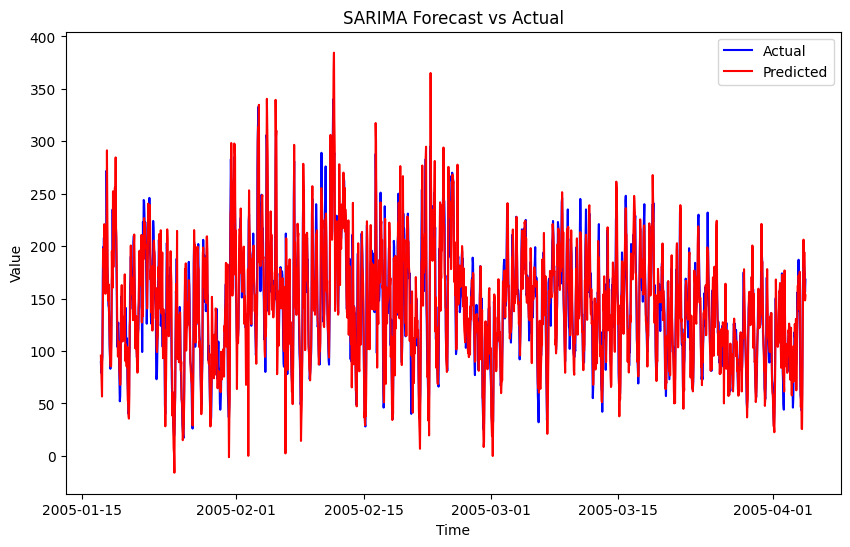

In [ ]:
# SARIMAX (< 3 hrs)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = testing_data[target_column]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

# Set rolling window size (last 72 observations --> 3 days)
window_size = 72

# Rolling window validation
for t in range(len(test)):
    print(t)
    # Limit the training data to the last `window_size` observations
    history_window = history[-window_size:]

    # Fit the SARIMAX model on the rolling window
    model = SARIMAX(history_window, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
    model_fit = model.fit()

    # Forecast the next step
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)

    # Append the actual value to the history for the next iteration
    obs = test.iloc[t]
    history.append(obs)

    # Print prediction vs actual value
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')


Test RMSE: 25.532
Mean Absolute Error (MAE): 18.758
Mean Absolute Percentage Error (MAPE): 14.741%
Akaike Information Criterion (AIC): 431.369


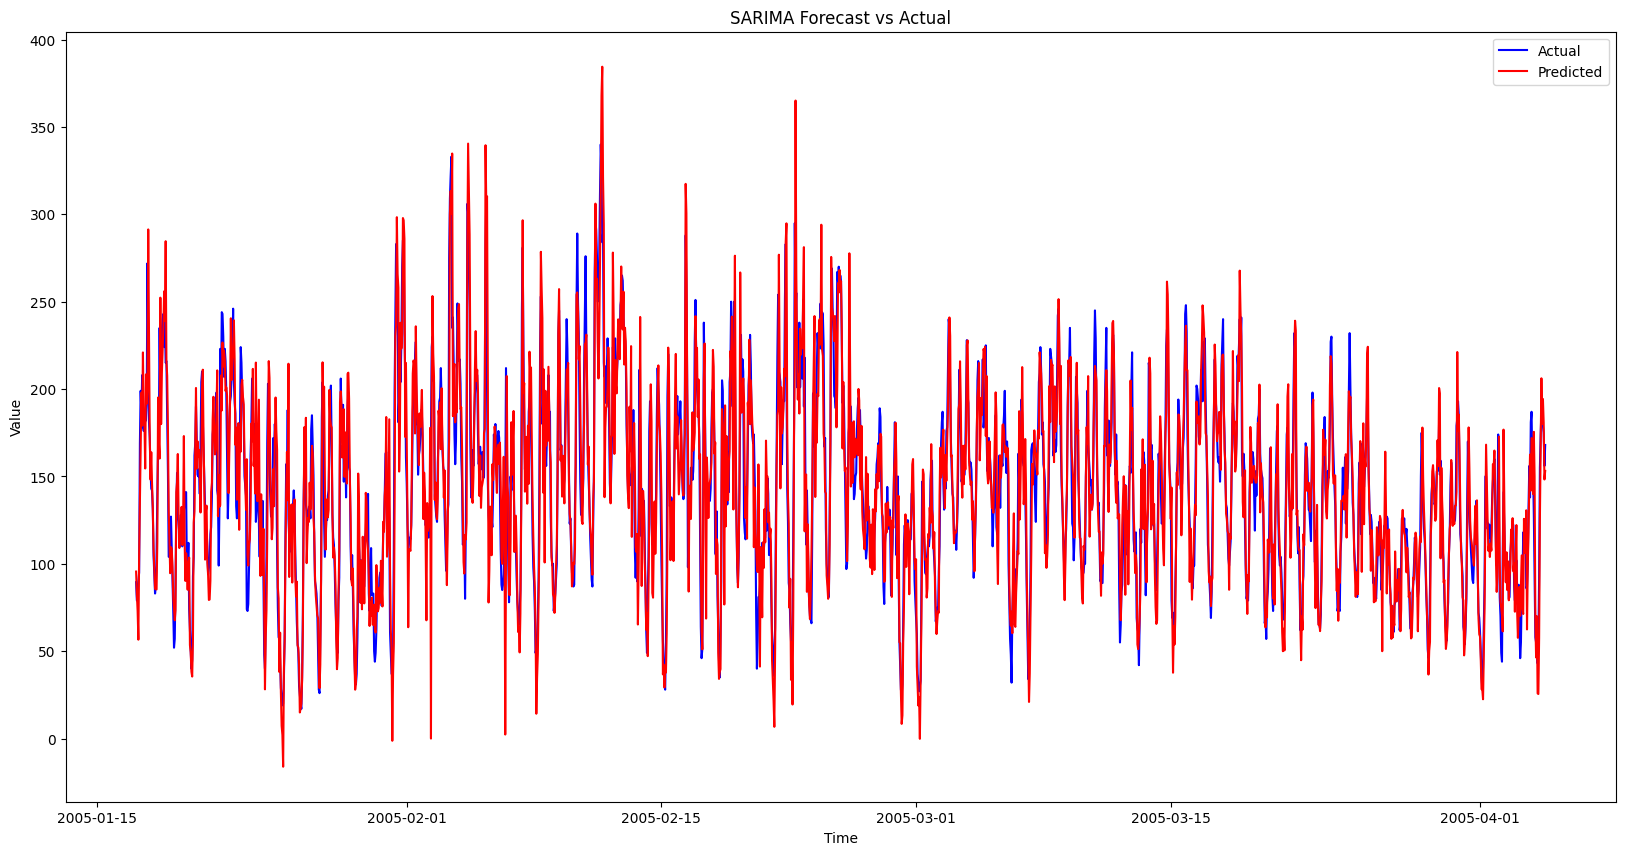

In [ ]:
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# AIC (Akaike Information Criterion) of the last model
aic = model_fit.aic
print(f'Akaike Information Criterion (AIC): {aic:.3f}')

# Create a time series for the predictions, using the same index as the test set
prediction_index = test.index
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(20,10))
plt.plot(test, label='Actual', color='blue', linewidth=1.5)  # Actual values (test set)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)  # Predicted values
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### 5.5 Exponential Smoothing (ETS) Model

In [ ]:
# ETS (<5 Mins)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = testing_data[target_column]
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

# Set rolling window size (last 200 observations)
window_size = 200

# Rolling window validation
for t in range(len(test)):
    # Limit the training data to the last `window_size` observations
    history_window = history[-window_size:]

    # Fit the ETS model on the rolling window
    model = ExponentialSmoothing(history_window, trend='add', seasonal='add', seasonal_periods=24)
    model_fit = model.fit(optimized=True)

    # Forecast the next step
    yhat = model_fit.forecast(steps=1)[0]
    predictions.append(yhat)

    # Append the actual value to the history for the next iteration
    obs = test.iloc[t]
    history.append(obs)

    # Print prediction vs actual value
    print(f'Predicted={yhat:.3f}, Expected={obs:.3f}')


# Evaluate forecasts (ETS)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')


Predicted=85.861, Expected=89.500
Predicted=75.304, Expected=79.000
Predicted=79.153, Expected=79.000
Predicted=79.607, Expected=90.000
Predicted=105.398, Expected=95.000
Predicted=128.367, Expected=169.000
Predicted=168.691, Expected=199.000
Predicted=205.371, Expected=186.000
Predicted=199.610, Expected=208.000
Predicted=209.230, Expected=178.000
Predicted=174.284, Expected=176.000
Predicted=174.134, Expected=177.000
Predicted=174.835, Expected=182.000
Predicted=185.168, Expected=182.000
Predicted=194.625, Expected=193.000
Predicted=194.259, Expected=272.000
Predicted=274.618, Expected=225.000
Predicted=224.704, Expected=181.000
Predicted=184.153, Expected=172.000
Predicted=148.302, Expected=153.000
Predicted=148.518, Expected=143.000
Predicted=143.427, Expected=142.000
Predicted=132.912, Expected=131.000
Predicted=116.545, Expected=105.000
Predicted=93.995, Expected=94.000
Predicted=82.617, Expected=83.000
Predicted=84.456, Expected=87.000
Predicted=88.836, Expected=106.000
Predicte

Mean Absolute Error (MAE): 15.480
Mean Absolute Percentage Error (MAPE): 11.919%


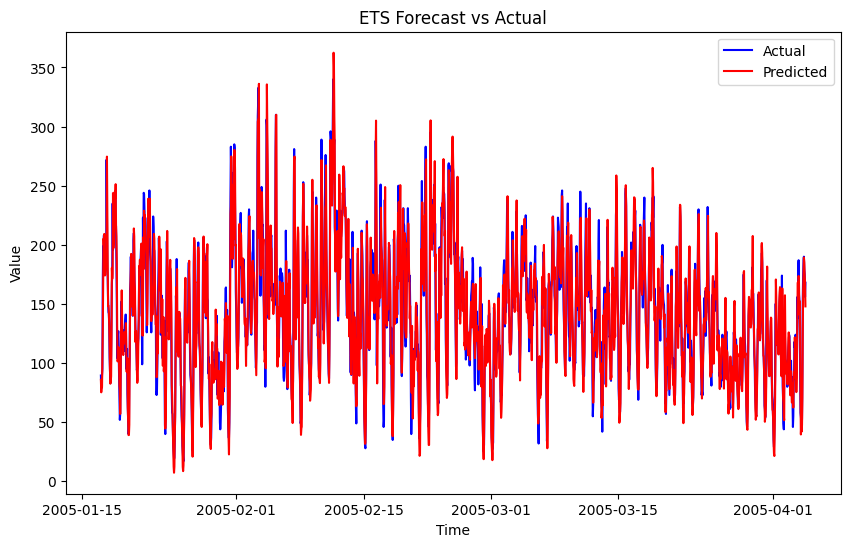

In [ ]:
# Evaluate forecasts (ETS)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - predictions) / test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Create a time series for the predictions, using the same index as the test set
prediction_index = test.index  # Use the same index as the test set for alignment
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(test, label='Actual', color='blue', linewidth=1.5)  # Actual values (test set)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)  # Predicted values
plt.legend()
plt.title('ETS Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 5.6 Long Short-term Memory (LSTM) Model

In [ ]:
! pip install keras

In [ ]:
# (lightweight) LSTM (9 mins)

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K

X = testing_data[target_column].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
size = int(len(X_scaled) * 0.8)
train, test = X_scaled[0:size], X_scaled[size:len(X_scaled)]
history = list(train)
predictions = []

# Set rolling window size (last 72 observations --> 3 days)
window_size = 72

# Define the LSTM model (only once)
model = Sequential()
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Rolling window validation
for t in range(len(test)):
    print(t)
    if len(history) >= window_size:
        history_window = np.array(history[-window_size:]).reshape(-1, 1)
        X_train, y_train = [], []

        # Create input-output pairs for training
        for i in range(window_size - 1):
            X_train.append(history_window[i:i + 1, 0])
            y_train.append(history_window[i + 1, 0])

        # Reshape training data for LSTM input
        X_train = np.array(X_train).reshape(len(X_train), 1, 1)
        y_train = np.array(y_train)

        # Train the LSTM model
        model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0, shuffle=False)

        # Forecast the next step
        X_input = np.array(history[-1]).reshape(1, 1, 1)
        yhat = model.predict(X_input, batch_size=1, verbose=0)
        # Inverse scaling to get original value
        yhat_inverse = scaler.inverse_transform(yhat)[0, 0]
        predictions.append(yhat_inverse)

        # Append the actual value to the history for the next iteration
        obs = scaler.inverse_transform(test[t].reshape(1, -1))[0, 0]
        history.append(test[t])

        # Print prediction vs actual value
        print(f'Predicted={yhat_inverse:.3f}, Expected={obs:.3f}')

        # Reset the model state (if used stateful LSTM)
        # model.reset_states()

# Evaluate forecasts
test_unscaled = scaler.inverse_transform(test)[:, 0]  # Inverse scaling for evaluation

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_unscaled, predictions))
print(f'Test RMSE: {rmse:.3f}')


0
Predicted=69.609, Expected=89.500
1
Predicted=108.955, Expected=79.000
2
Predicted=117.042, Expected=79.000
3
Predicted=116.707, Expected=90.000
4
Predicted=119.162, Expected=95.000
5
Predicted=119.480, Expected=169.000
6
Predicted=146.456, Expected=199.000
7
Predicted=158.498, Expected=186.000
8
Predicted=153.962, Expected=208.000
9
Predicted=164.305, Expected=178.000
10
Predicted=152.403, Expected=176.000
11
Predicted=152.510, Expected=177.000
12
Predicted=154.105, Expected=182.000
13
Predicted=157.871, Expected=182.000
14
Predicted=159.352, Expected=193.000
15
Predicted=166.921, Expected=272.000
16
Predicted=214.265, Expected=225.000
17
Predicted=190.466, Expected=181.000
18
Predicted=166.405, Expected=172.000
19
Predicted=162.425, Expected=153.000
20
Predicted=151.473, Expected=143.000
21
Predicted=145.682, Expected=142.000
22
Predicted=145.453, Expected=131.000
23
Predicted=138.215, Expected=105.000
24
Predicted=120.326, Expected=94.000
25
Predicted=112.244, Expected=83.000
26
P

Mean Absolute Error (MAE): 19.741
Mean Absolute Percentage Error (MAPE): 16.065%


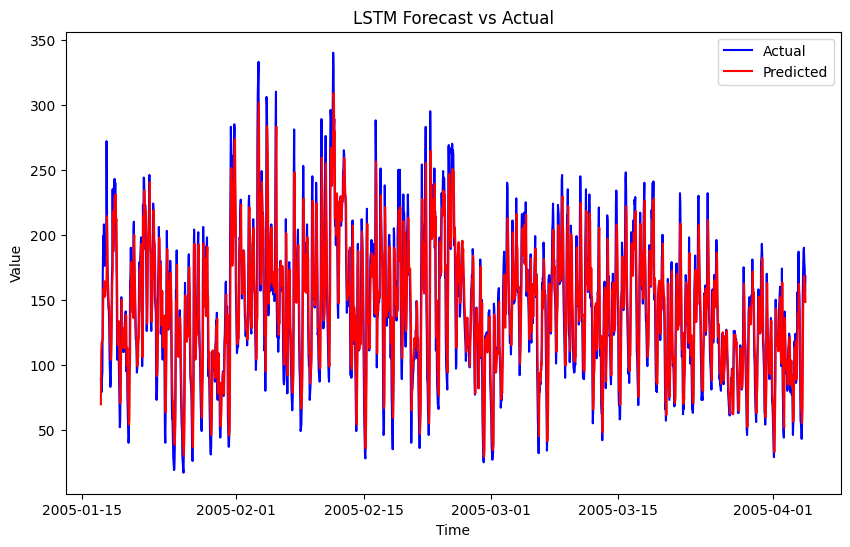

In [ ]:
# Evaluation metrics (LSTM)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test_unscaled, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_unscaled - predictions) / test_unscaled)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Create a time series for the predictions, using the same index as the test set
prediction_index = testing_data.index[size:]
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(testing_data.index[size:], test_unscaled, label='Actual', color='blue', linewidth=1.5)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)
plt.legend()
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 5.7 Recurrent Neural Network

In [ ]:
# lightweight RNN

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, SimpleRNNCell, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K

X = testing_data[target_column].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
size = int(len(X_scaled) * 0.8)
train, test = X_scaled[0:size], X_scaled[size:len(X_scaled)]
history = list(train)
predictions = []

# Set rolling window size (last 72 observations  --> 3 days)
window_size = 72

# Define the RNN model (only once)
model = Sequential()
# Use SimpleRNNCell for a regular RNN
model.add(RNN(SimpleRNNCell(10), input_shape=(1, 1)))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Rolling window validation
for t in range(len(test)):
    print(t)
    if len(history) >= window_size:
        history_window = np.array(history[-window_size:]).reshape(-1, 1)
        X_train, y_train = [], []

        # Create input-output pairs for training
        for i in range(window_size - 1):
            X_train.append(history_window[i:i + 1, 0])
            y_train.append(history_window[i + 1, 0])

        # Reshape X_train for RNN input
        X_train = np.array(X_train).reshape(len(X_train), 1, 1)
        y_train = np.array(y_train)

        # Train the RNN model
        model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0, shuffle=False)

        # Forecast the next step
        X_input = np.array(history[-1]).reshape(1, 1, 1)
        yhat = model.predict(X_input, batch_size=1, verbose=0)

        # Inverse scaling to get original value
        yhat_inverse = scaler.inverse_transform(yhat)[0, 0]
        predictions.append(yhat_inverse)

        # Append the actual value to the history for the next iteration
        obs = scaler.inverse_transform(test[t].reshape(1, -1))[0, 0]
        history.append(test[t])

        # Print prediction vs actual value
        print(f'Predicted={yhat_inverse:.3f}, Expected={obs:.3f}')

        # Reset the model state (if implement stateful RNN)
        # model.reset_states()

# Evaluate forecasts
test_unscaled = scaler.inverse_transform(test)[:, 0]  # Inverse scaling for evaluation

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_unscaled, predictions))
print(f'Test RMSE: {rmse:.3f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0
Predicted=101.482, Expected=89.500
1
Predicted=92.450, Expected=79.000
2
Predicted=83.064, Expected=79.000
3
Predicted=82.792, Expected=90.000
4
Predicted=92.008, Expected=95.000
5
Predicted=95.940, Expected=169.000
6
Predicted=158.078, Expected=199.000
7
Predicted=183.028, Expected=186.000
8
Predicted=173.574, Expected=208.000
9
Predicted=192.303, Expected=178.000
10
Predicted=169.811, Expected=176.000
11
Predicted=169.225, Expected=177.000
12
Predicted=171.130, Expected=182.000
13
Predicted=176.312, Expected=182.000
14
Predicted=177.412, Expected=193.000
15
Predicted=187.567, Expected=272.000
16
Predicted=251.661, Expected=225.000
17
Predicted=218.147, Expected=181.000
18
Predicted=183.274, Expected=172.000
19
Predicted=176.486, Expected=153.000
20
Predicted=160.877, Expected=143.000
21
Predicted=152.376, Expected=142.000
22
Predicted=151.398, Expected=131.000
23
Predicted=141.855, Expected=105.000
24
Predicted=119.187, Expected=94.000
25
Predicted=108.934, Expected=83.000
26
Predi

Mean Absolute Error (MAE): 19.604
Mean Absolute Percentage Error (MAPE): 15.869%


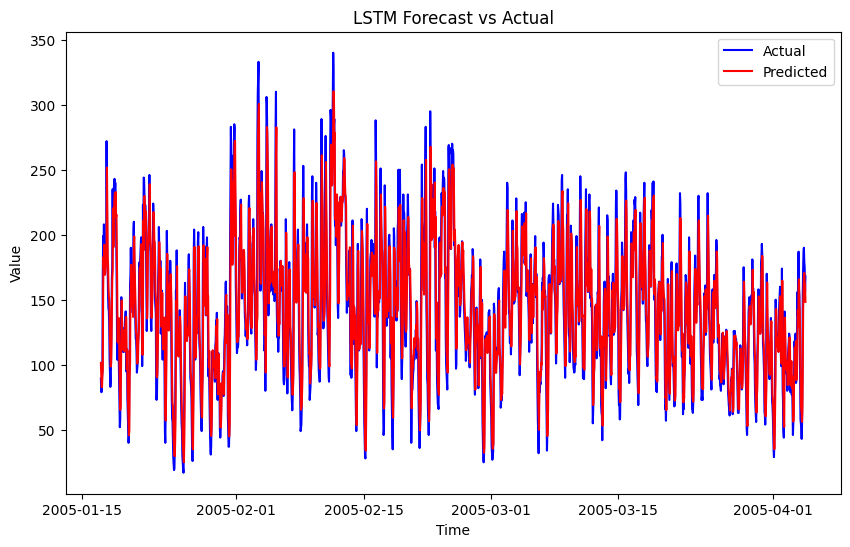

In [ ]:
# Evaluate forecasts (RNN)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test_unscaled, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_unscaled - predictions) / test_unscaled)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Create a time series for the predictions, using the same index as the test set
prediction_index = testing_data.index[size:]
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(testing_data.index[size:], test_unscaled, label='Actual', color='blue', linewidth=1.5)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)
plt.legend()
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 5.8 Gated Recurrent Unit (GRU)

In [ ]:
# Lightweight GRU

from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K

X = testing_data[target_column].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
size = int(len(X_scaled) * 0.8)
train, test = X_scaled[0:size], X_scaled[size:len(X_scaled)]
history = list(train)
predictions = []

# Set rolling window size (last 72 observations --> 3 days)
window_size = 72

# Define the GRU model (only once)
model = Sequential()
model.add(GRU(10, activation='tanh', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Rolling window validation
for t in range(len(test)):
    print(t)
    if len(history) >= window_size:
        history_window = np.array(history[-window_size:]).reshape(-1, 1)
        X_train, y_train = [], []

        # Create input-output pairs for training
        for i in range(window_size - 1):
            X_train.append(history_window[i:i + 1, 0])
            y_train.append(history_window[i + 1, 0])

        # Reshape X_train for GRU input
        X_train = np.array(X_train).reshape(len(X_train), 1, 1)
        y_train = np.array(y_train)

        # Train the GRU model
        model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0, shuffle=False)

        # Forecast the next step
        X_input = np.array(history[-1]).reshape(1, 1, 1)
        yhat = model.predict(X_input, batch_size=1, verbose=0)
        # Inverse scaling to get original value
        yhat_inverse = scaler.inverse_transform(yhat)[0, 0]
        predictions.append(yhat_inverse)

        # Append the actual value to the history for the next iteration
        obs = scaler.inverse_transform(test[t].reshape(1, -1))[0, 0]
        history.append(test[t])

        # Print prediction vs actual value
        print(f'Predicted={yhat_inverse:.3f}, Expected={obs:.3f}')

        # Reset the model state (this is important for stateful GRU, but not needed here)
        # model.reset_states()

# Inverse scaling for evaluation
test_unscaled = scaler.inverse_transform(test)[:, 0]

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_unscaled, predictions))
print(f'Test RMSE: {rmse:.3f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


0
Predicted=74.644, Expected=89.500
1
Predicted=123.495, Expected=79.000
2
Predicted=129.492, Expected=79.000
3
Predicted=127.483, Expected=90.000
4
Predicted=126.957, Expected=95.000
5
Predicted=125.652, Expected=169.000
6
Predicted=138.630, Expected=199.000
7
Predicted=145.410, Expected=186.000
8
Predicted=143.656, Expected=208.000
9
Predicted=150.969, Expected=178.000
10
Predicted=144.442, Expected=176.000
11
Predicted=145.461, Expected=177.000
12
Predicted=147.592, Expected=182.000
13
Predicted=151.518, Expected=182.000
14
Predicted=153.891, Expected=193.000
15
Predicted=161.341, Expected=272.000
16
Predicted=202.359, Expected=225.000
17
Predicted=184.566, Expected=181.000
18
Predicted=164.760, Expected=172.000
19
Predicted=162.035, Expected=153.000
20
Predicted=152.236, Expected=143.000
21
Predicted=146.938, Expected=142.000
22
Predicted=146.894, Expected=131.000
23
Predicted=139.638, Expected=105.000
24
Predicted=121.094, Expected=94.000
25
Predicted=112.364, Expected=83.000
26
P

Mean Absolute Error (MAE): 19.797
Mean Absolute Percentage Error (MAPE): 16.088%


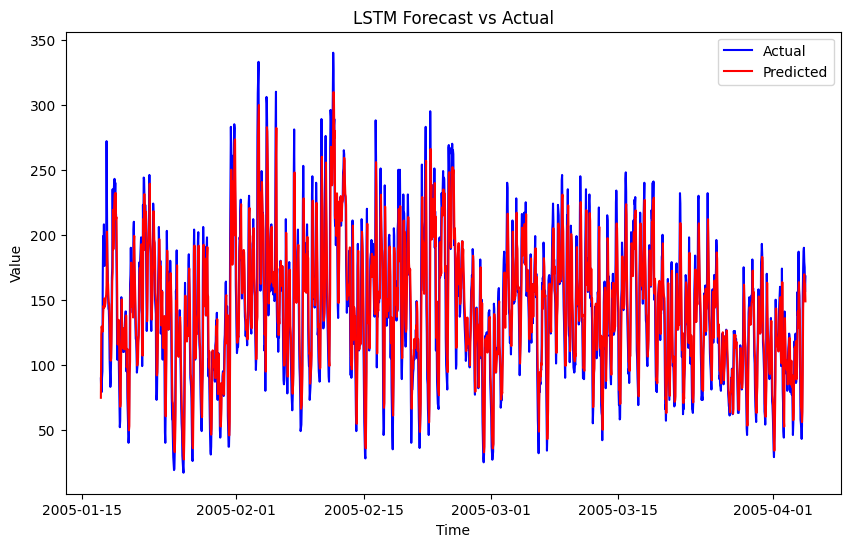

In [ ]:
# Evaluate forecasts (GRU)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MAE (Mean Absolute Error)
mae = mean_absolute_error(test_unscaled, predictions)
print(f'Mean Absolute Error (MAE): {mae:.3f}')

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test_unscaled - predictions) / test_unscaled)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Create a time series for the predictions, using the same index as the test set
prediction_index = testing_data.index[size:]
predictions_series = pd.Series(predictions, index=prediction_index)

# Plot forecasts against actual outcomes
plt.figure(figsize=(10, 6))
plt.plot(testing_data.index[size:], test_unscaled, label='Actual', color='blue', linewidth=1.5)
plt.plot(predictions_series, color='red', label='Predicted', linewidth=1.5)
plt.legend()
plt.title('LSTM Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

### 5.9 AutoRegressive Integrated Moving Average - Long Short-term Memory (ARIMA-LSTM) Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Step 1/1860
Step 2/1860
Step 3/1860
Step 4/1860
Step 5/1860
Step 6/1860
Step 7/1860
Step 8/1860
Step 9/1860
Step 10/1860
Step 11/1860
Step 12/1860
Step 13/1860
Step 14/1860
Step 15/1860
Step 16/1860
Step 17/1860
Step 18/1860
Step 19/1860
Step 20/1860
Step 21/1860
Step 22/1860
Step 23/1860
Step 24/1860
Step 25/1860
Step 26/1860
Step 27/1860
Step 28/1860
Step 29/1860
Step 30/1860
Step 31/1860
Step 32/1860
Step 33/1860
Step 34/1860
Step 35/1860
Step 36/1860
Step 37/1860
Step 38/1860
Step 39/1860
Step 40/1860
Step 41/1860
Step 42/1860
Step 43/1860
Step 44/1860
Step 45/1860
Step 46/1860
Step 47/1860
Step 48/1860
Step 49/1860
Step 50/1860
Step 51/1860
Step 52/1860
Step 53/1860
Step 54/1860
Step 55/1860
Step 56/1860
Step 57/1860
Step 58/1860
Step 59/1860
Step 60/1860
Step 61/1860
Step 62/1860
Step 63/1860
Step 64/1860
Step 65/1860
Step 66/1860
Step 67/1860
Step 68/1860
Step 69/1860
Step 70/1860
Step 71/1860
Step 72/1860
Step 73/1860
Step 74/1860
Step 75/1860
Step 76/1860
Step 77/1860
Step 78/

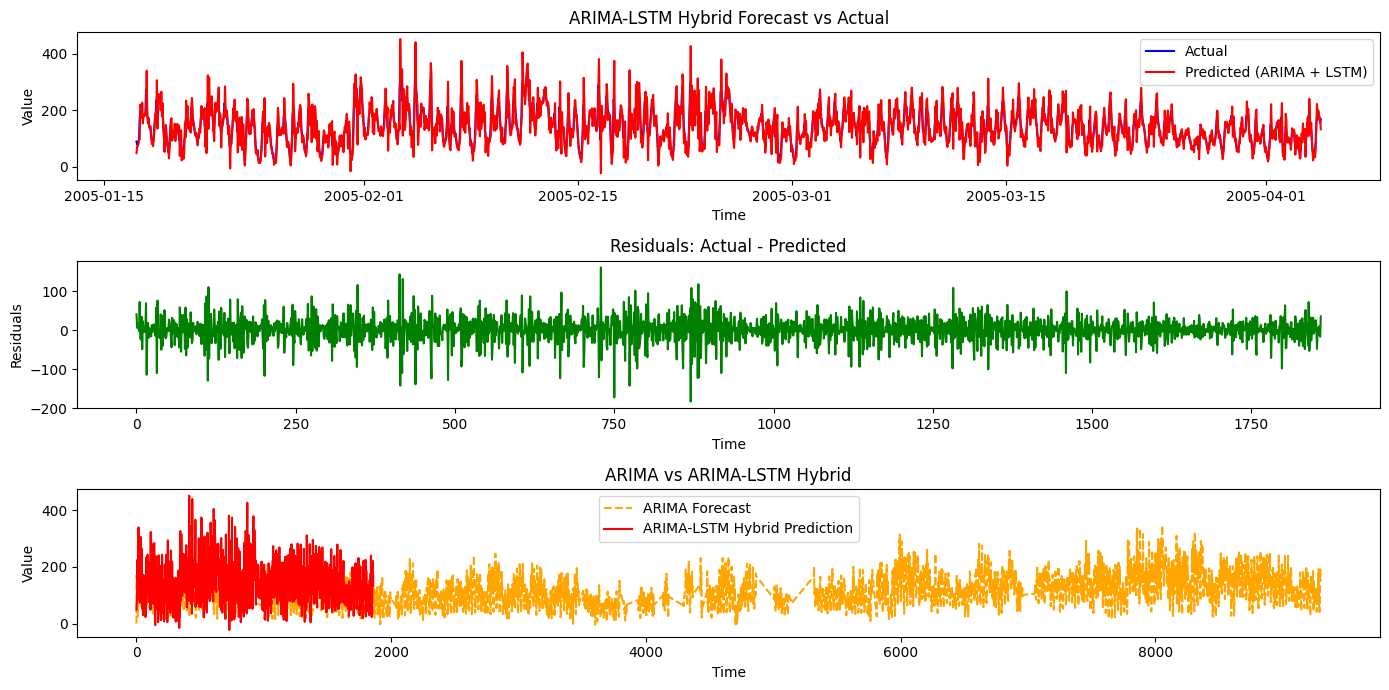

In [ ]:
# ARIMA-LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

X = testing_data[target_column].values

# Fit the ARIMA model
arima_order = (1, 1, 1)
arima_model = ARIMA(X, order=arima_order)
arima_fit = arima_model.fit()

# Get the ARIMA forecast
arima_forecast = arima_fit.predict(start=0, end=len(X)-1, dynamic=False)

# Compute residuals from ARIMA forecast
# Subtract ARIMA forecast from the original time series
residuals = X - arima_forecast

# Prepare the data for LSTM (train LSTM on residuals) by scaling
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals.reshape(-1, 1))

# Split the residuals into training and testing sets
size = int(len(residuals_scaled) * 0.8)
train_residuals, test_residuals = residuals_scaled[0:size], residuals_scaled[size:]

# Prepare data for LSTM (rolling window validation approach)
window_size = 72
history = list(train_residuals)
predictions = []

# Define LSTM model for residuals
lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='tanh', input_shape=(1, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Rolling window validation for LSTM on residuals
for t in range(len(test_residuals)):
    print(f"Step {t + 1}/{len(test_residuals)}")
    if len(history) >= window_size:
        # Predict the residuals (same as input)
        history_window = np.array(history[-window_size:]).reshape(-1, 1)
        X_train = history_window.reshape(len(history_window), 1, 1)
        y_train = history_window

        # Train the LSTM model on residuals
        lstm_model.fit(X_train, y_train, epochs=1, batch_size=1, verbose=0, shuffle=False)

        # Forecast the next residual
        X_input = np.array(history[-1]).reshape(1, 1, 1)
        yhat_residual = lstm_model.predict(X_input, verbose=0)
        predictions.append(yhat_residual[0, 0])

        # Append the actual value to the history for the next iteration
        history.append(test_residuals[t])

# Combine ARIMA and LSTM predictions
predictions_residuals = np.array(predictions).reshape(-1, 1)
predictions_residuals_inverse = scaler.inverse_transform(predictions_residuals)

# Combine ARIMA forecast and LSTM residual forecast
final_predictions = arima_forecast[-len(predictions_residuals):] + predictions_residuals_inverse.flatten()

# Evaluate the performance
test_actual = X[size:]

# Evaluation metrics (ARIMA-LSTM)
r2 = r2_score(test_actual, final_predictions)
rmse = np.sqrt(mean_squared_error(test_actual, final_predictions))
mae = mean_absolute_error(test_actual, final_predictions)
mape = np.mean(np.abs((test_actual - final_predictions) / test_actual)) * 100
aic = arima_fit.aic

# Print evaluation metrics
print(f'R²: {r2:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}%')
print(f'AIC (ARIMA model): {aic:.3f}')


# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(testing_data.index[size:], test_actual, label='Actual', color='blue', linewidth=1.5)
plt.plot(testing_data.index[size:], final_predictions, label='Predicted (ARIMA + LSTM)', color='red', linewidth=1.5)
plt.legend()
plt.title('ARIMA-LSTM Hybrid Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')

# Plot Residuals
plt.subplot(3, 1, 2)
residuals_actual = test_actual - final_predictions
plt.plot(residuals_actual, label='Residuals', color='green', linewidth=1.5)
plt.title('Residuals: Actual - Predicted')
plt.xlabel('Time')
plt.ylabel('Residuals')

# Plot ARIMA forecast vs ARIMA-LSTM prediction
plt.subplot(3, 1, 3)
plt.plot(arima_forecast, label='ARIMA Forecast', color='orange', linestyle='--', linewidth=1.5)
plt.plot(final_predictions, label='ARIMA-LSTM Hybrid Prediction', color='red', linewidth=1.5)
plt.title('ARIMA vs ARIMA-LSTM Hybrid')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
